# Image Enhancement using SuperResolution

## Table of Contents

* [Introduction](#1)
* [Collecting Training Data](#2)
    * [Export Training Data](#3)
* [Model Training](#4)
    * [Necessary Imports](#5)
    * [Visualize training data](#6)
    * [Train the model](#7)
    * [Visualize results on validation set](#8)
    * [Save the model](#9)
* [Deploy the Model](#10)
    * [Prediction and Upscaling](#11)
    * [Inferencing on ArcGIS](#12)

## Introduction <a class="anchor" id="2"></a>

SuperResolution is an image transformation technique with the help of which we can improve the details in an image from a given low resolution image with the help of deep learning. It also allows us to upscale the low resolution images by modifying the pixels and also removes some compression artifacts from the images. We can perform this task with the help of arcgis.learn.

## Collecting Training Data <a class="anchor" id="2"></a>

We will be using ArcGIS Pro to find the area where high resolution imagery is available on the Esri World Imagery. To simplify our job, we have already created polygon representing the extent of high resolution imagery. We can add the polygon from [here](https://deldev.maps.arcgis.com/home/item.html?id=f783fe21206a4492b9fe42f585ebc13c).

### Export Training Data <a class="anchor" id="3"></a>

Training data can be exported by using the 'Export Training Data For Deep Learning' tool available in ArcGIS Pro as well as ArcGIS Enterprise.

- **Input Raster:** ESRI World Imagery
- **Image Format:** JPEG Format
- **Tile Size X & Tile Size Y:** 512
- **Meta Data Format:** Classified Tiles
- In 'Environments' tab set an optimum 'Cell Size' (0.1 in our case). 
- Set the extent same as the polygon layer which we have added.

After filling all details and running the Export Training Data For Deep Learning tool. That will create all the necessary files needed for the next step in the 'Output Folder', and we will now call it our **training data**.

<img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAAAu8AAANPCAYAAABq6DELAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAKLRSURBVHhe7f3blxzVned/89xx4fVb/iPmru9mrueu12p3dc/qi37W9O9nT4/Hv2n7wVlMG8bupt0HzNjYVrlkjubgHtv4oGqKBp/AYLBsXMWhQGAOMgiQUkgqIYGQ0BEkcPfM7Cf2jtiRe+/4xikjMjIy8/1d62VTGRE7dkRG7vzkrqjUZXfe+U0FAOivO+6407j99juM2267XX3jG7epW2/9hrrlllvVzTffom666WZ1ww03qtXVnWpl5Wtqx44V9f+55nl1+PBhtX//fgDAnDDhncEdAPrptddeU6+++qrxyiuvGC+//LJ66aWX1N69e9WLL76onn/+efWb3/xG7dmzRz355JPq8ccfVxsbGya86zb0/wMA5oMJ73pwf/bZZwEAPfPMM8+YUG49/fTTamtrKw3pjz32mAnqv/rVr9QvfvEL9fOf/1w9+OCD6rdRuNeDPOEdAOYL4R0AeiwM70899ZQJ7ja8b25upuH9kUceUQ899JD62c9+pvbt22cGecI7AMwXwjsA9FiV8P7rX/9a/fKXv1QPP/ywCe8PPPCAubVGD/KEdwCYL4R3AOixovCub5mx4X337t1peL///vsJ7wAwpwjvANBjbnDX97vr8O7e867D+6OPPmrCu3vbjBve333vPfX+Bx8AAOZAGt4Z3AGgfy69/766eOmSeu/iRTNOX3j3XXX+wgV15uxZdfrMGXXqnXfUiRMn1LHjx9WR7W118PXX1f4DB8y30RDeAWD+EN4BoMcI7wAAF+EdAHqM8A4AcBHeAaDHCO8AABfhHQB6jPAOANNx5ZVXViJtO0mEdwBoQBrIJdK2VRDeAWA6pLFcIm0r0et+8x//0Yzp4TL9mF5WpT3COwA04A7gRaRtJXpdd3B3w7sO7bffcYf69Kc/TXifcy89HH/V5yd+Iy8HMHnhOJ5H2lby9a9/3awfBng3uOt13G0khPcZdviBHerK/3aV+vYz8nIAk+cO4EWkbSXh4G7Du55xv+POO9VgMFBf+9rXJhbebWjMGqqfCOtjMgjvwPTdeOONlUjbSs6dP58Z48PgrteRtnWNFd5taMy6S+0R1sdkEN6B6ZMGcom0rSQc3O3tMm5wP3nqVPvh/TfDOKR/fVu9lFl+Tq18nSAJYLHocXjfvn3iMk0v0+tIy/KEY3zd4K7VC+/P3BWH9K88qA5nlm+r+79CkASwWCY9uN/5zW8ay8vLanV11YT11u95T4I74RwARiYxvmtvvvWW+u53v2u21fR/68ekdSXVw3sS3AnnADDSxeCug/t3vvMddfSNN9r/g9Wj2+rf6Rn3H7wtLweAGXH/Aw9EWfW/paE4I1qm15G2lehtZje8H3lQfVnPuH/7WXk5AMyIWRzcJxne43urX1YrR+XlZX7yA/e++OfVv3v4nLheeluOS/rA4P4WILONcN+9WSfuf9qX8Nafqvu2hPXD46py3Jm/Hwj6VbjcPQ/e+sGxGvnPX9hPsw+hbWBePPCzn6m//Mu/HI3pCf2YXiZtk0dv1/b4Ht7j7t5Co5dJ24Qqhff43uod6v4j8vIye77t3hd/lfryA9vieultOS7pA4P7W4DMNsJ992aduP9pX8Jbf6ru2xLWD4+rynFn/n4g6Ffhcvc8eOsHx2rkP39hP80+hLaBeTFLg/vOnTsNHeD1fe/6lpr2wnt8L7t8n3uZt9UnbBi0jyWz+H6QTfaRCZjJ9mEgT4Llv/t6FFS9gF20/svR+lIYrbnvvPWj4/pEekzVjjsOzX47P3l4tE3Z8vzwrrfzH5fayjuWvDaAefKzBx9Un/nMZ9KxXf+3fkxat0jb43sY3PV4Ht4DXyXAVwjv8b3s8n3uZZ5V37Zh0D6WzOL7QTbZRyZgJtuHgTwJll/+ShRUvYBdtP6OaH0pjNbcd9760XF9Oz2mascdh2a/nT0PjLYpW54f3vV2/uNSW3nHktcGME9mZXA/e+6cCer6fnf9B6v6qyLtY83DexJEx7hlJg6M2ZnwOByOHndni931DCnsJ6FV/EAh3eJj1xeOoe6+C9dPVDvusvNa4bwXhPfMLH/NY4mPgfCO+faL3bvT8X39nnvEdcq0Pb6Hwd0+HgZ4dxtJhfCeBNExbpmJA2N2JjwOh6PH3dlidz1DCvtJaBU/UEi3+Nj1hWOou+/C9RPVjrvsvFY47wXhPTPLX/NY4mMgvGO+zcLgbr8qUgd1G+Bvu/32yYd3G5Qdo3BYsJ0XOstm9oXlQmh1meBZaf26+y5bX6t53ELIj5Utj+SGdymQh/0qOZaScwzMi7W1NfWtb31LXFaFHou/8pWviN8gpulldcZ3d2wPl7kBPlwWahbebVB2jMJhwXZe6Cyb2ReWC6HVZYJnpfXr7rtsfa3mcQshP1a2PJIb3qVAHvar5FhKzjEwL/o+uLv/SNM7p0+br4ps7x9pSkJfYWCNhDO7QrAPxcGwIOwmMjPZVcJ7Zv0qgTbLbytePzOr7ap83JHkOAzp/FZcPl54Lzn2knMMIPbT+++vRNp2kqqH98LAGglndoVgH4qDYUHYTWRmsquE98z6VQJtlt9WvH5mVttV+bgjyXEY0vmtuHy88F5y7CXnGEBMGsgl0rZVuOFdj9Nt/8FqJgxLcsJ7YdA1Zii8Vzmmysc9Eu8jIfQldznhHUCOSn+wmgnDkpzwXhh0jRkK71WOqfJxj8T7SAh9yV1OeAfm3qTDuw1y9UJreTCOld2KIiwvDJZ560uBtu6+qxxT1ePOikO61M+c5YR3ADkqhXcb5OqF1vJgHCu7FUVYXhgs89aXAm3dfVc5pqrHnRWHdKmfOcsJ78Dcm3h4j5QFS2nGOd6mZMY+UvSHk+JMdhIsxeCZLMuuL7dfd9+l5yFS9bgzygJzuFxYv3p4LzqW5ENLUV8A9Fq18B4pC5bSjHO8TcmMfaToDyfFmewkWIrBM1mWXV9uv+6+S89DpOpxZ5QF5nC5sH718F50LMmHlqK+AOhEF+Fdi8NeEIwtKTQn4TcTZPXjXvC2YTEMkkngDGfGk33l7k9cPy9w19y3fTxcP9pH2pdKxx21E3z48EN/2fJIw/A+Oha/n/Z5DtsGMDsqh3ctDntBMLak0JyE30yQ1Y97wduGxTBIJoEznBlP9pW7P3H9vMBdc9/28XD9aB9pXyodd9RO8OHDD/1lyyMNw/voWPx+2uc5bBtA97oK7zEb+ATi7SfS+kGoTcTB01+36IOCDpZu0DSCwDtaPy+8xyrvO5HZb17497jHLSz3zl/Z8kjj8K6NZtktc9xC2wBmR63wHrOBTyDefiKtH4TaRBw8/XWLPijoYOkGTSMIvKP188J7rPK+E5n95oV/j3vcwnLv/JUtjzQO79polt0yxy20DaB73Yb3HiBYTh7nGJhpY4T3HiBYTh7nGOgFwjvaFs/gy78hAdB/hHeI4hl8+TckALpDeEe78m6xATArCO8Q5N1iA6BrhHeMRZ/HTEC399oz6w7MMsL7ItPnMRPQ7b32zLoDfUB4x3iEP4rVmHEHZh7hfaEJfxSrMeMO9MbChXcAQKHZDO8AsCAI7wAAF+EdAHqM8A4AcBHeAaDHCO8AABfhHQB6jPAOAHAR3gGgxwjvAAAX4R0AeozwDgBwEd4BoMcI7wAAF+EdAHqM8A4AcBHeAaDHCO8AABfhHQB6jPAOAHAR3gGgxwjvAAAX4R0AeqyN8K7XldoGAMyeNLwzuANAT0SB3f53WXg/mRPen3/hBRPeDx8+rM6cO+e3DwCYWSa8M7gDQI/87nfpf4878/78iy8S3gFgDhHeAaDHqoT3twjvALAwCO8A0GPMvAMAXIR3AOixS0//T/XpT3/auOKKK4zrfnSA8A4AC4rwDgC9dVj95IsD9ekv/lQdNDPvW+pOE+CvU/e+SngHgEVEeAeAHgtvm3nym/Hs++2PEd4BYBER3gGgx/zwflD96LruZ963jx5VP//5z9Utt9yivvSlL6m///u/N/+vf77//vvV69E+pe0AYFGdPHVKPfb44+rOb35TfeUrXzHj5rXXXqtuuOEG9c/33qv2/va3ZmyXti3TWnhncAeAeqTB/Re7d3vruOF96x+7vef93Pnz6p/+6Z/UYDAwbzr6DedXjz5q+vzrjQ113w9/qK7/8pfNcn0M75w+LbYDAItk9y9/qa6++mr1V3/1V+r73/++euSRR8y4qelMfNNNN6krr7zSjJ/j5OPG4Z3BHQDqyxvcDx465K1nwvvrP1X/I/mD1Tuf7ObbZl559VXzYULTM0TSOtZwODTjvD6W3zz3nLgOAMy7E2+/bWbW9diux/iimXU9eaNzsQ7xDz74YK1Z+EbhncEdAOqpM7hr6bfN/I+fqIMdfVWknoDRbyh6YkZP0EjrhPRx/OSnPzXb/fgnPxHXAYB5pXPuf//sZ834fvzNNzPLz0ZjtjTe79mzx2RjvV3VAD92eGdwB4B6qgzueqZ99Nge9Y8D99tmJh/e9a9wP/OZz6gnnnxSXF7m5X37zBhfNqGDDm2uqKWlJbVjU1hWRdPtgTmnc7C++0T/FlVa/saxY2Zc1bfLSMv1LPznP/959eMf/1hcHhorvDO4zyEGd2Ciqg7ujz766Ojxw/erL+rwHnzPu/ap2x9rPbzrCRb9G1L9q1xp+UMPPWRugbz11ltNf6V1NH37pH4j0h9GpOWlhmtqEI0nekzJGKypobRNr2yqHVFfy8bDjRXh+AKDtaG4bS2zPr4n+xetbMrbVFbtuaqloL+dnMOJnq+OJGPA1K65mvREtr4LJW8yW98WqcdOPXkjLdf0XSk6G7+2f7+43FU7vDO4t4XBvVUM7vUwuHeu6uD+7e98x3s8/KrISc6869+I6l/fSn+b9Mwzz5gxW38AeSFqO1zu0n287rrr1F133SUuLzVjz23GWP0fql2D6PU3E+9fHTPj1UDtGobL4rFZj1tjXyuTuNZy+9uRSZ6vrszQGKAnovXYrSempeValfCu6TFTj516DJWWW7XDO4N7Sxjc28XgXg+De6fqDO7/8IUvqEvO412Fd92uvg9ff9FAuOz1Q4fU17/+ddM/fZ9+uFxij1nf4y8tL8T4LixfYCXjZTzJNeZ4ulDje6zR+erKDI0B+laYb3/72+Iyq2p41xPaehwuu7OlVnhncG8Rg3u7GNzrYXDvVJPBvTC8R9oK73o81rfthL8Z0Pv73ve+Z/q2vr7uLSujJ3Ok94tSFZ7b4dogukaF3zwm29rfIMXrraiN6L/D32TmtR+uZ7f31ktfQ8m4rNcbrKgd9r9dlcbsnPFd3M9onWxfhdet9Hp3HvPbmMD2xmhiYLRe/Fjpb4+l/XuStoPfGhafG+d8uuqeW0lpf0ey+6h6rRVcU2OeLy3sT95zU7beOK87T43xvWqfJ0GPl3rc1OOntNyqGt41/V5R9n5RK7wzuI+E6zG4N9zeYHCXZPfB4G4syOAuhfef/OQn6p/uvrvVmXf9ZQKrq6uZx7e2ttJ+6T+41X9om0f/0ZW7rX4DyrvHv1DF5zZ+Xt3XQ3aMjK+zQXQMfnv2/cHfR3LdB6+deD/B6yV5DYXtGjWuzZHi8T13P+KYJvc1+5he1293IttL59W+D0eaj+/CtVD13OQ9V1W3l1Tob2vXmmSc81XwHPnPT7X16r3uBHnPi6dqnydH/zZVj496jJaWW3XCu87E+g4WaZlVK7wzuGstveAq9t/H4J5L2n8gcy1UPTd5z1XV7SUV+tvatSYZ53xVHiirrcfg7qsT3nfv3q3+9m//ttXw/v0f/CBzG6O9FVL3qwr921d3e/2eof+hPvexSio9t1ry/CavQ3tNude1vZ6yz3d2PM1e85a/H8OOb8EYYFTuv6tofM/Zj0S6vqXXe9Ju5rxMYPvc85rXRkjaf0B67jOkY6vzXEnbSyr0t7VrTTLG+Yp/zvYnfLzeetK5yrnOQxWel6p9mSR9e4v+Wyb7s/4Kdf13ofZr1C19u7kdJ8Nl2u133GHGdt2Gfs/QEz62TUmt8M7gzuBuTGB7BvcsBncGd+vv/u7v1Dduu83cKqMHeP03RcvLy62Gd2kiRY/P7vhdRn8FZrh9+FglyXNrrulAeL3Ez6W+TuPXRf7y0WPyMuF1lVnXuWaS15x4/dUZM1LF43v1toTzIL3ec8eAvPFl3O2LzqvQV0nuvkaKnucRYX+1nqs6/Y2OOcNeP0XnpOa1Jql9vgqOy2ur6nrFz0el56r0eanel0kKZ8ntP1o6DvsvrdoJH9umpFZ4Z3Bv8QXH4M7gro85g8G9bFlqgQZ3+1WRB6JQbsP7pz71qVbDu77lMfwWMT3j/5WvftX0Qf+9kx6ri6zfc4+3vf5WsTvvvNN7rJJar7lkXIzW914TicxrxeVeB8k+8167mWuy6BpqfXwvvlbjvtlzEPOOQ2ojt92kH2OP78H2hee1znhZ5Rxk1yk9NyXPVen2krL+tnmtSeqer6Q/4XGO1Fwvbb/C605arpU8L3X6MknPPvusmXixP+s/ONW/RdXZ1qVn1u14Hi7TdDu2Df2VkW6bklrhncE93mcrL7ha/bcY3HNVPgfZdUrPTclzVbq9pKy/bV5rkrrnK+lPeJwjNddL22dwt/IGd/0NX5r+V/jsbTNPPf20GW/bDO8///nP1Ze+9KXM4y+9/LK6/vrrzTHoWyTD5UVuu+22zJhfSdlz63HGd+G3NZWvs2SfrbzmavXfqj++x30KtxHGTKmN3HYnM77L56K98d38ptI5D5XPTU7/Km8vKetvm9eapO75KulPqup6kfgYJj++V+nLJOlbxfWYLX0Do+uxxx9Px3dpuUuPxXrMlZZZtcI7g3vxxVLrBVer/xaDe66Cc2AxuDvqnq+S/qSqrheJj4HB3cob3KV73h944AH1hS98odXwvn30qNm39O9zbGxumnswV1ZWzOx/uFxi/1C37GuDRWXPrSN9LWzKz3fmtZJZZq/B4tdu5notukZr9H+k7vie11/hcamN3HZbHt+LzmvV12juvhKZdmqcG/G5qrG9pKy/Je3UutYkY54v7zkXVV2vzusuR+lrqHpfJu2aa64p/eKVOuFd/23pfT/8objMqhXeGdxbfMHV6P8Ig3uu3H0lcgarSudGfK5qbC8p629JO7WuNcmY54vBfTxNBncpvO/YsaP1b5vR9O09u3btEpfde999pm/69skz0X6ldVwPPvig+eNb3V9peaHS5zaRrGef4/jvRPxrKr6WpLay10e8vXTdCddS0Wuoav89Ncf3zGs0YdYPHpfayO1/2+N7znFF7HPTbLwU2q9zbqTnqs72ksL+xlq71iR1z1ckvz++quvVed2JKryGqvZl0vTt5HpiW4/T0nKtanjX/7qqXqfsX1mtFd41Bve8i4XBffztc44rwuDO4J6rwmuoal8mrcngHoZ3/cdMV1xxhXpx797Ww7v9Qyn9/+Ey/e9x3HHnnWb5T3/608xyl57o0RMz+pik5aUqPLfpdeo9v8m141y79joLr/f42ghfA9ntR+sG11GV11DZNezJGQdz95M/rmXGIKmNsnZbG98jZt2cx8K+SvL2ZY83PGd1zo3U31rbC3LPjauta01Q+3wVLNOPu+em4nr1XneCZD+FY0Ctvrj7zH9+S59bgf6tqr7zpGhcrBLedRY2/3jpd78rLnfVDu8M7gzuYt9b2T7nsbCvkrx95b2465wbqb+1thfknhsXg7t9TJTsZ94Hdze862+b+Yd/+Af1P7/1rdb/hVVL/0Gt/oab8N/z0PTX/er78O+//35xuab7qn8Dq2+JlJZXYp83Ufw8xdeJ8Pwn44Z9nuLnVr9ektdTKngNpZLn3l3Xe+0nyl5z7jFIr6cM4ZrTCvcjHVP8mHedSm3ktiuMd02318Ln1Byn0FeJ2ZezbSrvvGgVz40mPlc1tg/lnptQS9daaKzzpYXHrEmvk/L16r/uAkVjgHeOqvbFPXbhtZbsr/S5zaH/JunKK69MvzEmZL9SXedeabmm/wZUf3uj/rsoabmrdnjXGNxbesGJA0YR4YLTCvcjHVP8mHeRSm3ktisMzk2318LnlME90tK1FhrrfGnhMWvS66R8PQZ3X97g7ob3u9fXzS04b7/99sTCux639eyP/gPaKm8iLj1zpH8zqz+olN3j35XRdSYvxxQlr6niSTjMokV83em7TvTYqSenw2V6bNSTLr969NHMMk3fVqnfH6SJcclY4Z3BHZ1hcJ9bDO7+srzB3YZ3/bgO9/p2mfMXLkwsvGu6f/q76PUskP7aMmmdkL5HUx+bntgpu1+zS4zv/cVzM78W8bnV2Vh/I6OegPn5ww+bcVtaz6XvWNET2frbw8r+Lso1VnjXGNzRBZ6b+cXgXm1wfysK5t/4xjfUVVddpX75q1+ZkD/p8K7p/dx7771mNkh/6ND/uJS0nv5Ngv5trF5P/yN+eb9xnRbGkOnTz0HmN1bJb//G/U0W+m2RX3f6Fkj995z6DhP9VcF6LA3X0aFdf4OjXU/6IpgiY4d3jcEdbWFwXzwM7tUHd/3tMjqY22+b6SK8W3qiRfdTz/rr35jq/9b/Zof+OjN9C49+XE/kVJ3E6Rrjew+It7jVuM0PM2fRX3d6/LYTNXpW/cvRGGn/vSP9xS963NST33qMrzKJE2oU3i0GdzTG4L5wGNyrDe4PPfSQCe3uV0V2Gd4tfZujvi9fv9nov2vS/69/1schrQ8Ai06P1zr77v7lL9O/B9WTN4eicVlav6pWwrvF4A4A9ZQN7tL3vE8jvAMA+qHV8A4AaBfhHQDgIrwDQI8R3gEALsI7APQY4R0A4CK8A0CPEd4BAC7COwD0GOEdAOAivANAjxHeAQAuwjsA9BjhHQDgIrwDQI8R3gEALsI7APQY4R0A4CK8A0CPEd4BAC7COwD0GOEdAOAivANAjxHeAQAuwjsA9BjhHQDgIrwDQI8R3gEALsI7APQY4R0A4CK8A0CPEd4BAC7COwD0GOEdAOAivANAjxHeAQAuwjsA9BjhHQDgIrwDQI8R3gEALsI7APQY4R0A4CK8A0CPEd4BAC7COwD0GOEdAOAivANAjxHeAWC27T9xQT34yil19wtvGw/sO6X2Hj8vrlsF4R0AeiBvcCe8A8BseurwGXXVA4fUn/3TfvXRuw+oq392WH32wSPqY/ccMI9d8eODavf+d8RtixDeAWCKSgf3Hw3VL149SXjHmDbVjqUltbS0ojbE5QDatvfYOXXT42+YMf3OPW+rraPvqUNn/kUdPf+vxuFz/6KefuOi+t7zp9R/vmdo1tXbSG1JCO8QbaxEg/1gTQ2FZQCaqzq4f/e5k+rP1/erGzaPqOePvNNZeB+uDaLAp0OfgzGhdWasDc/z0kDtGsrr10d4B7r0xpn3zIz61zbfVJtH3k3HdGvvife9sV6vo9f9xH1D9epb1W6laRTexUGHwX3ixDfVVgd7wjswSXUG9+0oxP/60Hm149dvqI/f85p66eg73YV3bwwYql0DPdbMZgjMHk8/xO+j7Y7fiAzX1EC/N65sysuBCTh+9j315V8dVdfufsNMwNgx/fk331fX/eqY+W2q9dWN42rfyffTdb7++JtmW92G1LarhfDuDjpz8gm/5y/6vr4JzSrOJ7pUd3B/+e1L6sjZ36nDZz5QqxtH1RcfOaSOvH1mCuE9koyNOzadx2YE4X3BEN4xBWvPn1Cff/ioevb4pXRsH575nVr+6etmTP+bh7fNrTJ//fNt87Me8+16epu/iR7XbUhtu1oO78kAOaODe4rwvlA4n+hS7cH9l2+k4f3p7Qvqrx94XX1vzxvTCe/JBI0Z3+04mfInbdLtN1f85SXbmfeVaOy17yVGMhZ7jwmTRP5y+95kf2PgcI5L3sZZVuUYGowfxeHd+W1H2ofkZ295sL3tn+lX+BsToU23/5nnJ3w/L+uTv84u4fyWPY/F10j5/v32Y4O1YYW2gfGdOH9R/cUPD6qfvHo2Hdu1H79yxozl/+Xeodr/zu/Sx+2Y786+63U//s/ReicuiPuwWg/v7ycvpvSF4r24wvULBpGK27U9MBS+6Eu2LTyeFgeM9A1FWKbp50X32TsWZ3375ihtZ9cL10n3mT4vBecsaLusP3addt+wR+3m79s+Xw67LHy+gv4C4xhrcF97Tb104qIJ74dOv6/u++3b6s//6RW198jbU5p5t+NsNP4Gr7XMmKFfO8F4ULad+TnabjTu2t/ouo8lr91wO7e/ZqwKxqngeCptkzkG5wNM8tjG2vjjQ3y8/rg14oxRtg92bLL9Tsbk0bkZ9Tvuo/O+FLYZnA+7ndRW5tzr7fP65KyTbpe+dwjbuec3WW90fsPf6FfZv/OY27bw2DB67sL3FGAcu54/YSZd3LFdW3vxHXXFj19X33jqhPf4LVtvmXFf/72T+/hf//yIWnv+bXEf1sRn3jdW3LBV8CIMBpGq27U/MESk7bQ6g0rJINJkwDDnODhfrtw3P7t/cxzu+R2tM3rewv7Gz2t4TuJ9uW0l58BZr7Q/Ret4j+W07Z6L4Niq7Dt7Pv1zoTV5cwassQb3KLw/ceRCGt4PvXNJffaBobrrqe2Ow3v2teMJXnvxmBGOMwLpNRuMb/Hr2G/L658ZY8MAHI8X9nWcOZ6q24THIG43PjtGedJ+2vcUtw/hY8nzkrtN3s/hMYTtWGXtFa3j7qPoMbudfI3Fz4N9XqrsPyK9jyfv4aP3A6A9+nZIfd+6O4YX0ZMzf/HD1zOPf/2Jt8w3kEn7sNoN7/bFknnxj/jbSC9mWfl2RY/VGRgi0ou+1qASHE/LA4bdp8c55+ZcSf0MBnevP7qPBW3E+3QHy0hyntLz5j0+Ogfl/UnWCa6b+Dn39+ltF+wnFh+b7VOVfYc/y+0CzY01uN93ML1txob3r/36qLryh69MPrwH40w4hmXXGb1eM68rR9F2VV6zhjtmJWOsxPY508Y42yTisSmSc3x1xG3ljTfhe5j8mNdG5v0rXF9qU9puxO9jlT5VWUd4zPYhR+Pwbt/HE229JwPa4McHzUSMNJaH9ESNnnUPJ2y0tb3vmLakfVgthPdA7gvfVTQIjLtdhccqDQzOeu6xjD2oaO0OGEVvipo+b5l9mDeqUb/CNsJtzLl3jj/3zTNzrFp8vG6ALutPuD8td5/2sQpvvuOcC830R7cV7h9oYJzB/dattzLh/Xu/eVN96p6XO555dyVjmru8wuuqynbjjwXSWDSSaWOcbQLpOCG871UVt9EsvMfHkoy55r/d9sL1c96nxLAb8/tYpU9V1hEeK+jDSMW2i9ry3s/ddoDx6W8Q+8kr/i2RIf0lBfqLCPTY/oXgSwusjcMXzHJpH1b797y70hfI6MVRPgiMu12FxyoNDBFpvUrb5hyPlR5XwToVVHlDKQuscV+S82n+2++POd/Osea+eYrH0WV4Lz6PVfZddD5Nv0qfd6CacQb3Q1FwD8P77gPvqP/vd/dOL7wLrz2zftnrqsJ2Y40FydiaTsAIMm2Ms43EHUul5SXiMSZv+6rvdcmHoui8mfa8Pofr571PCR+sjCrbj7OO9FheH1wV206e38Kx21yPwnsEMIa/vP+Quuu5U+K4bumvB9Zju/5iAv1FBdI6d/3mlGlL2oc10fAeD8r+4OhvI70Ix92uymNVBoaI+KIfd1ARNBwwyt5Q9LkqDe8Ru55pLxjgzPl2HhP3mffmF7yZVelPuD9N3GfNN+wq+y47n+HxAOMaZ3DX3/Mehvf/+dRxNbivg9tm8l4X4Wsv+bn0dVVhu7HGgojZzhvjovF4xdkmZwws2ibvGHa4Y4ppd/zxIe5D3vZV3tdipq/mXIZjXri+vL3bhru9fWw0zlbpU5V15MfS4wjff9PnoWLb9tpyn7/ouXLfL7LHBozvq79+Q+3YGH31Y+jVUx+Yf5RPj++/OHheXEfTbXz2Z4fFfViTnXk3g5rzIkwHaruN9CIcd7tqj5UPDBHpRR8Zb1CJtDxgmO2Dvrn081IWWNPHBlHfBtnn0Dy3znHm7VN889PnwNm2Sn/C/WniPk2fR4+J+3fefKvsO/Nzy2/OgDXO4C6F9y/vPqw+86NXp3jbzGgcM/R6wesob/uy7cYdC7R4PBiRQ2zE2a5oG3G/6fuR1WxsCPdvxf2Q3lNy3mfSfgWPZ9bP2d4yz4deboXHV6VPVdbJeyy4RhKj52W8dsz2mWMjuKM9P37ppPnGMOlWGO3Xh+LbYTT939I62mfuP2zakvZhTTa8R7yBKRoEd3nbyC+48bYb7wVt+YO88KKvtG3O8bQ8YEh9cNvU5y48nrgP4XlO+hu+OUXM+a8Q3tNlTj/CfVfpT7g/Tdyn3i54zLtWgv1XOxf2eYvotlt+cwascQZ3Kbxf+aMD6p7fHJ1oeAcAVHf6wiX1X+8bmn+nIxzbNf2vZut/Pdv9F7RD33/hlPpP9xxQR94p/ldWG4V3AEB14wzuYXi/69k31UfX9qnXjp0ivANAjzz4yjtq8JPX1aPCzPpzxy+p1cffNPR/h8v1NnrbB185JbbtIrwDQIfqDu5ueN89PKOu+OF+9dO9xyf+L6wCAOq5+P4H6rat4+qzDx7x/sE9rei2GT1Zc92v3jDb6jaktl2EdwDoUN3B3Yb34an31bW/OKxueWxbnT1/gfAOAD106sIl9VcPHY4cUfe9fCYd3x8/8q75x/g0/d/2cb2OXnf5J6+X3i5jEd4BoGN1Bncd3u/97Tvqcz97XX36hwfUwbfOqvMXCO8A0FcnozH+nhffVp+OxvKvbhxTD+4/p55/8/10rH/p7Q/UQwfOq5ueeDMK7YfMunobqS0J4R0ApqDq4H7j48fNP+509/NvqjfPXFAX3n2X8A4AM2D/iQvmX9a23yKmv7Dg/73vYPob1n945Ih64Vj98ZnwDgBTVDq4P3xYPXf0jHrv4kX17nvvEd4BYMbo37bu2T6rdu9/x3jq8Bn15tmL4rpVEN4BoAfyBvdL77+vLl66RHifQ5f97WPoCen5Afpq7PAuXfyoTzq3AGAR3ueX9J6A6ZCeH6CvCO9TJp1bALAI7wAAF7fNAECPEd4BAC7COwD0GOEdAOAivANAjxHeAQAuwjsA9BjhHQDgIrwDQI8R3gEALsI7APQY4R0A4CK8A0CPEd4BAC7COwD0GOEdAOAivANAjxHeAQAuwjsA9BjhHQDgIrwDQI8R3gEALsI7APQY4R0A4CK8A0CPEd4BAC7COwD0GOEdAOAivANAjxHeAQAuwjsA9FheeL/pppvUjTfeSHgHgAVDeAeAHpPC+80335yG9xtuuIHwDgALhPAOAD1GeAcAuAjvANBjYXi/5ZZbMuF9586dhHcAWBCEdwDoMcI7AMDVWXjfWFlSSyub4rJpMv1aCvSwnwAWkxveb7311tzwvrKyQngHgAUw3+F9c0UtDdbUUFqWyPZrU+2IAvxgbeg8NqYK+weAIja86+BeFt6/+tWvEt4BYM4R3oV+DdcG7YRuwjuAhqQ/WOV73gFgcU0pvA/VrsGS2rEZ/398u8pA7Rr66+vZbxOk7e0sXhDWM+T+Nu8P19RgaUVtJNun22k5Hxxyw7v7mGnXaSsM5Dqkp8vjPhXt3zsm7xjseYln/5eSY0n3A2DhEN6nhXEYQD9NNby7wdUsd0KxDb+j21eSbdI2isO7+XmcmXfTht/ucG0lE7DTbcL1N9ec/87uPzOrb4K/7XPc9mDg7g/AIutzeM9MUmglY+7s6Da8i+cyfI8DgMhUw7t3X3kQvDOhOl3HDmYthnd3sKzyxuO2G+7Tldm/0OfkXOzYHP13K/fbA5gLkw7vbxw7Jj6uFS3T4vHTHdOYrR5X9lzWZN6LojbC9822TLp9AJVN+bYZZx0vmMfrZ0OsG35bDO9pv+I3Hq9fCf9Wl0jabnws+rHMduH+9c9uGw43vEv7B7CYbHg/ePCgMRwO1YEonL/66qvqlVdeUfv27VN79+5Vzz//vHrmmWdqhfdHHnlEXXnllWrPnj21lllS4LRjJeNYPYR3AFUR3r1+RUzAdmeN4kCfCeFhu3ZgK9p/pu0Q4R2Ab1Lh/eSpU+rqq69Wg8EgE9J1cNePa5///OfNbL+7rSUGTjPO2fHbTm5E417yuDcmpuPmiDj+ZdYLxtEmy3OXOX0Pf7bHEraVCCd7Bisr8T4Kgm9ReE/bc7Z3H8tMLkWyv9l2l7t9Lj+u0vYBdKrX4T0z0HnhVwjv3vLk57rhPelbOjCZfrkDXTKQie0G24b7D44xSzgvABbaJGfeX4naCAO8G9yvueYatX30qLitJgVOG/TiccwGw0gwZtr13BAoPWY/DPjBdc0f59P9acmEix23bXCVti9alvbdjv/Osdj17fbOsWWPQdhOUBTeR23Y5cKkknAsRtn5qXhcue0D6Fy/w7sw4GQGxLTNcECKmEHLD96hbHiPmO2SvgT9ygxq0bqjPgbHJew/Pi73sWibFTtACucFwEKz4f2vdx9Tf/WLN9RfPXJUfS7y2YcOq//+0CF19c8Oqqt+ul/95Y/2qSvv3Vv7nvcwwFcN7lomcGZCXzJOu+sYQvj01rdjZN56VrI8GMO9DxBJePU+EFhFyzJ9CX+WHsvpb4Xga9/zPG47Thvx8QXnVNxHhfNT6bgiFY4BQDd6ftvMZjKAJDKDRjIwGdEgY9qQBiBp25jfLyvZLhk47UBn6Mf0gG8HVTugJfw3AXn/4SAdfiAhvAOwJh3eNTfAVw3umhg4vfHUjoHuuBwpCIJxm8l7QVlgDMbfUDyWuu8T4RhdtCzsu3QswWN5/S07joh33MJyzX0vynzgkPZR6fxUOC63rYJjANCNzsJ7XXogywxOALBgugjvmg3wVYO7Vh44pWAYKQiCY4X3KoHSC7I5/fGWhX2vEHKTdioF68BEw3vh+alwXFqltgB0gfAOAD3WVXjXdICvGty1scN73u0lmfXz1rPKlgsq30YT9qVCyLUBN+xP0m6j8O6EZ3FdMVxXOT8VjksjvAO9QXgHgB7rMrzXNX54H80iu+O8fy+2/5gbGt0/WJWWm9BqA2sUnKX2zGNFyzJ9rxZy43PiHkMSoDN99BWfy2A/0oeEnA8Opeen4nHltQ+ge70N7wCA+Q3vhp2RTuW0Fa6XF1Ad6YeCzD6cYF20LNP3iiE3YgN8LDqmzfJZa3+bEX0cdpn0Qcf/UDM6D+K6jtHy6seV1z6AbnUS3u+9914A6A1pnOqrPod3VMQtJwBa1Fl4199LfPLkSQCYGj0OEd7RuWSG371FBwDG1Vl412+cFEVR0yw9DhHeMUkbK8GtP9wrDqBlhHeKohamCO+YNPHedW6XAdAiwjtFUQtThHcAwKwjvFMUtTBFeAcAzDrCO0VRC1PjhPdz77ygju67Xu1/4o9TR164Wr1zfLe4ftsI7wAAF+GdoqiFqTrhfXvvNcbBZz6uDj83UGdPPKnOnXrOOP7ajerAk3+SrpPn1PGHxbbrILwDAFxTDe9bq0tqaXUr+WlU5vHldbWd/Gwrb/2qpbdfXg9b9Wt7fblwH037QFHU9KpOeNcz7Mde3alOHllXly6eUx9Ej7nOnNhQJw59P9frz3zC/L/Udh2EdwCAa7oz71uramlpVflReFutL0cBeWlZ+Tk7frxJbia8U9RiV93wrmfZw9BelZ55J7wDANo23fC+va6Ww5CePLYcBnVp3ZpFeKeoxS7COwBg1k35nvd4Nt0N1DY8Z0KynqV3bqUx67nfo+sn/WSWfkutmuXx7L4U3s1+bBtR+1s1w3vc5lby24KYWWw+bNjHgt8ueMsiebcIOculfvnnwP1gkz3+1aDfusz2wr4patZq586d6vLLL1eXXXaZ58Mf/rC68cYbk7XaD+/vX3pPnTzyz+r1Zz5u1s9z+IXPiPuogvAOAHBN/Q9Ww5nuNGAHYd0NzXFodQNxcqtN2k7yoWB51ZupT9tOyrTphldzG0825Lrl9kOX+dkJzmmgTtsN+6bXcfuVXV6lX5ng7d2CJBx/cD7tOgWHSlEzVddff31hcNc1bnh/+9B3vT9EtY68+LlMUJcc3fdFcR9VEN4BAK6ph3c/dOqZYhuEw/+2QdN93Ckzmx2E12AlP7zL7YThPCwxvHvru31NKhOcg/KWV+mXtI4bxqXjD7bxzhdFzUddddVVaXgPg7uuccL7hdMvqYNP/1kmkNdx6o0HxH1UQXgHALimH97dsOuFWCeMukHTC/tuueFUnlX2wntOeA1/ExCWFN4LQ7IuIbynM/SWXV6lX+YcONs64lXKj7/sOClqVksHeCm46xonvJ849INMGK/r/Ol94j6qILwD06PHC6Are3/7W/E6DPUgvI9CZRgo7c/m/224bSu857RTFmqbh/f4w4oX5t3lVfqVew5sycc/2k/Ocoqa86ob3s++/ZQ68uJnM2G8jib3u2uEd2B69HhxIHo96bEDmCR9nc1UeI/D+apaDQNlElL1H1umAdnMTAfhWJc3Y1115j3bThjOw2oc3oWZde/DSZV+5Z2DtPLCedK3rWwfKGoRSo9DdcL7icPfz4Txuo7vv1lsvyrCOzA9ZfmFotoqfZ3NVHiPw2gUTjOBNJmlDh43QdYLn3FYHYXoCuE9KtNOOAOu9zfx8O4st8ee9iPue1m/xHOw6rchHYbp73Lxbxcoal6rbng/+tK1mTBeV5P73TXCOzA9hHeqq5q98C4F1qSyITUuM1ttgn3MD9DVwnu6X9tOtMHkb5sJ+q4fD5ZX7Vd8bkZG/cgP7/GHhfBDEkUtRtUL73+khns+mgnjdTW5310jvAPTQ3inuqoZDO9UWWU/JIxZmQ8KFLU4VS+8y2G8joN7/lxsuw7COzA95BeqqyK8z1uZ22bauEc9npFv5UMARc1g1QrvT8qBvI6mf6yqEd6B6SG/UF0V4X3GK7wdpo3gnrZZcEsQRc171QnvfUF4B6aH/EJ1VYR3iqIooQjvAOogv1BdFeGdoihKKMJ7u4Zrg+C3hNpA7RrK6wOzJj+/JF8s0cLfkGV+297hb8jjffu/3R99qUb8uLRO3Sr7MhDvizwSdW/x1f2c5duCCe8URVFCEd7bZcL7yqa4rNTmiloarKmhtGxck2gTCy03v+hvbltebvjtbckHgPCb5Nan+KUSE/pGukrh3V2efI12nc8xhPeW6Yuff6EMwLTpcYjw3h7CO+ZdXni3QdHMStdJmG718aubTZ/a+IIMv2qH96jqnlvCe8v0xQ8AfSGNU301q+E9vqVmRW2kjw3VrkH0Zhytv7ES/1o85bTh34rj3oITb79jM2knWF7UJjAuPV5kw7vz77nkhV37jysaeQE9/ocoi/KpDaTebSXCrTrecmF//vLRPt3AG65jg7MUisv2Z4K3XR71d0uvX3Cgpr1ged39lq8fcfZh+ujtM/t8SP2qW9/61rfU7/3e76nLLrss9eEPf1jdeOONyRpx9S68AwDGM7sz73HIHqwNzc9mXXdWXJglF9dJPwDY0B4E9pI2gSbE8O79eynCP4oYzqhvreeE91G4DEOnLRuCR8uzt9qYNtxAH3y9dLwP5wNG1L/15IdM4BU+jITrlO3P9Dmz3O9zWJmQHLSpq8p+M/302gjOnd6+pJ+6zYJuV66XXnpJ/Zt/82/S8B4Gd12EdwCYEzP3B6tueB6uqYEJ35tqR/iHrJmgLayTzraP/tt+GDDS9pOfCe9omRTexZDoJry6t56Y9ePXjxekozJBOEyP3ocD4V91T0JqvFnx7H54LFLf/XWq7C9cHreROQ6n4qCdjCEJf/Wy/VbpZ1Tu8XnnMd5+dT16LA30OW2MWWfPnlUf+chHxOCui/AOAHNi1u95T29nCdcLg7aZZfffvC03vMf/nTDh3Qn8hHe0LBPeg8BnKvNYMsMbXbsFeTVbOTO/YaD3QqXdRmCaCWanw8q0Xxbey/YnbK8r8wEnqOxyYZZc2Kc2WiXsp3TcbiAPP3To9YNz687MT7gI7wAwJ2Y9vNvZeW/GXBPDu3uPfIjwju6F4V2aIbYyIdsEWb0sPzxnKvggUC28F7Rfsny88F5/f/XDe1TuuSjbb1T1w7uzX72vJKjrduKHloVzP7kivAPAnJjp8G5vawlDthYGbWkdD+Ed3fPDezxTKwU6EwLFWdr8beTS4dKfTc6EWjeYBmE/UyXLa4f3MfcnHodT+eG94nFGVamfbpu69M/R86b/oDbdVp/f1XVnVr6bIrwDwJyY6z9YDWba41ts3MeiNlbsNhXDe+HsPVCPF96LAqRZloS9KPyNQp97a0ZQeptggQmxTrg0odcJ89EjJty7gTtexw3c0T6j8GnXyCyP9tvkD1Yr7c/9IGM+bESPiSchrmx4j8+b+1iV/Zb2M/NBKj6f3jfX6HNgvsPfPw+TLsI7AMyJmfuD1YgO2JlvgjF/kOrePhOHcbON8wEg/MrHcP3C8J7TJjAuN7xnQqlXTthMgry9hv2w6JYNji4pOG/Fbdt1hBAcB9WRcJ/+8lFQjdt31q0Q3nUV7y85F3Z51F9xZt2p+EOLs02yXVhF+5X6GbYbLtdl2vSe1+wHhy6K8A4Ac6LP4R2Yd5k/WO24pEBKzWdNLLxfPHNcnX9hXb3zo79QZx/+vHrveLWdAADGQ3gHpofwTnVVkwnv719S7x7aUmd//WX17sZ16sLGF9XZJ29T71+6KK8PAGiM8A5MD+Gd6qomEt4vnXtbXXjpR1Fo/5L6YO9d6tKzt6uzu69VF98emmAfrp8nvJ9x1r4ZINP/iHcPZgm9feYr0wKl3+AAYGEQ3oHpmXZ4pxanWg/vl6JwfuHg4+rdF/9JnX/tEbX93APqzRcfVL87+LA6s3WHuvTuWXE7X/zHSmFYj8NwzW8HmNTXgVVot0r4LkJ4B1AH4R2YHsI71VW1H94vnFbnnv2uuvDYqtr86XfU//3/fExd89m/VP/y+iPq5L2fUBdPHVKXSm6fMSE9JxibZXXCKuEdwIIgvAPTo8P7gej1pIMVMEn6Oms1vJ8/+Jg699jX1MVn7/TD+6Hd6vwvrlFnn/mOunT+pLhtLJ51z729xPu6L71u8A91mOXx7LwJ+s4tKzbk2lDsfXWZF8THazdUFr4zX50WtCNt7+076vOGEN79drNfjbZjM/nNBt9xDMwVwjswPTq8A11pLbxfeu+8Ovf0N9WFX/6d+uDlu73w/q+HH1WXnr5Rnfrhp9TFt17Lv/e99B/OcMN9ccg2Pwsz5DYAj4Jx8n2/aQger91QUXiPA7Z7nGEfstubfrv7NOfK38a0m1nH7ifex2Cw4h8bgLlAeAcAuErD+4XXn1DnHltV7z32ZfW7fet+eD/yqHr/2VvU+d1/o849v6Yunn1TbKOz8B7MVsfb2bbaC++jGXDNbi+0rwX78MO7vI1/LNI6drZ99N95HygAzDbCOwDAVRzeL15Q557+R3Vh83p1ac9NOeH9VnXpqa+b732/+OZL8ldHdhTeswHWbWu8dkPyfiK5x+jv19s+3H/CzLTb8G7aDT8wxNzwHv83gHlDeAcAuArD+7tH9qjzj+9U7z2xw4R0Hd7f2vuQCfC/+cVaGt41fVvNhb3/rC6eOZZpJw6p4eyxw1u+QOE9Z5tseJfatQjvwDwjvAMAXLnh/ZKedX/qTvXu4181s+42vA+f+pH67m0r6qe7vuGF94tP7VRnf/VF9d7R58RvntGhNXNbi7hMCNlhgBVCtti+t9147YZyw3veB5TgA4K3fc423rHktZsivAPzjPAOAHDlhvd333hBnd/4srr45NfSgJ5324x1fvffqgu/vU9dOnvcayumw3M2YJug6s0sx2HUD/PBOmHojsTtuCE23m4UtMdrN5Qb3pNl0rG464fbm23cDwymD24/c9pdsdsQ3oF5Ns/hXfq2BaBPpOu2CWkfgNX422bObt2uLjy+Q13ac6MX3l994l51xw1fUvd8+0b1r4d/5YX3i1tfU2c3vmput3HbGkkCtAnNiSDMx2yw1qLQGt7e4raTbB+H4k2//Uzb9dsNheE75H+lY3bd7PbBOYn2690242wnt0t4B+bZvId3vkMbfaSvS319StdtE1zzyNPK97yffvBz6sKjX1AXn9iRuvTs7eqDl9cj9xjv/3aXt1w7+7O/VBdee8RrqwtloRoAZtG8h3f9pkVRfSt9XU4qvHPNU1Lp66L5zPtjN6jzmyvq/GOrtZz55RfVu4e3vLa6QHgHMI8I7xTVfRHeqa6rlfA+awjvAOYR4Z2iui/CO9V1LWR4B4B5RHinqO6L8E51Xb0L7/piBYC+kMapviK8U1T3RXinuq5ehnf+uhrAtE3qGyQmifBOUd2Xvi7HGSveuyj8K/MOrnkqr/R10bvwzsVKUdS0a9w35GmatfD+3e99T3xcwnsD1dcad6y45557zGtQWqZxzVN5pa8LwjtFUVRQ474hT9MshffHn3jC/DsU0jJJs/eGbbW+vKRWt5IfbW2tev8mxvL6drJgVFurzr+bsbweteRW3G66PNxB0H5meVTF7Zcsr9B+WhWONa5q58pwVyptv+BcSW0n/NWcZcK5mlaNO1boD6+f/OQn1ZmzZ8Xl/bzmqz4PFa+jcIUm11FuCX2pcs3V7Gu2L2V9HX+5vi4I7xRFUUGN+4Y8TbMS3h999FH1n//zfzZvSNJyybjvDW7QyL73rqrRQ1tqNVhne33ZCSfJG2m6QoWfV91gE7fvhhHT/tKoD6avTgeKl5e371bZseoqOlfRQq9vYRW3X3auhNL7c4Jh2bmaZo07VnwvCu/6XH/9619Xp8+cySzv3zVf7XnI33/5Ndv2dVR4TYflXXNlfa2wvLCvzX7W1wXhnaIoKqhx35CnaRbC+4t796qrr746fUOV1pGM9d5gZsZ0GMiGFKn8ICJss72ulpeWlXl/Nv/tBo2opMeckoJRtn27fdnybPntF1cmdJWcK9N2+GBBee3XPlfhsdc/F13WuGOFDe+a/u9wee+u+SrPQ839l12zja6jWn0Rji2osr56y8v62nC5vi4I7xRFUUGN84Z87p0X1NF916v9T/xx6sgLV6t3ju8W12/bLIT3a6+9Ng0sZdx74pu9N1QPMunMmfTm6baTBgO39HIbdITS20wwvPvtF5d3rF7J52qc8J62X/dcZY5jdsO7dF3n0beSudv27pqv9TxU23/2ufar0XWUVoW+VHntlK3jLi/ra8Pl+rogvFMURQVV9IYc2t57jXHwmY+rw88N1NkTT6pzp54zjr92ozrw5J+k6+Q5dfxhse06+h7edRiXQkueTsN7+GbpvhGn5YSX0qCTLR1EvAAc7LP28qDKlqclBgNb8jGY8J48L0bRfsL2a54rL7DZqnkuuqyiscI7ZyX+9E//1Lwm7ba9u+Z1VX4eKuw/qsLnseF1NKrydcRrLqiya85bXtbXhsv1dUF4pyiKCqroDTmkZ9iPvbpTnTyyri5dPKc+iB5znTmxoU4c+n6u15/5hPl/qe06+h7eb7jhhjSoVDH58B4/bvYXhpaCIBO/ycf/7b6ZmzdvcT/6vViH3/DN2D6e9EHYsGy5rbz2R1VwrF7lnSu3kra8lYrar3GuxNASV9Vz0XUVjRVpfyv4D//hP3iBrH/XfFzVnofy60i+Zlu6jrwq6UvBNWer7PWVXV7W12bL9XUxM+HdnBznQNzSB+VeXPFBFj8ZVLdV9PxRVN+q6A05pMO7nmUPQ3tVeuZ9EcK7/l7rq666yrwBVVEtvDtv9oY07pcHifgN3HkfqTILGex7dUv/nP0Vvvx+lH1z9gNA2fJR1X6/C4/VqwrnSlc4K+qW2H61cyW/T1Q/F9OoorHCHm8VD/zsZ962/bvm6zwPxfuvdM02uI78Ku6LfM2Nqqyv+cvL+jr+cn1dzGV4p/pXZS+QTIkDCUV1U0VvyCHCe3VvnTihPvrRj6ZvSNtHj+Y6ffp0ul3Re0N5xW+CpcOPG0jFcFrSjgkb7jbZsJOW2H68vnkvK1vu/FxrXLUltq+r4rnKHGtQue0nJW4fH09m35XOxfSqaKyQrmvr9jvuiI4rfh3o30qF2/bumq/1POTtv+Y1O9Z1FFbRuci55kyV9bXmsZT1tcZyfV0Q3qlOivBOzVIVvSGHqoT39y+9p04e+Wf1+jMfN+vnOfzCZ8R9VDEL4V3r8qsi4xojyJhtghm9kjfXcIwzM3J5Oy0LQhWCUmH7ZZUbisY5V0KVLBffD/LOb4VzMc2qM1a4JvVVkXFN4Jqv9TzI+699zY5zHWWq4FwUvKbL+lr3WMr6Wme5vi7m9raZ8hd1fNHFv4qIngTnCTT7Mo9pwcVsLqacZVKJ65e8SKKyx+D1RQiz+X2Vjq+jY47KXNh2m6jfW+HzZ47XX8c2622r2e0KtqGoNqvOG7IO3Ta8v33ou94folpHXvxcJqhLju77oriPKmYlvGv6FgH9GpaWSdoPMltq3R/kzDrh+8hojCkJi2aMdMZGM1YVjZXJGOx0Kh6D7TYly8va95aXH+uopHMVHbv7ndbJODzavk77UYXnKilzfOKYXnauplt1xgqXvi1M/xZK/zZKWt6/a77O8yDsv8JrotF1lNu+dC7iyr3mar2+KlTONZ9WzeX6ulj48L68vOqdsMyTaU5aEnLDJ2xrPf9k68pdX19MwRNl1vXDu35zGx1H3N/MCyevr+LxdXDMUfkDQFSmvbDv2X55z6/eJnhRlW5DUS1VnTdkHbp1eL9w+iV18Ok/ywTyOk698YC4jypmKbxr0q0CedoPMsn4ocelhPSeYcfhcPzKbj8au02ZcdNdPjJqJu7XaFnwnlC0vKx9b9yudqxxVTtX9c5lyblKqvh9u+xcTa/qjBWuH/zgB4UBrH/XvK6qz4Ow/9LXRMPrKMwqaUnnIq7ca67S66tgeek132y5vi5mK7ynB5LlPgHFg4Ct+OT46+knOXzy4/VGT5g88IiVu76wn2Bd8wIKrzazjt2upK/i8XVwzGJ7OcfjVhjWhfCeqSrrUNQYVecNWYduHd5PHPpBJozXdf70PnEfVcxaeNd/wCo9LmkWZChqclVnrHCdOXtWfNzimqfySl8X3DbjNmlniAVuIB79XFZ561cL79ljcLar2Fd/vx0cc07Yl56/zAeyCuG9cBuKaqnqvCHr0H327afUkRc/mwnjdTS5312btfBeB0GG6mvVGSvq4Jqn8kpfF4R3t0kTZCvMMpuAqsNjxRnpzPpthfei/dcJ7y0ec057/vOnjyMI3mFYD3+usg1FtVR13pB18D5x+PuZMF7X8f03i+1XRXinqO6rzlhRB9c8lVf6uiC8u02agJq95UOuePvy/dhy1xfCexB69TFkjtddp7SvFcN728ec0553PGYdP+Cb57comFfZhqJaqjpvyDp4H33p2kwYr6vJ/e4a4Z2iuq86Y0UdXPNUXunrgvAeNGlCphcSo/XsX9pHgXK0vry9V7nrx/+dmYkOw3v02Gj7eJ3wOHP7KvZP7nOrxxyVaS8M4vr47IZhwDc/S9s4faqyDUW1VHXekPc/8UdquOejmTBeV5P73TXCO0V1X3XGijq45qm80tcF4V1oMg6zI2lbNjCGj+dV4fo2sGtRSDXr+uF9eX0rDvl2PaGzuX0Vj6+DYzYV7ydtL9ph+PyZn+1yHcB1WPeCuNNGsl35NhTVTtV5Q5aCeF0H9/y52HYdhHeK6r7qjBV1cM1TeaWvi5kJ74tW1T6AUBQ1iarzhrz/STmQ19H0j1W1eQ/vB6K+6ucF6BN9XU4qvHPNQ6KvizkP7+7stk+afR6vJrOPfof3Ls4rRU2v9Dg0iTfkSZr38A70mXTdNiHtA7CYee9pMfNOUdMrwjsAYNYR3imKWpgivAMAZh3hnaKohSnCe7/o5wLoM+m6bULaB2Bx2wxFUVRQhPd+0c8Ff7yHPuIPVtG1Xv7BKhcrgGmb1BvyJM17eNfPC0X1rfR1OanwzjVPSaWvi96FdwDoC2mc6ivCO0V1X4R3quvqXXgHAIyH8E5R3Rfhneq6CO8AMCcI7xTVfRHeqa6L8A4Ac4LwTlHdF+Gd6roI7wAwJ2YtvL/66qvqN889l3rrxAlxPY0gQ/W1xgnvZ86eFR93cc1TeUV4B4A5MWvhfbC8rJaWllKbm5viehpBhupr1Q3v99xzj/roRz9qXnvScotrnsorwjsAzAnCe1Rbq1Fby2p9O/k5qa3V0X6WltdVsLh4uWlztHw5bDytbbW+vKRWt5IfnSrbf1o5/U+rUl/ifoj7C7Y3vA4H20oHYyrnWMP2wxVK9z97VTW8bx89qm666ab0uD/1qU+phx95RFxXm+g1X/Y8pTX+NV3tms9vP60614x0Lkq3L7nmK+y/1rnW7PbSskTeIeoivAPAnCC82zdh/817ez3aT/qGmqzjvDOWLd9aXVXOT2pVeGN137zDZab9pVEbZl3xnVnuv1vlfYnbyP2AocOCuG9d4bFnz4Wu/GON1l91g0vcP68vhfufzaoS3vUtYl/+ylfS82b9p//0n9QPf/QjcZvJXfMVnqeoSq/pBq8pXUXte1X5mpHPRfH2wrkJ+1qy/9JjrXvN6/XT9uQivAPAnFj08G7eRKNwu+q9eQsBd3tdLafrlC3PViZ86zdbE87zw3S2fTeExyX3v7jCvsRthC2PqnC51K/wscJjzZYfbMr7N4tVFt7133P83d/9nXetu/70T/9U7dq1y7x23e0md81nK3yeip/nsvYr7L/GdVT1mpHPRcn2Fa754v2XH2vV/scljBdCEd4BYE4sdHhP33D1m6nz5i29ObtvuGXLhdKBWZ7ZlrarGN7z+l9Sfl/K3/gLg0QaqNzK60/xOUpLt7nA4f2xxx9XV111lXed5/nmP/6jOnXqVLrtxK55qYLnaVTCdmXt19p/Sb+iqnTNFLx+ml7zhdtXONZa13zu8+AX4R0A5sTihnc3tAZv3uKbobN+2fKwxDd7WzlBJNgmM3Nf1P+iCvtigkS07Zb+f3tehSCTLgv60XLo0iX+ZiBv/zNaReF966mn1EM//3nqk5/8pHf8N9xwg7f8UPQatNtO7JoXKntN2hKe57L2a+2//Doqv2aKXz9Nr/nC7Ssca51rPn9iwK9ehveNlejgVvIH8Wkx/XKfgMiOTXndWTNcGwTHtqI2kmX6uAdrw8w2k5Y534M1NRTWq2qaxxgfy2h/2qg/8ePSOnWZNgteO5lzqvXwtYbx9D28v/zyy95XQ4bh/X9+61ve8mPHj6fbFgUZP3hUDzLmTbJsuan4zdz0M7OuW/lBxHsDD1Yo7H+mCvpigoj/eLzf4g8bo33Hx+32z/QtWid7TPnHaqt437rC/c9mFYX3UFsfWBtd80FVuUa8p6iV15St8uvIr+w1M9brJ12/zjWvK9i+5rnO7t8p8YOEXIR3a3OlNBxONOBV2P9kDNWugb5Qg9AY9cd+MJnocYs21Q59cQfnY/xw28NjHK6pwdJA7RoKyxqoFN695fG5buXYp3YNw+p7eJ/ILQSZN8/gzbvgzdW8f5YtDysJyEVvzP522XDghaWy/hdV2Bfzc7htUZCISu/fCwxJuEisbuX1RzrWUcUBqEIQyex/9qrz8F52zdS4psufJ+F5Lmu/xv7F9svKvWbKzoVU7vam4j6UX/NJFe5fV96xJpXZf1xmXKh4Igjv1oKGdxP2pnncAvP85/RpnGujj8cYh/dms+yS+uG92vmphPA+dbNw24yeUW/vj/fiN0mpHUO/EYpvlE5gKFsuVc6br7iduG7c7+X1rfL+l5Xb/jjhvWy2L3d53jlKnpMqfddVtv8ZqG7DewvXvKmqz1PVa9pZr9L+beU9XlDpNVPhXEg19jWflLu81rEmJbYfH0vV8zAD4T2eNd2xaWdPNX/G0gYvE0Lsk+aFCD27GMxyOuHJ7M9up+WEn7KA5+1f3J+zD6d/8v6L+zw6L8kstRMEC/vhibctu/Unc9wFx2LoEJcud/af97inpE9m33bb/HMw0o9jdNv3n59Icr1J11fZc+ldO1EfN/T6OdevZtYPlpt9uI+NcexePzSnvfxjqPL8oY5Zued9cl+bp0u/cboBNvw5Ku/Ns2y5UOIbti7hTVtcN36jzp+9L5j1C8trXwoAJaEg91jiyp8NFI41Kv8WhgpVsv9ZqG7Du1ThNVN+TVd/nqTnuaz98v2PSmq/pAqvGWHfYY19zSflbV/nWJOS9l+2TVAzE97DICSF31HwSbZJ29DhIAg+XhCO6EAShpSA3k8YriwTUNztTcBxA/VKJrR4gSmz/7I+x20MBm675f3wFC1zhMddeCxeuI5srsX/nfe4acNR2ic3jMvnwNOTY8xcO95zKa9T9lzq9bPLg+sqYLZxl4d9jox17Oa/o/1713DZMVR4/lDLLP3B6sT+wRrhzdQElfRX29ngXLx8S61778xx2MgP3lLQidp3Hoxvm8kLGEH/zZu6/bm8L94tOfZn99jc7/c2becdS1QmZBT1MzhWr69S1dz/jFT/wrt+6gqu6dLnyS3heY6q2WvKrbLrqO41E56Lmttnrvny7YuPtdr+/ddpec1MeC8KPplAkq5jQ0Z74d190Y1CiNB+0u/cGd9wf5n9Vwzv7nmp2w8vSOXTx+3vJ+D2PTyvVt7jodI+CeG9rG89OMZM+8K6/jplz6W0PLlGy8K7ew2XXPNGlWPX3PWMsmOo8PyhllkK79p7Fy+qb3zjG+ZWmT3PPCOuYzUJMrrMG6y97sMkElX+8vjNOF0WKQ4O0ixi/PiojaLgFPQ/DDIV+hIHeLuOO5uX3d7va7i8aCZQONYkmLjtW/F6ZfufzepjeNeVe02XPk9u5V3TBe0nVbY8rrzrKP+az23KVHguml7z1fZfZ/zI2z5/XMnWzIR3L3yaADEKBZlgZLjBQQgRYQjJBI8seT8RExD9J8dy++3fPhBx91cl+Hh9Fs5LxX746+cEMYd03PnHEvcru8+8xwOlfdLnxbYhnINQT44x035ZeC97LnNCtOlzWXhPl7vn0lf/2CO6z+E17bbhiLet8PyhllkL75aehZced1UPMhTVbdUJ7/qWMfcbld46cUJcT+Oap/KK8G5/DoOHQN5PpDQgxiEpE2yKfi7ts3BeSvsRCM5jHv+4KxyLZtrWQS3oT97j3vKCPnnLK4S/nhxj5tox6/jbeeuUPZc5y+uF90imnQbHHq5XdgyE99bNanivgiBD9bXqhPc6uOapvJqb8J4JLF5wEIJwGCykgBLIBDAr6I+83A8xJmQVBqSyPpefl3JxG0VhT/OOu8qxpOL2s+cs7/GY+HyKy4RzkNGPY8xcO8I+sn0ou6ayy4vOnZZdHvS/ybGH13DZMSTbE97bQ3inqO6L8E51XfMT3pfcdeLZw1FYitsYtZnMLrohJQzzAi9cCcv87aN9riRBJgwx5udofTfoZPZf1mc5+BT2Q5S0G4azqD+2be+4y47F2c7rY97j5udQ0qcghIrHVtiONf1j9NrXTJvusWTXEY/XeS7N8sw1FD0WnDeX2SZcbrZLjnfcY0/byR5T/jEE26MxwjtFdV+Ed6rrmpvwPljbNOul99VmAowNv1oUJjLhKd5PUfiJ9yOHdy0OKiPuumb20i7TQUgHHS9MSvsv6nN+8Cnqh8zZt+X0LTzuwmOxYS+Rbpf3eC6hT5nnJf8cZE33GDPXjvdc5qyTPGbbC9vMHFN0fky/c65fzbSXcx7t8Y117G47epmzj/xjqPP8oQrCO0V1X4R3quvqZXivSwo9ALBoCO8U1X0R3qmui/AOAHNi3sP7gaiv+k0L6BN9XU4qvHPNQ6KvC8I7AMyBeQ/vQJ9J120T0j4Aa+bDOwBgvsM7AKC+TsK79OkCAKZFGqf6ivAOAHB1Ft65xwvAtE3qPtZJIrwDAFydhXf9xklRFDXN0uMQ4R0AMMsI7xRFLUwR3gEAs47wTlHUwhThHQAw6wjvFEUtTBHeAQCzjvBOUdTC1Djh/dw7L6ij+65X+5/449SRF65W7xzfLa7fNsI7AMBFeKcoamGqTnjf3nuNcfCZj6vDzw3U2RNPqnOnnjOOv3ajOvDkn6Tr5Dl1/GGx7ToI7wAAF+GdoqiFqTrhXc+wH3t1pzp5ZF1dunhOfRA95jpzYkOdOPT9XK8/8wnz/1LbdRDeAQAuwjtFUQtTdcO7nmUPQ3tVeuad8A4AaBvhnaKohSnCOwBg1hHeKYqa+dq5c6e6/PLL1WWXXeb58Ic/rG688cZkrfbD+/uX3lMnj/yzev2Zj5v18xx+4TPiPqogvAMAXIR3iqLmoq6//vrC4K5r3PD+9qHven+Iah158XOZoC45uu+L4j6qILwDAFyEd4qi5qauuuqqNLyHwV3XOOH9wumX1MGn/ywTyOs49cYD4j6qILzPm6HaNVhSS0srakNcXsem2rHUVlsAZgXhnaKouSod4KXgrmuc8H7i0A8yYbyu86f3ifuoos/hfWNFB8eswdpQXL//bLCODNbUUFynKcI7gGYI7xRFLUzVDe9n335KHXnxs5kwXkeT+921SYf3N44dEx/XipZpcXgfqF3D8LEWA/xwTQ10QF3ZlJe3ye7L8I+rPW2GdwCLiPBOUdTCVN3wfuLw9zNhvK7j+28W269qkuH9kUceUVdeeaXas2dPrWWWFN7TANzWzHWH4X24NoiPZ23FBPjJ/AaB8A6gGcI7RVELU3XD+9GXrs2E8bqa3O+uTSq8nzx1Sl199dVqMBhkQroO7vpx7fOf/7y68O673raWGN434+DrhW37WCon8KfiYBuHaffxIFDnbBcvd0Ky3X/hB4rkFhSzTt7tKEKb0nqFx+uGd/vfwfnw+hL9nHucwgeBwnMCYB4Q3imKWpiqF97/SA33fDQTxutqcr+7NsmZ91defTUT4N3gfs0116jto0fFbbVseJfD6MaKGyCDYCzMrA/X1rJhNJx5TwLyjk37WBi4bV8iVX4LkLRnPxzY239G7WtOm7Y/tn/OPgqPNwzcwX4N99gKz0/QVtm5BDAXCO8URS1M1Z15b+rgnj8X265j0ve8hwG+anDXbMD1hCFb4IV+Kby6xPCeBOJgX3amPg7c8geJPJkPIkm//H0EYTn3MZ/fdrh+MMuerl8Q7lNBW2XnEsBcILxTFLUwVSu8PykH8jqa/rGqNunwrrkBvmpw18LAmwnAmXVddj07Mx3LBE8pvNvHcvjhPT9Up2x73gy97Zd7PNXDe/7xZtdP77V3z0d6vEXnJ2yr5FwCmAuEd4qiFqbqhPe+6CK8azbAVw3uWjas2/DoBNk0aI8eE0O+F8iF7aXwHsy8+6qHd+neetcoBFcI76XHK7SRbGP2494yY5c768R9stvmHKO4LoB5QXinKGphivBeTAf4qsFdk0J4GoSTYO3fypK/XSq89UMM6smHhMJ72auG94L17L7T/Ujr+o+VH29BG9F+dul1i47LOz8Ffc+sKywHMJMI7xRFLUwR3tslh3AbKJPHkwCZhu90Vni03A26mfCbCdD+eplQXxi0BWH/PKPbUOL+FARv+1jZ8eb1y24X8cJ24fnJ7rvwXAKYC4R3iqIWpgjv7cqdQU+DaBwq4/USdnY5DPeOMGymQT3iBlv38ezyauHd9i0v4KZ9N2G8Qnh3t9HC483tl/2gEJzPwvOTDe/56wKYF52F9wPRm4l+4wSAadHjEOEd/VTlViAA6DC8A0BfSONUXxHeF0Qya85MOYAynYR3AMB4CO+LILn9hVl3ABUQ3gGgxwjv8y29b5/gDqAiwjsA9BjhHQDgIrwDQI8R3gEALsI7APQY4R0A4CK8A0CPEd4BAC7COwD0GOEdAOAivANAjxHeAQAuwjsA9BjhHQDgIrwDQI8R3gEArs7De/oPUqRW1EaybGNlSQ3WhpltJkHva2lls/Yy16T7a/rhnavRP50dLxuduzJV+mqemwrHDaA7hHcAgKvD8J78889h4Nxc8QJpV+Fd71cOv5tqhxOSi3QR3ttqn/AOzCbCOwDA1Vl4N8Gw5J9/7jS854X03FCfRXgHMGmEdwCAq6PwXm02OxMwh2tqkNwuYoTh3wRtu3ygdg1LHg/o/YVh1XusZP9+f/UxBvsy2/sfBPzbhvL7phUFbmlZUdvS+uZY7frRsW0Q3oHeIbwDAFzdhPeKs9lhwByurTgBNLntxgvWbmBfi/8773HTRiDTr3gf9kNG4f4jfn/Lw3vmtw8l50UK3HnLytoO19c/Z9f3jw/A9BHeAQCuXof3DN2ODZzCrLaR97goCNxl27r7j/j9LQvvwvLgw0LIBOx0Jl0b9a1030Hb5esn+yO8A71CeAcAuHof3v1bQSJpeE5mwqPH/PCb97jM3afZVxBe8/dfIRC74d3ObAuKwnt4PsRlFdr21s/5kCIdP4DpIrwDAFzdhHcTFrMzvaFsGI4CaHhrh/uzZtrWQTUIo3mPh9I2w1nw8v3XD+8lfQnUC+/FbVdZn/AO9M8shPfMJEeNsS4c54rGPUuv4+3PGbfiZfXGWgCYJR39wWoyG14SDL1BW5gdNm8QYXg34vazA37e464kdG8G+6uwf/9NRgjvbkg27ZV/gHEVvYllz1Vx21XW1+sQ3oF+6Xd4t7/pDMJyNPZV+c2nFo5zReNe3nvJxpr0vgAA86mj8K4JM9maM8gXBkzzs7O99+YQD+jm57zHzc8yE1qD2ZvS/Sfbjd5kwjeV5HidN7V4P+6bXLTNSv6bTtGbWLisrG1xffe5MB803P4D6IM+h/f8CZXqpLEpb9zLm3gAgEXSYXjXkoBrQm0iNwwHv4rV6+mAade3YTqRbpf3eJEkuIYhv3D/keybjA3sWhSkTV/8GSkTmtN1ivtX9CYmLStqO7t+8FxEod0cL+Ed6JX+hvd4vCubHNG8sTQI3+HYVDTuVdmnt72dlAg541xR3wCgjzoO7wCAOnob3k0w9icnJCYcO5Me4Xb1wvsobOetU7R92JeyvgFAHxHeAaDHZju865nycDY7/q2fnT2vG94N5zes4bq522duuSnvGwD0EeEdAHpspsO7WcfekuJrFN4t275zG4y8fRzKvccr9A0A+ojwDgA91tvwnpnJFlQI+I3Cuxb0Q9o+c3uMVuXDBwD0UCfh/d577wUAOKSxUtLfP1hN/ui96I/cKwT8xuE9+CPWzPYmpAt9qPLhAwB6qLPwfiB6Mzl58iQALDQ9Fs5HeNfi4CzNarth2p/hjkJ/ydfY5oZ3HbiDDwvxH7CO2ve3j/uX115Z3wCgjzoL7/pNi6IoatFLj4XzE961ZAY+uV/cCMJ8HJJHisJ6YXi3HxY8/q0v7vbhflPBPfLusvx9A0A/EN4piqI6rPkL7wCALhHeKYqiOizCOwCgCcI7RVFUh0V4BwA0QXinKIrqsAjvAIAmCO8URVEd1ryEd30MADBPpLGujwjvFEVRHdY8hXe+AhjAPKj7Fb7TRninKIrqsPRYOC/hnXGdoqh5qLrj8rQR3imKojoswjtFUVS/ivAuYJCnKIqKi/BOURTVryK8CxjkKYqi4iK8UxRF9asI7wIGeYqiqLgI7xRFUf2qccL7uXdeUEf3Xa/2P/HHqSMvXK3eOb5bXL9NhHeKoqgOi/BOURTVr6ozLm/vvcY4+MzH1eHnBursiSfVuVPPGcdfu1EdePJP0nXynDr+sNh2VYR3iqKoDovwTlEU1a+qMy7rGfZjr+5UJ4+sq0sXz6kPosdcZ05sqBOHvp/r9Wc+Yf5farsqwjtFUVSHtSjhfWt1SS0tJZbX1XbyeH5tq/XlJbW6lfxIURTVUdUN73qWPQztVemZd8I7RVHUDNUihPft9WUnsMehfKkglbtBn/BOUVTXRXgXEN4piqLimv/wvqVWwxC+va6Wl5bVujT9vrUahfbVaCthO4qiqA6q7fD+/qX31Mkj/6xef+bjZv08h1/4jLiPMoR3iqKoDmvuw7sJ6jqMu1UlmBPeKYpqt771rW+p3/u931OXXXaZ59/+23+r7rrrrmSt8cP724e+6/0hqnXkxc9lgrrk6L4vivsoQ3inKIrqsOY+vOuZ9Mw97lXuZye8UxTVfj388MPqD/7gD9Lg/h//439UTzzxRLI0rnHC+4XTL6mDT/9ZJpDXceqNB8R9lCG8UxRFdViLHN6XxftmbBHeKYqaTJ09e1Z95CMfUf/lv/wX9e677yaPjmqc8H7i0A8yYbyu86f3ifsoQ3inKIrqsBY5vDPzTlFUH6tueD/79lPqyIufzYTxOsa9310jvFMURXVYCxHeueedoqgZqrrh/cTh72fCeF3H998stl8F4Z2iKKrDmvvwbkJ48M0y4h+xhkV4pyhqOlU3vB996dpMGK9r3PvdNcI7RVFUhzX/4V1Pvrv/MFNwv3vu10YS3imKmk7VC+9/pIZ7PpoJ43WNe7+71ll4PxC9meiTAwCLTI+F8x7edXn/wqqbyAnvFEX1rPRYVj28y2G8joN7/lxsu6rOwjsAYEQaKyWzGt4piqJmpWqF9yflQF5Hkz9W1ToJ7wCA8RDeKYqiJlt1wnsfEN4BoMcI7xRFUZMtwjsAoDWEd4qiqMkW4R0A0BrCO0VR1GSL8A4AaE2fwzvfIgZgHtT9FrBpI7xjoegXJ9AH0vUp6XN4B4B5Io11fUR4x0LRL05mCzFN8/I97wCA6SC8Y6Ho0KQDFEVNq/T1R3gHAIyL8I6FQninpl2EdwBAE4R3LBTCOzXtIrwDAJogvGOhEN6paRfhHQDQBOEdC4XwTk27CO8AgCYI71gohHdq2kV4BwA00Vl4H64N1NLSkmewNhTXLTJqZ0VtFDzW1MaK31djZVNctw7TV6edeD/t9RvFCO/UpGtr1RkzltfVdvK4LcI7AKCJbsO7G36Ha2oQvbnt2PTXK2S2Gahdw5LHWmBCtRfWN9WOqL/jfOBwZc4DOkV4pyZZ2+vLTmDfVuvL0TiyumV+skV4BwA0Mb3wHskG5BImqAez1NJjLZD6Zo5hsKaGzmN1Ed6ni/BOTa621Gr0Ad/L6tvranlpWa070++EdwBAE1MP76OZbD2zLc2qx8HcbG9/Fa1FbUmP2W39ZW67Q7VroGf845n0vFtWcsO7+5jpn91HRAj2ph1n+UbQRp1zYH7eXBm1N4HfOMw7wjs1sTJBfTWK8G5lAz3hHQDQxPTCuwmhbnCuEFylWXbhMbMvN0h7+4rD+2CwUhh8M+Hd7Mfv33DNbSNuNwzm2X5k16kc3sM+bK4VHgOyCO/UxGprVbjHPb51hvAOAGjLVP9g1b/fva3wLrSTzraP/rvs3nVvxlyrcruMDufpelI/sh8K6of34PhRC+GdmlgVhPdl574ZwjsAoIkp3jYTzlS3FN6920p8bngv+0NZP2TrvsnbZD6U2PCeE7TD81ArvNtzltMXlCO8UxMrZt4BAB2Y6j3vcTC1YbXN8J4NzSPjhPdIpt040Gdui7E/5/SjWXh3H9Mhvug4ISG8UxMrHd655x0AMGE9CO82gArBNQzAVcK7+TloxzNmeE+2S4O20BdzjN7Me7YfYbul4T33w0jQH1RCeKcmVzqo+98sI/0RK+EdANBEj26bCX9OZrbrhveICcjeY1HbK3aGPN5P/fAeMUE6CddhODc/R9s4M/GmjXBmXq+TG95LzkG0/ajf1Y4DPsI7Ncky/0BT8D3v7v3uugjvAIAmpvoHq5lwnIZVLQqsYTCvGN61OMCPhAF5rPBuw3USyL1j0o/pcO6Gdbu+XSdqL/wQ44d3reAc2A8ICWbd6yO8U5Mu719Y9b70PS7COwCgic7CO9AHhHdq2kV4BwA0QXjHQiG8U9MuwjsAoAnCOxYK4Z2adhHeAQBNEN6xUAjv1LSL8A4AaILwjoVCeKemXYR3AEAThHcsFMI7Ne0ivAMAmiC8Y6Ho0HQgCjY6QAHToK8/wjsAYFyEdywUHZqAPpCuTwnhHQDgIrwDQI8R3gEALsI7APQY4R0A4CK8A0CPEd4BAC7COwD0GOEdAOAivANAjxHeAQAuwjsA9BjhHQDgIrwDQI8R3gEALsI7APQY4R0A4CK8A0CPEd4BAC7COwD0GOEdAODqLLxvrCyppZVNcdk0mX4tDdSuobz8/Q821Y6lNvo+VLsGS2rHprQsK+6Xq6iPWXr7wdpQXAZgdhDeAQCu+Q7vmytqabCmhtKyhA3JeUF3uDZQg8FgKuHd7ZPuR50AT3gH5gPhHQDgIrzrkKvD+dKK2sgsjwN3H8J72peKgZzwDswHwjsAwDWl8G6DbPz/0m0hNnzGM87JOl4Q17ezBDPRwzU1SEK42Z/dTssJ3/F+NuVgnYT/Dd0Hd3uzH6ft8AOC3i5dbvsYhnd77NKHBil8++HdOy9acHzu9uZcBMvN9k6/vfMlHbPdJnef5c+pfF4AFCG8AwBcUw3vboAzy4UwOQqwyTZpG8Xh3fxcdebdfkgI1vWWOUF1uLbi7Dfol+mD06/NteS/bbiNHw+PN2T3PXpstH0cot3QH56bYPvMeSjpiw3Z3jGX7TP5Oe85zT0vAIoQ3gEArqmGdy+cBsHbX99dxwbAdsN7pj2nrTC8Z7j7CfuQGgXmTFgWjPo1+jkOz8Jxa8L5G22ff2zieYyY/aXHXGWfJc9p7nkBUITwDgBwTfm2GWcdE+5GATEMrzE3RAqBMgyItcK7/99uYJfCezwTrQN1It2PnYEOjs+G29z7633mfEntm1lxaXv/fITnL+/Y8kK1t06lfZY9p3nnBUARwjsAwEV4d/eTbq/7N2rbD+96v06Y1qT9mLZ0WLX9ccN70G+BfPyRMcP7qI/Buc9pr/3w7j7mnhcARQjvAABXr8P7aP2EFyKF8B6GzDSwOusE/JCb9GvF365sptosF/eTBHbT/uiYzfph3wO54V0KxOnjo35lt0/O12bQ/5z2vPNfaZ8Vw7uzrnh8ADyEdwCAq9/h3bvFIp7xDoP2qM14eSa8B0E7lAm5Zhv/sWx4dwKp+Tnarw3v0fajPrvH6R9zHODz+5YN3/4yf9tsGJa2N49lvvYyOY/uh4/kHLjrle/TPz7DPVe55wVAEcI7AMDV89tm4q9wNEEyCJMxG9i1KFiaNrIBU942lg25uk0/VHvh3f5s96tDrw67NvzaMJ8oCrdxIJZDbLZfPq8P3n5i4vbBOR5xzpMWHWt4zFrxPkue09zzAqAI4R0A4OosvNdVFl4xBvdDRgnOP9APhHcAgIvwvjDimfFK59TcNuP/9gHAdBDeAQAuwvsC0OfS3K5ScOuQvZ0lRnAH+oLwDgBw9Ta8AwAI7wAAXyfh/d577wWA3pDGqb4ivAMAXJ2F9wPRm8nJkycBYGr0OER4BwDMss7Cu37jpCiKmmbpcYjwDgCYZYR3iqIWpgjvAIBZR3inKGphivAOAJh1hHeKohamCO8AgFlHeKcoamFqnPB+7p0X1NF916v9T/xx6sgLV6t3ju8W128b4R0A4CK8UxS1MFUnvG/vvcY4+MzH1eHnBursiSfVuVPPGcdfu1EdePJP0nXynDr+sNh2HYR3AICL8E5R1MJUnfCuZ9iPvbpTnTyyri5dPKc+iB5znTmxoU4c+n6u15/5hPl/qe06CO8AABfhnaKoham64V3PsoehvSo98054BwC0jfBOUdTCFOEdADDrCO8URS1MtR3e37/0njp55J/V68983Kyf5/ALnxH3UQXhHQDgIrxTFDXztXPnTnX55Zeryy67zPPhD39Y3Xjjjcla44f3tw991/tDVOvIi5/LBHXJ0X1fFPdRBeEdAOAivFMUNRd1/fXXFwZ3XeOE9wunX1IHn/6zTCCv49QbD4j7qILwDgBwEd4pipqbuuqqq9LwHgZ3XeOE9xOHfpAJ43WdP71P3EcVhHcAgIvwTlHUXJUO8FJw11U3vJ99+yl15MXPZsJ4HU3ud9cI7wAAF+GdoqiFqbrh/cTh72fCeF3H998stl8V4R0A4CK8UxS1MFU3vB996dpMGK+ryf3uGuEdAOAivFMUtTBVL7z/kRru+WgmjNfV5H53jfAOAHAR3imKWpiqO/Pe1ME9fy62XQfhHQDgIrxTFLUwVSu8PykH8jqa/rGqRngHALgI7xRFLUzVCe99QXgHALgI7xRFLUwR3gEAs47wTlHUwhThHQAw6wjvFEUtTBHeAQCzjvBOUdTCFOEdADDrOgvvB6I3E/3GCQDToschwjsAYJZ1Ft4BoC+kcaqvCO8AAFcn4R0AMB7COwDARXgHgB4jvAMAXIR3AOgxwjsAwEV4B4AeI7wDAFyEdwDoMcI7AMBFeAeAHiO8AwBchHcA6DHCOwDARXgHgB4jvAMAXIR3AOgxwjsAwEV4B4AeI7wDAFydhfeNlSW1tLIpLusz0+8l345NeV0AaBvhHQDgIryX0P0erA3FZb2yuaKWBmtqKC0DMLMI7wAAF+G9BOEdwDQR3gEArqmF9zgUb6pdg+B2lOGaGqS3qKyoDacNf1lECKtmP87yjbVB5kPDUD+WtjNQu4Z+G66y8O63FfH2NTTHt2NzU+0wy+PjafvYvWPWZvBDEgAZ4R0A4JpqeHeDcxqC01AaB193m+HaihO0s8tNm26g17PRQZg1+8msEwRlRxy05fAe99ndNuxT/PNg4PZ7MsfOzDswnwjvAADXdMO7Gz4/iGenvT8GLQuk3nK9fXYW3d+PtE4chPP+CDUO2i4b1uX9xTPkdp0kvAfhv/1jF34GMBcI7wAA15Rvm3FDrRCGhUCauU3FLvdCc7C+3a9uz93WURTexZl305Y0Y+8eh/zBoPVjz1kfwOwjvAMAXDMU3uPZ6dzAmhOms+FdCtz5+hHeS45d+hnAXCC8AwBcsxPehZl1E8y95cH2EW+/OesUyQ3veW15/WwpvJcdu0Z4B+YS4R0A4Jqx8O4sNz+7s9FxUM4EWr1OsF9/xjzabiU/9OaG92RZpi3vHvc2w3vRsSfrBwEfwOwjvAMAXDN1z7t3z7d+PFieBni7TrQ/77aZRBy6R/LCuZbtp8/rU6atlsJ7pNaxB8cLYHYR3gEArs7C+7SUhW8A6DPCOwDANd/hnVtJAMw4wjsAwDVX4T28HYbgDmDWEd4BAK65v20GAGYZ4R0A4OokvN97770AAIc0VkoI7wAAV2fh/UD0ZnLy5EkAWGh6LCS8AwDG1Vl4129aFEVRi156LCS8AwDGRXinKIrqsAjvAIAmCO8URVEdFuEdANAE4Z2iKKrDIrwDAJogvFMURXVYhHcAQBOEd4qiqA6L8A4AaKIf4X1rVS0traqt9MfwX0pdVuvbycKotteXg+XZdUyZdoP1Vu1e5Bq1PeoPRVFUW0V4BwA00dvwvuwk8ThQj8K5+bkwhG+r9WUpgG+p1eX1aGlOba+rZelDQF9Kn6ei/lMU1fsivAMAmpiJ8G7DuH2sLLyb5eOEXBPeezzjTninqJkvwjsAoIk5DO9banVpSZXcHZOpeHZfvr2maJnt2+pWvF97HPExbCW/AYiZzcwHBPtY8EHBWxZxgnrmVqK6B0hR1ERr586d6vLLL1eXXXaZ57rrrkvWiIvwDgBoYqbCu82rheE9aKtWCTPvcXB3H0tuyUn3n3ywWF71breJw3Zwq48XyMN29DpuG9nl5tiYeaeo3tb111/vBfePfexj6vTp08nSuAjvAIAmZiK8x0F4tDwzE+6GYiG8++v7y7zKhHc9my7cA++tl4T3YCXTZ+8DhvAbgbIwHi4nvFNU7+uqq64ywf1DH/qQGg6HyaOjIrwDAJrobXgXg3lSY8+8CzPrXoXLc9tyQ30c3sPuhB9A/G2SEsJ45oMJ4Z2iZq50gL/77ruTn/wivAMAmuhPeHdCaTb4+lUY3k0Az/nGmF6H93hmvjCsE94pauaL8A4AaKIX4d2E8bbCe1Rm5l5aXje8530Q8NZrKbwLfQvPC+Gdoma/CO8AgCZ6EN6z4bdpeI+DcjCLratueI/KfBDwHgvvcW8zvDvLzc/CTHxR/ymK6n0R3gEATUwxvCcBOxIG9UrhPdnWJQXosnW8ygn34f78vrV120ywH/14ZqY93pdZXnggFEX1tQjvAIAm+nHPO0VR1IIU4R0A0AThnaIoqsMivAMAmiC8UxRFdViEdwBAE4R3iqKoDovwDgBogvBOURTVYRHeAQBNEN4piqI6LMI7AKCJzsL7gejNRL9pAcAi02Mh4R0AMK7OwjsAYEQaKyWEdwCAq5PwDgAYD+EdAOAivANAjxHeAQAuwjsA9BjhHQDgIrwDQI8R3gEALsI7APQY4R0A4CK8Y6FI3/oBTIN0fUoI7wAAF+EdC0WHJv7NAUwT3/MOAGiC8I6FokOTDlAUNa3S1x/hHQAwLsI7FgrhnZp2Ed4BAE0Q3rFQCO/UtIvwDgBogvCOhUJ4p6ZdhHcAQBOEdywUwjs17SK8AwCaILxjoRDeqWkX4R0A0AThHQuF8E5NuwjvAIAmOgnvGytLamkpx8qms86K2nC2GawNvXbqyuw32ddo2Wh/rdlcMfvasRku21Q7gj6ge4R3qrC2Vv0xQ1vdSha6ta3Wl5dUZlG4vbAt4R0A0ETnM+8mNFcIsM3C+1DtGmT3s7G2pobOz5NijnHg72u4Nsg8hu4R3qnC0uFbDOuj2lpNgnnEXzUK9Kvr0f/a2lKr0TrL66NHdBHeAQBNzGd4H66pwdJA7RoKyzoRz7Kn/Z96f2AR3qmi2l5fLg7vZmZ9NYrlcTAvyflxe8tuoCe8AwCa6U14D8O6FN7N7HUy47VUGIbj8Jy9dWXEaz+51SXD6Wf1fSdMm/FtOXnHjO4R3qmiKg3vaVUL7ybsE94BAC2amfCeue3ECcd2HZcN2+EHACts3xXuq+6+Y/GtO4OB7scE7q3HWAjvVFGZ8J5+SI/kpvNq4d3cYhOsRHgHADQxI+Fdz6SHs91xOC6aXY9vV4nfhMOgnhveM7e4jLlvLdl/3ocEdI/wTlWvOKDLAb48vMcfBPQtNn4R3gEATcxGeM+7rSVSGqA1u72zXzm8J7Pl7uNj75uZ9z4ivFO1Kr3HPazi8B7/Uau0HeEdANDMDIX3hgE4mFGXwnvm9hhtzH2P2opDvHTM6B7hnapV2+tquVZ4j79Csui+ecI7AKCJ2QjvrXxbi/9HrJnwbkK6sI9x9p3cLpPOzIc/Y2oI71StqjnzLt3jHhbhHQDQxMz8warZzpsBH6pdK8EsuaXDcrCP+A9YR9v77Qdf7Riote+cmXbTRjirj84R3qn8Cr6n3cy6Z7+nPS4hvJv1l5W4ulOEdwBAEzMT3u1j7j3neWHbhnF33fDWF7f9sN2U08+q+47Xk26zSfokHDu6Q3in8iu55cV5nedPoueFd397qR3COwCgic7DOzBNhHdq2kV4BwA0QXjHQiG8U9MuwjsAoAnCOxYK4Z2adhHeAQBNEN6xUAjv1LSL8A4AaILwjoVCeKemXYR3AEAThHcsFMI7Ne0ivAMAmiC8Y6Ho0HQgCjY6QAHToK8/wjsAYFyEdywUHZqAPpCuTwnhHQDgIrwDQI8R3gEALsI7APQY4R0A4CK8A0CPEd4BAC7COwD0GOEdAOAivANAjxHeAQAuwjsWivStH8A0SNenhPAOAHAR3rFQdGjie94xTXzPOwCgCcI7FooOTTpAUdS0Sl9/hHcAwLgI71gohHdq2kV4BwA0QXjHQiG8U9MuwjsAoAnCOxYK4Z2adhHeAQBNEN6xUAjv1LSL8A4AaILwjoVCeKemXYR3AEATnYT3jZUltbSUY2XTWWdFbTjbDNaGXjt1Zfab7Gu0bLS/tph2nf1Yw7WBWhqsqWHwOLpFeKcKa2vVHzO01a1koVvban15SWUWhdsL2xLeAQBNdD7znhduQ83C+1DtGmT3s7HWQXgerqnB0kDtGrqPb6od0Rv5jk33MUwD4Z0qLB2+xbA+qq3VUTj3V40C/ep69L+2ttRqtM7y+ugRXYR3AEAT8xnexQDdnfAYmXXvD8I7VVTb68vF4d3MrK9GsTwO5iU5P25v2Q30hHcAQDO9Ce9hWJfCuwnByYzXUmE4L5/p9trfXHHadYQBPF1W8sHAfHiwt+TEvwVg1r0fCO9UUZWG97SqhXcT9gnvAIAWzUx4z8xem8Cdf8+6DdvhBwBL+nBghfuqu28b2E37el1m3XuD8E4VlQnv6Yf0SG46rxbezS02wUqEdwBAEzMS3vVMejjbXWFG28yAx2/CYVDPDe+ZW27G3HcS2ndF+2HWvT8I71T1igO6HODLw3v8QUDfYuMX4R0A0MRshPe821oilYKx3d7ZrxzenRlz+9jY+47bYta9XwjvVK1K73EPqzi8x3/UKm1HeAcANDND4b3h1zoGM+pSeM/cHqM12LdpTzhWTA/hnapV2+tquVZ4j79Csui+ecI7AKCJ2QjvrXx7jP9HrJnwbkK6sI8G+ya89w/hnapVNWfepXvcwyK8AwCamJk/WDXbeTPgQ7VrJeeWFB24g32YIO1s77cfB3svzDtq7dtBeO8fwjuVX8H3tJtZ9+z3tMclhHez/rISV3eK8A4AaGJmwrt9zL3nPC9s2zDurhve+uK2H7abcvpZfd8jhPf+IbxT+ZXc8uK8zvMn0fPCu7+91A7hHQDQROfhHZgmwjs17SK8AwCaILxjoRDeqWkX4R0A0AThHQuF8E5NuwjvAIAmCO9YKIR3atpFeAcANEF4x0IhvFPTLsI7AKAJwjsWCuGdmnYR3gEATRDesVB0aDoQBRsdoIBp0Ncf4R0AMC7COxaKDk1AH0jXp4TwDgBwEd4BoMcI7wAAF+EdAHqM8A4AcBHeAaDHCO8AABfhHQB6jPAOAHAR3gGgxwjvAAAX4R0LRfrWD2AapOtTQngHALgI71goOjTxPe+YJr7nHQDQBOEdC0WHJh2gKGpapa8/wjsAYFyEdywUwjs17SK8AwCaILxjoRDeqWkX4R0A0AThHQuF8E5NuwjvAIAmCO9YKIR3atpFeAcANEF4x0IhvFPTLsI7AKAJwjsWCuGdmnYR3gEATXQa3jdWltTSkmNlU1yvSNzGitoQllnDtcFYbRubK6ZvOzbDZZtqx5h9Rn8Q3qlJ19aqM8Ytr6vt5HFbhHcAQBMdhfeh2jXIBt+NtTU1tD/r0Dxwfm6gUXiPmA8IQV9Mmy31D9NDeKcmWdvry05g31bry9FYsrplfrJFeAcANNFNeB+uqcHSQO0aCsusHoV3O8s+WBvGP1fpP2YC4Z2aXG2p1Wjc8LL69rpaXlpW6870O+EdANBERzPvcRjO3ooSk2+niWfrd2wmt6skt8roddNQLW0ffQDYEMK7CfR2nSpB3Nw+M9pnsw8D6AvCOzWxMkF9NYrwbmUDPeEdANBEZ/e82/AcBu9UZuY9Du+DwYoXtMPwboK1u11yz7obtjO3vDjB3K6TZfev+122LmYF4Z2aWG2tCve4x7fOEN4BAG3p9A9W49tP4tnvTIjPC+/CLPvoMT0rn51F92fKpXXsrL77mCDpb+4HDswcwjs1sSoI78vOfTOEdwBAE92Gd0uYHc8L72HA9sK7CdfZWXHvnne7L0FxeGfmfR4R3qmJFTPvAIAOTCe8a+EfgY4T3k0wrxLe64fv0a02cT+8DxqYWYR3amKlwzv3vAMAJmx64T38I9axZ95LbpvJWadQcrtMuu/wZ8wswjs1udJB3f9mGemPWAnvAIAmugnvOvwGM9fxH7A6M+KZGfIK4T352Qv9ph1/ptysE7a94n5QcMkz7Zn9YCYR3qlJlvkHmoLveXfvd9dFeAcANNHRzLv9ukdXeCtLEprT4F0tvHvbJdt6t8042432HbYRrifdZpMcQ9AuZgvhnZp0ef/Cqvel73ER3gEATUzxthmge4R3atpFeAcANEF4x0IhvFPTLsI7AKAJwjsWCuGdmnYR3gEATRDesVAI79S0i/AOAGiC8I6FQninpl2EdwBAE4R3LBTCOzXtIrwDAJogvGOh6NB0IAo2OkAB06CvP8I7AGBchHcsFB2agD6Qrk8J4R0A4CK8A0CPEd4BAC7COwD0GOEdAOAivANAjxHeAQAuwjsA9BjhHQDgIrwDQI8R3gEALsI7For0rR/ANEjXp4TwDgBwEd6xUHRo4nveMU18zzsAoAnCOxaKDk06QFHUtEpff4R3AMC4CO9YKIR3atpFeAcANEF4x0IhvFPTLsI7AKAJwjsWCuGdmnYR3gEATRDesVAI79S0i/AOAGiC8I6FQninpl2EdwBAE52G942VJbW05FjZFNcrErexojaEZdZwbTBW25ppX9jWtDlYU8PgccwWwjs16dpadca45XW1nTxui/AOAGiio/A+VLsG2VC8seaE4c2V1sJxk/D+/nBNDZYGatfQfXxT7YjeiHdsuo9hFhHeqUnW9vqyE9i31fpyNO6tbpmfbBHeAQBNdBPexUAc6Et4j4Sz78y6zw/COzW52lKr0Yd8L6tvr6vlpWW17ky/E94BAE10NPNePHMt304Tz9bv2Iy3tbfK6HUHa8P87aOQvSGEdxPA7TplHyTMhw17a47tR7AOZhLhnZpYmaC+GkV4t7KBnvAOAGiis3vebXgOg3cqM/Meh+bBYMUL2mF4N8Hd3U63owN60cy5Wafovvlk33o/Lf5GANNHeKcmVlurwj3u8a0zhHcAQFs6/YPVeEY7nv3OhPi88C7Mso8e07Py2Vl0E+jT8C6tU2E2PenPrqgtZt3nB+GdmlgVhPdl574ZwjsAoIluw7slzI7nhfcwOHvh3bu9ZcS7593uS1AcyuP9M+s+Xwjv1MSKmXcAQAemE9618I9YxwnvJphXCe9Ft8jk89rBXCC8UxMrHd655x0AMGHTC+/hH7GOPfNecttMzjpVEN7nD+GdmlzpoO5/s4z0R6yEdwBAE92Edx2ggxBsgrE7I56ZIa8Q3pOfvdBv2nHCu10nbHul/HYYwvv8IbxTkyzzDzQF3/Pu3u+ui/AOAGiio5l3+3WPrvBWluQe8zR4Vwvv3nbJtlLojgP8iN+GjPA+fwjv1KTL+xdWvS99j4vwDgBoYoq3zQDdI7xT0y7COwCgCcI7FgrhnZp2Ed4BAE0Q3rFQCO/UtIvwDgBogvCOhUJ4p6ZdhHcAQBOEdywUwjs17SK8AwCaILxjoRDeqWkX4R0A0AThHQtFh6YDUbDRAQqYBn39Ed4BAOMivGOh6NAE9IF0fUoI7wAAF+EdAHqM8A4AcBHeAaDHCO8AABfhHQB6jPAOAHAR3gGgxwjvAAAX4R0AeozwDgBwEd6xUKRv/QCmQbo+JYR3AICL8I6FokMT3/OOaeJ73gEATRDesVB0aNIBiqKmVfr6I7wDAMZFeMdCIbxT0y7COwCgCcI7FgrhnZp2Ed4BAE0Q3rFQCO/UtIvwDgBogvCOhUJ4p6ZdhHcAQBOEdywUwjs17SK8AwCaILxjoRDeqWkX4R0A0ERn4X1jZUktLQVWNsV1uxD3Z0VtCMvaN1S7BtH+BmtqKC5vTh/PYG0oLsMI4Z2adG2tOmPc8rraTh63RXgHADTRbXj3wvqm2hG9udUOnJsr9UPwONu0abimBoOBGiwN1K6hsLwFhPdqCO/UJGt7fdkJ7NtqfTka91a3zE+2CO8AgCamGN4/UMO1QTdBfMrh3QZr6Ry0hfBeDeGdmlxtqdWlJeVl9e11tby0rNad6XfCOwCgiemHd+kx+ytnzVlu2pCW6Zlt93EnqOdtI4Xdon3bW192bCa3wJh1qsyk698wJOuZfoa36lRr1zuO6Pg2gnNXfjyTm/WfJYR3amJlgvpqFOHdygZ6wjsAoInphXcTZP1AGYdNN9wmgdbdTphFH66tOO1U2yYMu+X7tuF61GdzTGUz+t6+4zZ2bLrrlLeb2Y9uUwfygvBujiezTVf3+PcX4Z2aWG2tCve4x7fOEN4BAG2Z3h+sZkKvM0PtPh7OVgtBPCNcR9jGD7tV9h2HbG92W5xJ94mh2v1gUdqu3DdzPnPDu7SN9MFh8RDeqYlVQXhfdu6bIbwDAJqY0sy7DpdBkMydGQ6CaE54928RCT4clIX3SvsWwq/w2wOPtDzzWEm7XpAfCT8EZI/HORcOwjvhnZpQMfMOAOjA9G6bCQNzpQAdyQTx+INAYVjPbNNNeM98oHCMZslL2s3pW3l4l44HhHdqYqXDO/e8AwAmbIp/sBqH1jRw5gXhcOY5DOLCzLQJtnXCe6V91w3vwfE5/P6VtJuzj/B8VjoeEN6pCZYO6v43y0h/xEp4BwA0McXwHjEzxKOQadbxgrgQgMNZ5TComp+jdsLwHgR8L+wmPxfvu2Z4L11m2yprN16ePR7/fFY6nhX/A8wiIrxTkyzzDzQF3/Pu3u+ui/AOAGhiuuFdCKbhrSZecHe3ccKrt41uKzPTnt0mDLuZdiL+8riNquHdHK/XB1fSH9OXKu06/U+OwfTVOZ/S8cQBfiR7LhcP4Z2adHn/wqr3pe9xEd4BAE10Ft7RLimsoxzhnZp2Ed4BAE0Q3meRcBsQqiG8U9MuwjsAoAnC+wwIb38huI+P8E5NuwjvAIAmCO9YKIR3atpFeAcANEF4x0IhvFPTLsI7AKAJwjsWCuGdmnYR3gEATRDesVB0aDoQBRsdoIBp0Ncf4R0AMC7COxaKDk1AH0jXp4TwDgBwEd4BoMcI7wAAF+EdAHqM8A4AcBHeAaDHCO8AABfhHQB6jPAOAHAR3gGgxwjvAAAX4R0AeozwDgBwEd4BoMcI7wAAF+EdAHqM8A4AcBHeAaDHCO8AABfhHQB6jPAOAHB1Ft43VpbU0lJgZVNct8hwbZBsv6I2hOWzKHNuxjgvAOYT4R0A4Oo2vHuhdFPtiILqYG3oPFZiuKYGSwO1aygsm0lDtWuQDesba2tq6Pxc2+aKWho0bANALxDeAQCuKYb3ZBa9Tsg04X1+Ztwn9mGE8A7MDcI7AMA1/fAuPZbeQjIKtv7jflt529iZ7R2b8Sy/e6tN+TbJrHhmubS9Xj9vWVE4j/vlbusq/cCjQ3qwn6JbcIr6pbcbrG06x5z0y3zAsI/N0QcnYEYQ3gEArumFd2HW2QummgmnTmAUZt6Lt4kD+GCwUmM/NrSP+mb67qwfh2C/X7uSAF56DIG4rZzbh/S2blvpB4vov8Pztxn1If3vcLvyfsWhf9Se7ddom+S8BB8mAEwW4R0A4JreH6wG4TKehfbDvBdW9c+Z8F62TfzffjAeYxtvv0Wz5RWOQWLaj89LYV/dfmTOhSMT3sv7lflwJR2n8KEAwGQR3gEArinNvOcEwyTAhtL1wsBauo0QnMfZxuw3Cb9m+4LQLLSree3lsds7IVqfNxvozWx4uizup9i2biczy+73x7LbuvuJCYE/bBfAxBHeAQCu6d02YwJlGMRzQrElhveibfLCe81taoX3kmMo4+5L/6zbNIFZ6Fe6vg7iwXnJhPfifhHegX4ivAMAXFP8g9U4jKaBMQytkjC8l25TEsS9da2SbYq2L227ivC3EkmI3tRt5wXw4FyGIbtCvwjvQD8R3gEArimG94iZER4FRLOOF1CjULoShlA/wBZvIwTxSO1tgvCb2T5abv9gtfQYXLrd4JzEfyiaPcbBwL1lJhKdu1Efgz6b85pto6hfZh+Ed6B3CO8AANd0w3sSOt1AGIfMES9QCuG9eBshiI+zTRDes9sXLQtDsSueZXfXDUO3Iew/fmy0nb+P5LzqZc45L+qXXua3QXgH+oDwDgBwdRbe0QChGVhYhHcAgIvw3nvxLHr+7D2AeUZ4BwC4CO89lt7mkrndCMCiILwDAFyEdwDoMcI7AMDVSXi/9957AQAOaayUEN4BAK7OwvuB6M3k5MmTALDQ9FhIeAcAjKuz8K7ftCiKoha99FhIeAcAjIvwTlEU1WER3gEATRDeKYqiOizCOwCgCcI7RVFUh0V4BwA0QXinKIrqsAjvAIAmCO8URVEdFuEdANDE1MP71qr+V0SX1fp28kCmttSq/ldGV7eSnymKoma3CO8AgCZ6Et6X1HJOet9eX1bLy8uEd4qi5qII7wCAJnoR3k04X1pV2Xi+rdaXk+WEd4qi5qAI7wCAJvoR3te3TEjP5POtVbW0vK621oPwvr2ulvWtNFa0jjtvH7e5bWbt89bJlN5X2uboNp5KbZX0R5e3fcQ/HHdZ0S1EFEX1tXbu3Kkuv/xyddlll3muu+66ZI24CO8AgCZ6Et6TcFwUwp20u72+6gTceHbeXa6300F4dCtOdh2vTPh2QvPWuhfey9oq608czp3fLET7iz6vJP8ZHLf5ECH9FoKiqL7X9ddf7wX3j33sY+r06dPJ0rgI7wCAJnoT3qP/UqtugDaBOg6xYXjPVDJDbzc1gTtcPwzobjn7Cqt2W7q8/sR/cCt3PzhmU3H4LzpciqL6W1dddZUJ7h/60IfUcDhMHh0V4R0A0ESPwrv/325gl8J7PJsdz4obQXgfzZTbkoKyrWS2XAjZVdvK7U/RTLp3q46P8E5Rs1s6wN99993JT34R3gEATfQqvMcz2jro6jA9Csd+eI9nsjO3mjQK70mZ/evwPArb5W2V9Kc0vOcsoyhqLovwDgBool/h3YT2JbW66odxL7wLt7iY5UF4z9zqUjkox32wfSptq6w/RbfYFC2jKGoui/AOAGiiZ+E9KhOM/cey4d0JvOZnf+bbBO7osVHmjmfHszPoSUX7HK3r33Ne2lbl/jgBP1rH/sFqZpne/+poW4qi5qsI7wCAJvoX3k04FmayR+k5/lkHZBuSdeAPwrL9+sl0PWf7TNnAnXD7U6Wtsv7oikO65c+2+8vC80FR1DwV4R0A0MTUw/skKvuBYPxqsy2KoijCOwCgCcJ7SRHeKYpqswjvAIAmCO8lRXinKKrNIrwDAJqYy/BOURTV1yK8AwCaILxTFEV1WIR3AEAThHeKoqgOi/AOAGiis/B+IHoz0W9aALDI9FhIeAcAjKuz8A4AGJHGSgnhHQDg6iS8AwDGQ3gHALgI7wDQY4R3AICL8A4APUZ4BwC4CO8A0GOEdwCAi/AOAD1GeAcAuAjvANBjhHcAgKuT8L6yurMVUtsAMM8I7wAAV2fhfc8zz6gj29tj0dsS3gEsIsI7AMDVWXjXIXzc0tsS3gEsIsI7AMBFeAeAHiO8AwBccxXeN1aW1NKSY7CmhsJ6fRX3f6B2DbPLhmsDtbSymXm8jsz5iezYlNedBdLxpJJzFa+zojacbQZrQ68doM8I7wAA15yE9021Qwe2IKyHwa2SzZXJhP4K7aZhVFivrfA+seA6qfNWkTl3Fc4P4R2zhvAOAHDNRXg3wS0nOFYNdakph/fB2pr5IBIGTMJ7sarP80TPATABhHcAgGsOwns86557+8dwTQ3SW1H0usFtKWZ5PDtvAqCe+baSMGgDnwnQdpkXVMdrN5QGSx2Eg98YSOHd609Bu1ZZcPXbk47H2Zdz/PLxFZ+T9z8Yql0D/bwlvzVxjrewHzlMH4TjD49ZOgeF+zPPRb2+AG0ivAMAXLMf3oWg63PDfVmgjAgzyDacjkJfHDxHYXG8dkNusAzDaBje48DpHnfYpywpuFqmPbd/wXkdrq04xyfsK3N81cL7YOC2W96PPOH5ch8vCu+F+zP9dY5hc80/HqADhHcAgIvwXjW8h8HQC3bth/cwOPrhXdhfuk3+uTDHkc4ia3ZdqT07M+4+5giPJ3N8ZeckCe/eh4kx+pEQn6Pk8fzwXrK/kvMJdIHwDgBwEd4rhOwwAMbctsZrNxTux50V9sJ77jFLYXREPo6IaS8M9jE3NJs+uMtbCO9eKK/YD4k+ttrhvXR/cR9HPwPdI7wDAFyzH95NIMwPrP7y2QrvcbvxY5MP71J7VtyPwrCeOb6yc5IX3ov6kU8f23jhvcL+TL91iB+vb0AThHcAgGsO/mA1P7hllwmBMgxwmRCa07633XjthsKgaSTt7HLDu/eBxBF+YAiI7Wt57XnL/Xbd3wqYxzLHV3ZOhPBe1o8CeddAeMzez7X2F/dXPH/ABBHeAQCuuQjv6cxwEN5MoPNCZ3IbhBfmg3XC0B2J23GDZrzdKMiN124oDJru4+Z2Duf48o6tKFzmtW+XZdpbScJ4GHLNz9H6YXgX+pN/TuLl4e0ohf0oYLYLnn/7uHvM0s+5+4uOadQ/ub/ApBHeAQCuOQnvWhIWTUBMCGFuFCK1KLRlZpWddpLt48C36befabt+u6EwWKZsWA62C+9BLwruWm77iTjIyu15+9KhXYd1b6ZdOr6ic5Ifhov6kcdsI5zX8Jilc5C7P3vew8eBDhHeAQCuOQrvkyMFPgDoAuEdAODqLLzveeYZE8LHobclvANYRIR3AICrs/DeBqntLhDeAUwL4R0A4OokvAMAxkN4BwC4CO8A0GOEdwCAi/AOAD1GeAcAuAjvANBjhHcAgIvwDgA9RngHALgI7wDQY4R3AICL8A4APUZ4BwC4CO8A0GOEdwCAi/AOAD1GeAcAuAjvANBjhHcAgIvwDgA9RngHALg6C+8bK0tqaWmgdg3l5e9/sKl2LEXrrGwKyyZnuDaI+qX75husDcX1Jy0+T74dm/K6AOYf4R0A4Oo4vOeHYh2iB4MoSNcJ75srammwpobSsopMeM/sM/kgsbSiNrzHS7TQH32epvXBoZYWjhVAOcI7AMDVaXg34VwMxEO1a5As70V41+I+dd0fwjsAF+EdAODqNryvbZpAnLkNJAmCG0KQ9m9rGd12Y2fyU3a74ZoauI+XBMz88B7R/XI/bBS03VZ/ysK7fz4iXt/jDxw7Nv3fHLjn3m5nngOvb8GHqnGOFUDrCO8AAFfH4X0Yh88gwHrLnCCYWTcM08Ls73Btxbmvvnz2vDC8mwA7+sBQ2nYL/SkK73Fwd0N22F7882Dg7tOGbfc4dDvRY2lfs/0a51gBtI/wDgBwdR7e4/vJnT9cNQE5DqR+kA7WM+IQmc7cVwmQJesUhnexD46w7Rb6Ewdtlw3rOX1xzl8a3oPwb9r0jjGemfd+A1LW93GOFUBjhHcAgGsK4d3/bzc8e0Fah0MvxI6Uhfd0ZtkqCJmF4T2YedcK226hP+658Zjz4c66W26oDz7cJLJtCh8EhL6Pc6wA2kV4BwC4phLeR7PFOmyOQqQXpHPDqiMTIOMZ5TohszC8e9tWaLuF/vQjvI9zrAAmgfAOAHBNJ7zbkLniB0AvSAuz3hlhgPRuIYmZNgtCZn54jwNsGoSrtN1Cf3LDe9758PbRUngf51gBTAThHQDgmlJ4j+jwF4Vj97EwSOttMn+guRIESHd5GHDNz8EMckAM73Y79/EqbbfQn9zwnizLnA/vHvc2w3vNYwUwEYR3AIBreuHdBEg//ElBOg6sI34bcVg1y5LtTBt2fR023VAq8NZPyaG0vO3m/SkK71rYX+l8tHHP+zjHCqB9hHcAgKuz8A4AqI/wDgBwEd4BoMcI7wAAF+EdAHqM8A4AcBHeAaDHCO8AAFcn4f3ee+8FADiksVJCeAcAuDoL7weiN5OTJ08CwELTYyHhHQAwrs7Cu37ToiiKWvTSYyHhHQAwLsI7RVFUh0V4BwA0QXinKIrqsAjvAIAmCO8URVEdFuEdANAE4Z2iKKrDIrwDAJogvFMURXVYhHcAQBOEd4qiqA6L8A4AaKI34X17fVktLS05VtVWsmxrdUktr28nP7Vfun13f7pG/Ykfl9apW6bNVbmFuP0cyTZhHyZ9XiiKar8I7wCAJnoQ3rfV+rIfSk1trSqbczsPqdvranlpWbW9y6Lw7pYJ6RXXI7xT1GwV4R0A0MTUw7sJtMvrUYTPr+mE92az7FIR3imKIrwDAJqYcnjfUqtLS+kMe15lQqoJ13q2PhGG/63V0TJ3Bj3ncbf90e0yiaRzUlD2183O1JsQbpdHfdxqGN7DPtTuU955oSiqce3cuVNdfvnl6rLLLvNcd911yRpxEd4BAE1MN7ybMFk+wx2G1O31VSd4Jrfd2LAb3vKytR7/d97j+j/DECzMvGf7EIVk90NDcCx6/exyp58FZbYdI7wX9qng+CmKaqeuv/56L7h/7GMfU6dPn06WxkV4BwA0MZPhPVO6HRtaheBtKu/xqDLtl4Z3/RuDcOY6/hARZ25pedzG5MJ7SZ8Kjp+iqPbqqquuMsH9Qx/6kBoOh8mjoxo3vL938aJ697331IV331XnL1xQZ86eVafPnFGn3nlHnThxQh07flwd2d4mvAPAnJvZ8J65vSWdcbZ/ABvejpP3uNB+WXi3s+iCoqBs+iyE8rD0vmqH97I+FRw/RVHtlg7wd999d/KTX4R3AEAT0w3vJuRmZ6jD8kNrfJ985vYQ92ddpm0dVoMQLTwehmIpfGeDcjacp5WzfPLhvaBPtvLOC0VRnRThHQDQxJT/YDWZDS4JtF5IFYJ15l7vtOL2vWBuyn88DMWl4d0sL/jQkbNctzGx8F7WJ6/yzgtFUZMuwjsAoIkph3ddwky6rq2c73kPQ6r52dne2c6GVPNz3uNRhaE4brMgvEelf/Znr6M2V0fHYJaHvx3Q/Rx1IrfMtsJ6Uh8q96ng+CmK6q7GDe+33nqrccstt6ibb75Z3XTTTerGG29UN9xwg/mmm5WVFfXVr36V8A4Ac64H4V1XHCbd+7Td4BuGVO9+d72eDsZ2fRvmE+l2eY9HFbZfJbzrisOy3GbmmKKkPNHbZpLK7VPB8VMU1V01mXkvC+/MvAPA/OtJeKcoilqMahLe9W0zeeGd22YAYDEQ3imKojoswjsAoAnCO0VRVIfVNLzrP1gNwzt/sAoAi4PwTlEU1WER3gEATRDeKYqiOqw2wrv+qkgb3vmqSABYLIR3iqKoDqut8M73vAPAYuosvB+I3kz0mxYALDI9FhLeAQDj6iS87927FwDgkMZKCeEdAODqJLwDAMZDeAcAuAjvANBjhHcAgIvwDgA9RngHALgI7wDQY4R3AICL8A4APUZ4BwC4CO8A0GOEdwCAi/AOoLKlpSVMwR/+4R96PvKRj6g/+IM/ILwDaI009mB6pOfIIrwDqKxsQEH78mbeCe8A2sT43h+EdwCtsQMK1bz+9//+38l/Fdf/+T//x6z7v/7X/1L/+q//qv7lX/6F8A6gdYzv7VXV8V0q97nIQ3gHUBmDe3tFeAfQJ4zv7RXhHUBvMLi3V4R3AH3C+N5eEd4B9AaDe3tFeAfQJ4zv7RXhHUBvtDm4v3rykrr96bfVF355TC3/9JD6//34dfXfHzyibnziLbXnjfeStea3CO8A+oTxvb0ivAPojTYG9+ePv6f+/hdH1V89tK2+/8I7avPIRbX37Q/USyd/p546dkmt//aMuv7R42adI2fndxaI8A6gTxjf2yvCO4DeaDK4/6//o9TuA+fMDMyDB86bwbzIw8Pz6q9/vq3ue+m02XbeivAOoE8Y39srwjuA3mgyuOtBWs/G7Dl+SRzMJXrG5u93v6Hu3nsqaWV+ivAOoE8Y39srwjuA3hh3cH/99AfmvsdwYLe/Ti3y3Fvvq7995KgavvN+0tp8FOEdQJ8wvrdXhHcAvTHO4K5/JfqF3W+oXxy8kBm49R803RYpG+T1fZN/8/C2+t3/rvf71a1V4Z+dXt1Klk63CO8A+oTxvb0ivAPoDTug1Cn9B0x6YJYGbT2w/9k/7Vd/94uj6of7zonrWF/eeFPtHp5PWq1WZnD3BvMttRodw/L6dvLz9IrwDqBPGN/bK8I7gN4YZ3D/1m9OmW8dkAZsO7hr//WHB9U3op+3jsr3TO5+/V11/aPHklarVXZwV2p7fVktLa+raQ/vhHcAfcL43l4R3gH0xjiD++ce2ja/FpUGbHdwt/JmaV448YH6i/teT1qtVrmDe/qYnqlZVt5Ezfa6Wl5ajZaYH9T68pJa3Yr/Xx//Urj+mCUN7vfdd5/61Kc+5bn99ttNOCe8A5gkxvfux/c77rhDnTx5MlkjLve5yEN4B1DZOIO7/uqwvG8gkAZ37S9+eNAse+rY+976n/zRwaTVapUZ3M3A7Q7O1QZ3d0A3bbYwsyMN7ufPn1ff+c530oF9ZWVFDYdDZt4BTBzje/fj+8GD2WN2n4s8hHcAlY07uLsDtKvu4P7pn4wxMxP1OZUZlKsN7t49lN7y8Usa3HVdvHhRXXvtteqKK65QL7/8MrfNAOgE43tUHY/vUrnPRR7CO4DKxhnc/+aRo+qJo81/rapd9bPDSavVyp+Z0QO5/hVp8qOpaoO7t41ZHmwzRuUN7rreeust9fjjj5v/JrwD6ALje1Qdj+9Suc9FHsI7gMrGGdxve+qEWnux+R80bRx+T/2PXzX8g6at1egY3FmVfg7ubhHeAXSB8T2qjsd3qdznIg/hHUBl4wzuL524qL746DFxwLaDe5WvEtPrPvjqmaTVapUZ3DO/JhUGd+8NgPAOYDEwvkdFeAcwb8YZ3PU/4vGZBw6rh4fnxQFbf7/vs8f9ex9DelZm+aevj/ePeHgjc1Rm8LaDczx4j9bRg330M+EdwIJhfI+K8A5g3owzuOvSszNX/+xI5l/aKxvUNb2N/jqyn75Sb1ZGlzi42wE9/eMmO6Ang7oZvAnvABYL43tUhHcA82bcwV3X2oun1N/vfkM991b5gG7pgf1rj72l7tzzdtLK/BThHUCfML63V4R3AL3RZHDX9b3nTqm/fjj/H/Vw6V+lfvbBbbWyeVz9axRg560I7wD6hPG9vSK8A+iNpoO7ruePv6eu+PHr5l5I/U9i639ZLxzU9b2SV95/SD12+EKy1fwV4R1AnzC+t1eEdwC90cbgrkvPtDxx5F21svmm+Uc+PvWj2H+973X1lY3j6sf7TqtL/zL+4DcLRXgH0CeM7+0V4R1Ab7Q1uFOEdwD9wvjeXhHeAfQGg3t7RXgH0CeM7+0V4R1AbzC4t1eEdwB9wvjeXhHeAfQGg3t7RXgH0CeM7+0V4R1Ab5QNKGjfpfffVxcvXVLvXbyo3n3vPXXh3XcJ7wBax/jeH4R3AK3RAwq694d/+Ieej3zkI4R3AK2Sxh5Mj/QcWYR3AOixvJn3M2fPEt4BYAER3gGgxwjvAAAX4R0AeozwDgBwEd4BoMcI7wAAF+EdAHqM8A4AcBHeAaDHCO8AABfhHQB6jPAOAHCZ8H7w4EF19OhRdTZ6M1h0p0+fNm+E58+fx4w6efKkeicKNNLzC8yaM1FA1+OSvqZPnTplru+3335bvfXWW+rNN99Ux44dU0eOHDHj+P79+9W+ffvUb3/7W/XEE0+Y8M74PsL4PvsY34GzcXg/dOiQGfD1wL/oXn/9dfXiiy+Kn3QwGw4cOBDPPgrPLzBrXnvtNfXqq6+qV155xdBj9csvv6z27t1rxqoXXnhBPfvss+rpp59WTz75pNrc3FS//vWv1SOPPGLCO+P7COP77GN8B/bH4f3ChQtI6E/1DO6zTQ/uR994Q3x+gVmjZxvPnTtnZlvcWXg9+25n4N+Irnd9e8xwODRB386+6/AutbmoGN9nH+M7cIHwHmJwn30M7pgnhPf2ML7PPsZ3gPCeweA++xjcMU8I7+1hfJ99jO8A4T2DwX32MbhjnhDe28P4PvsY3wHCewaD++xjcMc8Iby3h/F99jG+A4T3DAb32cfgjnlCeG8P4/vsY3wHxgjvr9z1SfX7v//7ji+p3cJ6bdn9pd9Xn7zrFXHZJNQa3J/9rfq/rtrw3XVMXnfB3X+XPj+/VfcLy9rG4I550mV4Z3x3ML5XxvgOdKtGeH9F3fVJYTDf/SX1pd3Oz0WidX//k3epV6RlOfo5uJ9WN+yQBqtj6oodB9TL3mPoGoM75kk34Z3xfYTxvc8Y34Ea4d3MyNQcmDPmZHB/+cE96v9iEO8tBnfMky7CO+P7CON7vzG+A5XD+271pd///fIZmFfuUp90f+XqDOR6kPZ+Hful3aXb2O3CwT3zq13blsPbX9Tmbr2NsF6ofHA/pq64akNd8ay0LMu8EaS/dt2jbtguWh4Jfi2rfx357x887a/nvbHEs0RXPBv3y50tKmtbWsc9rsK+e79SdpblPG6PI97e9tnOcAVtJOJfxSaiY75f96fCr60Z3DFPJh/eGd9HGN8Nxneg16qFdz2jUuHex1fu+pK66xX7c/JrWHdAFWZmyrYJB/d4YHf7Im/j7cf0P+hLjtLB3Qxe1e7tM4OjOxAH28aDp9tWMtg5A5gd4MKBcbRO/PO/3/Fbb3Cs0nZmne0D6oZkcC/se7Tev/cG9Gg7/d95j0f/LQ3u4eDv7i/8OX3TYHDHgpl4eGd8H2F8Z3wHZkCr4T0jHMyFwT0jWMcf3PUM0SedN4OEmd2x/ZPXMQP+hAb3eJDUg5Vml+mZEmegM+JBLZ79kJZHzAA5at8McuGA5g2iyeCeDpxalbaLZphK+h70MZX3eEQa3L0+Z/qW7b94LgQM7pgnfQnvGYzv+WNkpTGY8T1dHmF8B6prPbxnfuVZYXAv2sYb3HP74Qzo3kA/YvYx6ZkZd4CyMwkCM0DmtuMPbP6gKK3jvmEkqrRddBxlfU/2OfrZyntcHty9dcy5S/qW8yZh3kQZ3LFg+hTeGd+TZWVjZJUxOPqZ8X2E8R2orlp4NwOmMCPi0QNsyWCeGdzLt6k9uOes09rg7g5C4jJ3cM8ZPLXeD+4FfbfM8erBPFhXeLzW4J6zfwZ3LKKJh3fG9xHG9xHGd6C3Kv7BqnB/Y0iYETEDatHgXmEbb3DPe5Nx28lZR7fTyuAe0QOVOMi4g7s7WIXrFS1324iI+/IGv5KB0j6WPl6hf0XLMuL9Z9+A/MdrDe45+8897wEGd8yTyf/BKuO7i/HdxfgO9FHF8K4JsyhaNGCbbykIB1Xzc7B+OGtSYRtvcE9+9mde4jee0TrJG1Fmv9FjLQ3u8QxHNNC4f3CjuYNnxAxGzs9mULsr+KOdcHkwUMbruANhvO/CgTLdrkrbzjpR/+0fNBX2PXpzGe3P2X/e49HPur3Kg3uynD9oAroI7xrj+wjjuziOM74DvVEjvGvJwKkHSssZRM2sivu4HlTdQdbdPhloy7YJB/fMNpFweaaf0b7MNq0N7jE78Lq8AUtYxx1cNf+PobLL40HxWDzY2fW8AU4YKBNlbWt+//zZkNy+m4G4xuNJW6Ofywb30Tq2LX3M/FoVi6ib8K4xvrvC8U9jfBceT9oa/cz4DkxazfA+u6Q3CUmdwb0L/qC42KqeCwZ3zJPuwvvsYnyffYzvQHWLEd7Nr1XdX8XmY3DvKfNrVffXvPkY3DFPCO8lGN9nH+M7UMtchvf4vklXtYFdY3DvB33c6a9UjWoDu8bgjnmig7vlhnc9VoXh/eDBg+q1115Tr7zyinrppZfmMrwzvs8+xnegmYW5baaqvg3uqI/BHfPEnXnXdHg/deqUGatOnDih3nzzTXXs2LF05l2Hdz3zPq/hvQnG99nH+A4Q3jMY3GcfgzvmSVF4tzPvOrwfOXIkDe/zPPPeBOP77GN8BwjvGQzus4/BHfOkSng/fvy42t7eNrfN7N+/34T3l19+mfAeYHyffYzvAOE9ww7ubxw7hhmlbxk4evSo+PwCs8aGdxvg9X3v7j3v+tYZHd71NX/o0CETbuwfrRLefYzvs4/xHSC8Z5yJ3hz1GyFmm56ZlJ5fYNbkhXd9jdvwbu9717fOuLPvhHcf4/t8YHzHojPhHQDQX3fccadx++13GLfddrv6xjduU7fe+g11yy23qptvvkXddNPN6oYbblSrqzvVysrX1I4dKya8AwDmyfPq/w/i/9gJLd+w+gAAAABJRU5ErkJggg==" width="500" height="500">

## Model Training <a class="anchor" id="4"></a>

We will train our model using `arcgis.learn` module within ArcGIS API for Python. `arcgis.learn` contains tools and deep learning capabilities required for this study. A detailed documentation to install and setup the environment is available [here](https://developers.arcgis.com/python/guide/install-and-set-up/).

### Necessary Imports <a class="anchor" id="5"></a>

In [1]:
from arcgis.learn import SuperResolution, prepare_data

We will now use the `prepare_data()` function to apply various types of transformations and augmentations on the training data. These augemntations enable us to train a better model with limited data and also prevent the model from overfitting.  
`prepare_data()`: Takes 4 parameters.  
`path`: Path of folder containing training data.  
`batch_size`: No of images your model will train on each step inside an epoch, it directly depends on the memory of your graphic card, size of the images you are training on and the type of model which you are working with. For this sample a batch size of **8** worked for us on a GPU with 8GB memory.  
`downsample_factor`: Factor to degrade the quality of image by resizing and adding compression artifacts in order to create labels.  
**Note:The quality of degraded image should be similar to the image on which we are going to do inferencing.**

This function will return a fast.ai databunch, we will use this in the next step to train a model.

In [2]:
data_path = r"guide_large_data"

In [9]:
data = prepare_data(data_path, 
                    batch_size=8, 
                    dataset_type="superres", 
                    downsample_factor=8)

### Visualize training data <a class="anchor" id="6"></a>

To make sense of training data we will use the show_batch() method in `arcgis.learn`. `show_batch()` randomly picks few samples from the training data and visualizes them.

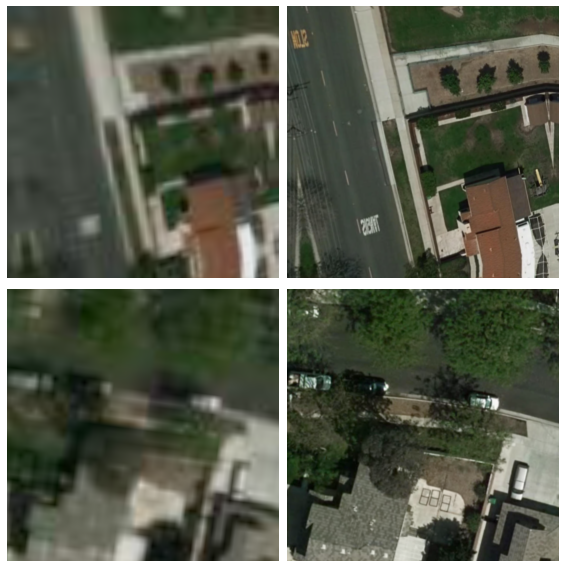

In [4]:
data.show_batch()

The imagery chips above shows labels which we downsampled in `prepare_data` and corresponding high resolution images with them. If we want to degrade the image more, we can increase the `downsample_factor` in prepare_data.

The Code below instantiates a `SuperResolution` model, it is based on fastai [notebook](https://nbviewer.jupyter.org/github/fastai/course-v3/blob/master/nbs/dl1/lesson7-superres.ipynb). By default this model will be loaded on a pretrained 'resnet' backbone.

In [11]:
superres_model = SuperResolution(data)

We will use the lr_find() method to find an optimum learning rate. It is important to set a learning rate at which we can train a model with good accuracy and speed.

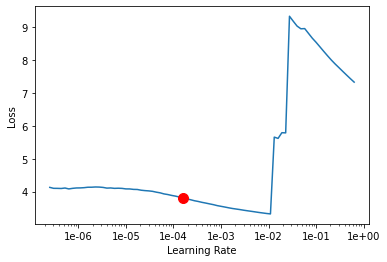

0.0001584893192461114

In [6]:
superres_model.lr_find()

### Train the model <a class="anchor" id="7"></a>

We will now train the SuperResolution model using the suggested learning rate from the previous step. We can specify how many epochs we want to train for. Let's train the model for 10 epochs.

In [7]:
superres_model.fit(10, lr=0.0001584893192461114)

epoch,train_loss,valid_loss,pixel,time
0,1.764578,1.667279,0.262905,12:04
1,1.460097,1.422421,0.224943,11:17
2,1.359061,1.346903,0.212538,11:17
3,1.313709,1.309428,0.208903,11:16
4,1.283329,1.291093,0.208715,11:16
5,1.280456,1.274125,0.205538,11:17
6,1.245067,1.257469,0.202738,11:17
7,1.239518,1.248023,0.202647,11:17
8,1.230550,1.243982,0.203220,11:17
9,1.232157,1.245707,0.204075,11:17


After the training is complete, we can view the plot with training and validation losses.

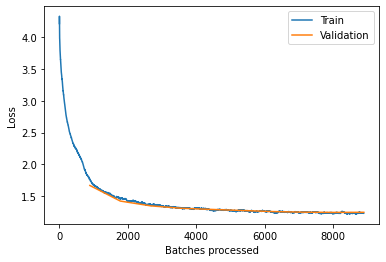

In [8]:
superres_model.learn.recorder.plot_losses()

### Visualize results on validation set <a class="anchor" id="8"></a>

To see sample results we can use the `show_results` method. This method displays the chips from the validation dataset with Input chip (left), prediction (middle) and Ground Truth target (Right). This visual analysis helps in assessing the qualitative results of the trained model.

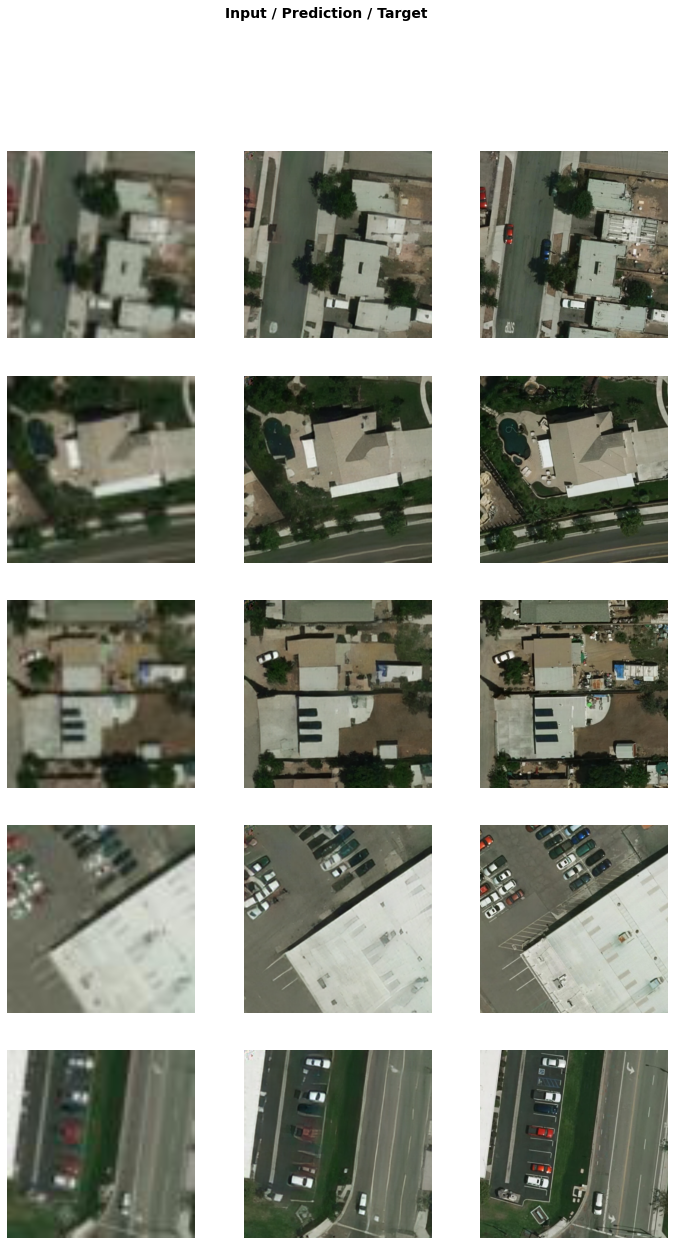

In [14]:
superres_model.show_results()

### Save the model <a class="anchor" id="9"></a>

Let's save the model by giving it a name and calling the save method, so that we can load it later whenever required. The model is saved by default in a directory called models in the data_path initialized earlier, but a custom path can be provided.

In [16]:
superres_model.save("superres_model")

Computing model metrics...


PosixPath('guide_large_data/models/superres_model')

## Deploy the Model <a class="anchor" id="10"></a>

### Prediction and Upscaling <a class="anchor" id="11"></a>

We can upscale and improve the details of a single image chip with the help of predict method.
The following parameters are available in predict method.

- `img_path`: Path of the image to be upscaled or predicted.
- `height`: Height of the output image
- `width`: Width of the output image



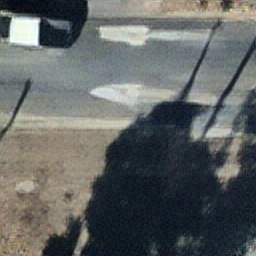

In [17]:
superres_model.predict(img_path=r"test_image.jpeg", height=256, width=256)

In the above step, we are upscaling an image with dimensions 32x32 to 256x256.

The model is not only generating a high resolution image, but is also removing the [compression artifacts](https://en.wikipedia.org/wiki/Compression_artifact) from a low resolution image chip.

**Note**: The model is not reconstructing your photo exactly as it would have been in upscaled version. It is hallucinating the perceptual details based on its training from example images. 

### Inferencing on ArcGIS <a class="anchor" id="12"></a>

We will use saved model to imrove the image quality using 'Classify Pixels Using Deep Learning' tool available in both ArcGIS Pro and ArcGIS Enterprise. For this sample we will deploy the model in Redlands,CA region where low resolution imagery is available.

- **Input Raster**: Esri World Imagery
- **Output Classified Raster**: Superres_Inferencing_arcgis
- **Model Definition**: model.emd
- **padding**: The 'Input Raster' is tiled and the deep learning model runs on each individual tile separately before producing the final result. This may lead to unwanted artifacts along the edges of each tile as the model has little context to detect objects accurately. Padding as the name suggests allows us to supply some extra information along the tile edges, this helps the model to predict better.
- **Cell size**:The model is very susceptible to the cell size. The cell size should be same as high resolution imagery we used to train the model which is 0.1 in our case .

<img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAAAvIAAANQCAYAAABKOIsdAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAKK3SURBVHhe7f3bmyTFfe/7s+904Qv9EevOd15/hOW2vXyxfkt6Hnl7S9peXj+5GlugE5ItYyQhNK0GoQPiJCQQmhYNgwTijNBhWkDDIM4wDHTPGQbmwMBwGvDysmPnNzKjKiIyMjOyjhlV7+/zvJ6ZrsyMjMzKivxUdlb1OVdffY0CAHTXVVddrV155VV9V1zxA+37379Cffe731Pf+c531eWXf0dddtm31erqpWpl5Vvq/7rgSQDAHDvn0KFD6qWXXgIAdNS+ffu0F154Qdu7d6967rnn1LPPPquefvpp9dRTT6knnnhC/eEPf1CPPPKIeuihh/S/MsgzxgPAfJLx/Rz5jwz+AIDueeyxx9SePXv6Hn30UbW5uakefvhhHdh///vfq42NDfW73/1O/frXv1b333+/2vfii2r37t06yMsYb67cAADmw5tnzujxnSAPAB1WF+QffPBBHeQltP/mN79Rv/rVr9S9996rXszGdQn2MtgT5AFg/rzz7rsEeQDoOj/Iyy0zEuJNkJer8SbIy9X4e+65R1+R/+1vf6sHe4I8AMwfgjwAJCAmyJvbau677z4d5F/Yt08HexnsCfIAMH8I8gCQgLogb98f/8ADD/SD/N4XXiDIA8Acc4K8/PD+Bx8AADrmvbNn+2Ssfvudd9Rbb7+tP+h0+o031KnXX1fHjx9Xrxw7po4cPaoOHDyob62xgzxjPADMF4I8ACTg7Pvv6xD/7nvvOUH+jTffLAX5w0eOqP0HDugr8nKrDUEeAOYTQR4AEkCQBwD4CPIAkACCPADAR5AHgAQQ5AEAPoI8AIzo3HPPjRJaNhZBHgBmJzSmh4SWnSSCPACMKDSYh4SWDZF5r7n2Wh3czWMmyEuAv+rqq1Wv1yPIA8CU+ON5ldCyITKvP84b8phMi2mPIJ+4Q3fuUOf+w3nqR4+FpwOYPHsQrxNaNuSyyy7T89uDvAR5GaNNiP/Wt75FkF8Az933vH7+PvV4eDqA6fDH8yqhZUNC47ywQ7zMYy8TMnSQNwGy7Hq1JzA/JoMgD8ze5ZdfHiW0bMiZt94qDfJyS83V11yjlpeX1erqqg7ukwzyJkCWbavbA/NjMgjyQDeExvSQ0LIhoXHeD/EyT2hZW/sg/9j1eWC/5G51qDT9iLrjEkIlgMUig+7evXuD04RMk3lC06r4g7wd4l8/fXpy98g/vp0H9suOqOdK08+olcsIlQAWzzTG+bYhXrQL8kWIJ6gDwMAkBnjx6muvqRtuuEEvK66//nr18iuv6LF6IkG+CPEEdQBwTWucl//LY6F5Q+KD/OG71TfkSvyP/hCeDgCJuOPOO9W5//AP/YGzJJsm84SWDZFlkg/yR4+o/ypX4n96IjwdABKS6jg/sSCf34u9Q91xODy9yZ4f2ffRn6e+ceeR4Hz9W3dsoTcP9m8HSssE7tPX8+T97/fFvz0odt1GYH5/u2K2u/R5A69ftdPt/eDM722rVv38+f3U6wi0DcyLO++6S/3jP/5jf/A05DGZFlqmiiw37gHev1fy0ksv1bfWyIddJcCPO8jn92I/r1aOhqc3uf2n9n30T6r/et+Z4Hz9W3dsoTcP9m8HSssE7tPX8+T97/fFvz0odt1GYH5/u2K2u/R5A69ftdPt/eDM722rVv38+f3U6wi0DcyT1MZ5+zYbmRZaxhcZ5PN738P3xTf5g/qRCYbmseLqvhtqi3WUwmaxvB/Oi5D5jUuy0OqE7br5d2Tzh4Jpy3VXzZ9t14/62xS33XmAdtvZc+dgmabp1UFelnMfD7VVtS1VbQDz5K6771af+cxn9MAp5P/yWGjeOrLsOAd4f3CXeyXfPHPGCfPy2PiCfH7ve/i++CYn1KdMMDSPFVf33VBbrKMUNovl/XBehMz/elkWWp2wXTf/89n8oWDact1V82fb9an+NsVtdx6g3XZuv2+wTNP06iAvy7mPh9qq2paqNoB5k9I4798zHxPmI4N8EUqHuK0mD4/lK+R5UBw8bl9FtufTQsG/CLDBNxeh24DM/IFtaLvu2vkLcdvdtF8j9ntNkC9d/W+5Lfk2EOQx3371wAN60BTrN98cnKeJLDvOAd4f3OUx+fpJCe3yYVf5+skrr7pqjEG+CKVD3FaTh8fyFfI8KA4et68i2/NpoeBfBNjgm4vQbUBm/sA2tF137fyFuO1u2q8R+70myJeu/rfclnwbCPKYf6mM88IP8/YyIaMHeROaLYOgWLOcE0CbrvgHpgcCrE2H0Kj52667aX7RcrsDgT/XND1TGeRD4dzvV8O2NOxjYF6sra2p6667Ljgthgy4l1xySfCryIRMazPAhwZ38wehJLSbMD+VIG9Cs2UQFGuWcwJo0xX/wPRAgLXpEBo1f9t1N80vWm53IPDnmqZnKoN8KJz7/WrYloZ9DMyTFMZ5ww7z/jRfuyBfG14z/hXfQMj35SGxJvgWSle4Y4J8af6YcFvmtpXPX7rabYve7kyxHVpo/0ZOHy7IN2x7wz4GkPvlHXdECS0bywR5+T55GavHe498EQBrw2vGv+IbCPm+PCTWBN9C6Qp3TJAvzR8TbsvctvL5S1e7bdHbnSm2Qwvt38jpwwX5hm1v2McABkJjekho2UmKDPKBYBxSEeRrQ6+WUJCP2abo7R7I11EI9KVyOkEeWAiTDfKBYBxSEeRrQ6+WUJCP2abo7R7I11EI9KVyOkEeQI3oIG9CXbsA2xySc023qwSm14bMqvlD4bbtumO2KXa7y/LAHupnxXSCPLAQJh3kTahrF2CbQ3Ku6XaVwPTakFk1fyjctl13zDbFbndZHthD/ayYTpAHUCM+yGeaQmboSnS+TMOV/Ezdhy6DV7iLkBkMocW08vzh9tuuu3E/ZGK3u6QpPPvTA/PHB/m6bSnewNT1BcDUTDzIZ5pCZuhKdL5Mw5X8TN2HLoNXuIuQGQyhxbTy/OH22667cT9kYre7pCk8+9MD88cH+bptKd7A1PUFQOe1CvIiD35eSDZCAboIwqVQK487IdwERz9UFuHTv2JerKtyfcH5q8J3y3Wbx/35s3X0+xK13Vk73hsR9w1A0/TMiEF+sC1uP83z7LcNYDamEeRFHvy8kGyEAnQRhEuhVh53QrgJjn6oLMKnf8W8WFfl+oLzV4Xvlus2j/vzZ+vo9yVqu7N2vDci7huApumZEYP8YFvcfprn2W8bQFpaB/mcCX8BwVtUQvN7AbeQh1B33ro3DRIy7dCpeeF3MH9VkM9Fr7tQWm/VGwGHvd2B6c7+a5qeGTnIi8HVd0Nvd6BtALMxrSCfM+EvIHiLSmh+L+AW8hDqzlv3pkFCph06NS/8DuavCvK56HUXSuuteiPgsLc7MN3Zf03TMyMHeTG4+m7o7Q60DSAtQwb5DiBkTh77GOiM6Qb5DiBkTh77GEgeQR6V8iv74d+cAJgugjzGLb+yH/7NCYA0EORRoeo2HACzQJDHeFXdhgMgJQT5RSf7sRTWzb35XI0HuoIgj6HIfiyFdXNvPlfjgdQR5Bde4AO1givxQKcQ5DGcwAdqBVfigbmQbpAHgAWycEEeANCIIA8ACSDIAwB8BHkASABBHgDgI8gDQAII8gAAH0EeABJAkAcA+AjyAJAAgjwAwEeQB4AEEOQBAD6CPAAkgCAPAPAR5AEgAQR5AICPIA8ACSDIAwB8BHkASABBHgDgI8gDQAII8gAAnxPk5YQQmgkAMFvDBPlnnn3WCfKM8QAwX2Rc10H+0KFD6o0zZ4IzAQBma6gg/9xzamNjQwd5xngAmD8yrsv4TpAHgA4jyAMAfAR5AEgAQR4A4CPIA0ACCPIAAB9BHgASQJAHAPgI8gCQAII8AMBHkAeABBDkAQC+sQb5I0ePqnvvvVd973vfU1//+tfVV77yFf2v/HzHHXeoA9mJJbQcACyqk6dOqd8/+KC6+ppr1CWXXKLHzQsvvFB9+9vfVrfs2qXku+AlwHchyDPGA0B7seN8aNkmYwnyZ956S/3sZz9TvV5Pd0w69Zvf/lZ3+ne7d6tbf/5zdfE3vqGny0a8fvp0sB0AWCQP/PrX6vzzz1df+MIX1I033qjuv/9+PW4KCcbf+c531LnnnqvHz/37988syDPGA8Bw2ozzw1wMGTnIv7Bvn35nIeQdRWgeY3t7W3dUNubxJ54IzgMA8+74iRP6SowM7jLI112JkSs5Eo5loL/rrrt0gJ9mkGeMB4D2hh3n77777lZX50cK8nJFRlYqV2rkik1oHp907vZf/lIvd9vttwfnAYB5JWH3s5/7nB7gj736amn6m1kwDw3ijz76qPr85z+vLr30Uh3gpxHkGeMBoL1hx/k9e/boCyGyXGyYHzrIy+X/z3zmM+qhhx8OTm/y/N69eqBvusIzko0VtbTUUzu3A9MmTa97Se3YKE/bvbKkp1VNn4ia/ozFLPd1k0lvO7qtQ8+/hGG5NUV+vRqa/vIrr+hxVX7V6k+Te+TlCs+XvvQldeutt048yCcxxotZjj01xxbj/JR16HWOGejQ8z/KOC/k6vyXv/xlddtttwWn+4YK8vIuQX59Kr8GCE2/55579L2S3//+93WHQ/MIuc9SOivvTELT622oHcUg6VpRu808sxx0Kg6qfHC3+jiK7TXVK22/CGzzpA/yMe3r7bVefTvFNvfWtsPTQ2b9Ai/WH7SyEV6ma4r9nuRJctbPv0WubMstKlVXt+XeSRk75UqOP8182PWxP/xBzyNBeVJBvhtjvGCcZ5wPTA+Z9eu8WH8Q4/zkzfr5t4wyzhtya6JcCHnxpZeC021DBXn5dalc+g99oOmxxx7TA7e8G3nq6adL021yRemiiy5S119/fXB6FXOlo/yEbaudvY4M8EHSvzG+qCtedPkg2XIQHFWXB/hZq9w3g5DS+YEz5QG+I+TKtAngoekiJsjLh11/9KMfqX/5l3/RY/Akgvysx3jBOF9gnE8D4zwyo47zNhk3ZfyUcTQ03Wgd5KVBuXFfvqnAn3bg4EF12WWX6Q7Kjf3+9BCz0fIr49B0X6srHQs6wIuxXhGKwQBfrWHf5M9Vl47TAAb4kcmvUSWAh6YZsUH+1KlT+lezMg6PO8jPeowXjPMWxvk0MM4jM+o4b5PfZMpY3HR7Y+sgL4OynED8XxnI4P+Tn/xEd259fd2Z1kSu7oROGiX6hdLiIKt4YeUvKFv4xWWuePT11tR27HRv3aV5i/l3Vg7ExcnAW6ej5kVXGigr+lMaKIs2/ZOQv89Ky1Xs66Z96Cv121cxwNeuJ9Q36zF326rW7f+KX+bLH2s82VTsm4Gi7cCJv3G/R86X75/8OPPnjXo9tRjgY/rszxPcP/39VrwWZD7zvLZ5/mb9/GdkvJRxU8bP0HQjNsjLt9Zce+216pprrhl7kJ/pGC/0c8M438c431e7nlDfrMcm/jqv2DcDjPPB/dPfb4zzIfKmoOmNQesgL99GsLq6Wnp8c3Oz3zH5tK58SreK3MhvLyudrPpQwEDEgOcLPbFyoAYHL3e+/DF74M3WvzJYd9P04LrNNtjr1/MFXjgxL6iaeUoDZaA/wW0o7ePiwLYfCw2yse3b+yhgmAF+qOei2O/+vs/b8tdfvQ9k+cYXeGj9nvI2RO73yPnMfu1lz6+9vebEWHuciaLN+vki+yyPRbwGzX7z+zyYJstEPH+zfv4z8mtWGR8liIemG22CvFwR/+d//uexB/nZjfEiNAY1CD2/kcdY+XXnjh1N04PrNtvAON+fx8c4bx6L3O+R8zHOz/D5z4xjnPfJBRC5jTE0zWgd5G/86U9L9zuaeyalYzHkV7P28nLikL8MaD9WVuxk78CoFfHC0koHYb6u6ieuaXomuO7AAF+xXfkLz37BB1S+6AIDdbA/7rpDg2tVP0qPl9qP2EcBoT44Wj9XmdC268cCy5XaDw2+hao2fMF97/K3O3a/t5sv1NfQST2g8lgbiO1LUGC/m/0bfM23eP6C+7/F8iM//xn51ah8+Mn8LN/NLh8mNd/Pbsh96Wac9KeJH1x5pXozG6clyD/9zDP6w1DjDvKzG+NFeDysFXp+Q0rPbdPYMeTYwjjfKNQHR+vnKhPadv1YYLlJvM6D+97lb3fsfm83X6ivjPP9x8Qknv/MuMb5K6+6qn9fvLw5kKv8ps2Q1kE+dGVFBml7EG8i34/pL+8/VhJ64pqEntggf5BoOugjXhTBdYcG+NABFJ6vJPiiK5YNHtDlfZG/+OTx0EBZM3j67ZXaj9hHAYP+hKeXj4Mhn4uK/eGf9Mo/l+dtPCYr1zXgbnfsfo9/fur2a+M+F8FjzRbfl7DA8nq5inVWtpm34zxfoXmjlw+0583b+Pxn/Ksq5q+ktvX3f//3amtrqx/kP/3pT489yM9sjBeM82WM85khn4uK/TGR13nlugYY5wPL6+UY533mL7yaq/ymzZDWQV7ujfS/kkx+jXDJN7+pVyY35suAXWf95pud5eUryq6++mrnsbL4ndlXc2DlB3X2xFlCB5cWGjyipvvrrhi4/RdP44upUMzX74cR3R9hTgjCezda1X6f1V6o/aZ9FNB+gM8M81w07Q/zHIXW1xd5TFaua8DZ7tj93uL5yduvuFoS0T+zrspjskVfjLjXYEW/Yp+/qnljlx/H85/5wx/+oK/CmJ/lQ0zy61UJuDa5EmMGcn+afJOM/LEQc2vNo9n/P/vZz449yM9ujBeM8yVVry3GeXeZyr7V7A/GeVexLsZ523THeSHtmDbkayjtNkNaB/l7771Xff3rXy89/tzzz6uLL75Yr1DupfSn1/nBD35QGvjLih0fOVBogSexf1A57VQ/Uc5B6A/MddODB1Dg4LMeN+vXbcZsZ9OLztZ0QEv//XXWHtyeyvab96Etnzfcjlazza2ei6b9YZav3cfjG+D11Tqz/2P3e4vnJ983kx/g4/tiba8W2Jd1/Yp9/qrmjV1+HM9/Ru4pl0E79HWOtt8/+GB/gPen+ffI33nnneqrX/3q2IP87MZ4Uez/mPHPCDyX0cdYoXLsaJoePI4Cx6D1uFm/bjNmO5tee7am41r676+zxWu3uv3mfWjL5w23o9Vsc6vnoml/mOXH8Tqv2TcG4zzjvKgb530yHsu4G5pmtA7yR44e1SsP/RGQ3dkJQ+7lWVlZ0b/+9aeHmE/5Nn0fsWh88ftKT2LVE9L8ROW/Fq1ed2l68AAKHHwFvW36gM/niTloGl90tooDur9PN0Iv0Hy/hPpbUvmCGWjah5pup3kgqdvmqOeisr/+c1RzbMQOak37ptRO7H6Pf37qXjv5tIrB32jc7+36XN5ngcfr9lv085eZ9fNfuOCCCxq/uaVNkN+xY4cOx+MO8rMc4wXjvCdizOurOK4Z563HNMb5oMb93q7P5X0WeLxuv0U/f5lZP/+FUcd5n3zxwK0//3lwmtE6yAu5B2jnzp3BabtuvVV3Tu6zfCM7uYTmsd199936k7vmxv56xUHkX1Go4j+JVU+Inq/hiSrmqTzA/enBA6h6gM/7ls2vB9rQgRfQ+KKzhPpTLG/6ExqA88caXvwiuL2epn2o1Q8UUYNRzHNR2V//OSp+DhxzeV8iXuC1+ybcfux+j53P9LW87+v3d1/EsRbVlzavwbr9Fv38ZULzRi8/hue/IPedy5VuCeOh6SI2yO994QV9f7xcJR93kBezG+MF47wj4rXXF+pPsbzpD+O8mMDrvHbfhNtnnDePVey36OcvE5o3evkxPP+FUcd5m/xVV5mn6a+7DhXkzc338q8/Tf7ox1VXX62n//KXvyxNt8mVH7lSIxsVmh5kBqXKJ8c6wEpPYuDJ6rdnP1HZQe8d8O7B2zQ9EzyAAgefP036EnsCi3jR9VXtC+cFGTiBmv3j90ker30RReyjClUvnPAgNeRzEXx+ROA50vNWPBboZ0nVuqr2bd00f79Hzmf2nd+PfF+F9oOnWE/tsRbVl9jXYKbyOaqbVvX8efO2Xr7iMb/PNeTXrXJbSt24GBPk5VtrJGhflwXpt95+eyJBfqZjvOgfE1XPUd3rO/YYY5wv7Z/a126m1D7jfF/Vuqr2bd00f79Hzsc4783bevmKx/w+1xh1nDfkwof+q9g33BCcbhsqyAv5NK58TY7/R0OEfI+w3LB/xx13BKcLOSHJr2fl3snQ9CaDA9bXNMgWg5gzf/6YM8A782Scg7Zpeia47sDBYysOmqgBW8S86AyvP/kLO7Bs0Qf3oA1srz9Ql7Y3Yh/VsV70A6GTw5DPRegxreI58vuj15GvO26At5btC63fFrHfI+fLXy+DY72+vYDg81Fw9lVMn0N9yB/r5AAvRnn+LfJhVfnKSPONBD7zXe0Sfv1pJsjL7TTy69uTJ09OLMiLWY/xgnE+wzifGfK5CD2mMc4HMc7PfJw35AsC5Ct/5QOzoem2oYO8DN7ybkE+fRuzIpu805Bf28q7lqYPBSySwYswPB0d0+YEO2McWxMw5PMvt6TI2ClXq/1pMjb+8Lrr1G9++9vSNAnyv/nd79Ty8rKSvxwo804yyDPGTwavxcQwzi+2KY/zQu6xlzcCod+Ihgwd5IV0UL7sXt41yFfkhObxyb0+snFypafpvp/F0nAVB52T0qDJAD9+w+5TCcjy9Y5yNebe++6rvZfSkNtZrrjiCnXeeefpwV8+7DrpIC8Y48eNcT41jPOLbdrjvPwGU77it+kDs7aRgryQk8muXbv0uwd5ByJ/ySo0n/yKQX5VK/PJXw2s+nXsosoPlqZfwWEW5Lkp/Vqt+DVqm1+3zRID/PAm9fzLfZLyIVC5/US+N1jGUn8eGdjl68dkPvmWGgnW5ltrphHkBWP8+DDOdxfj/GLryjgv84W+MazOyEHekCsv0gG570d+nSr/lz8MIl+dI/dzyuNyZSf2qs6iyF94cj8Wg3tn+ffNJfh8McCPYILPvwzg5qqNXIX5RjZGmj+qJB9olXFTrobLIC8BXq7qTDvIG4zxw2OcTwDj/GLryDgfc+XeN7Ygb8j9kHIjv3RIPgwl/8rPsiGh+QFg0UkolwD8wK9/3f8QqVzJOZiNy2Ye/3vkpx3kDcZ4AGgvZpwfxtiDPABg/LoS5AEA3UGQB4AEEOQBAD6CPAAkgCAPAPAR5AEgAQR5AICPIA8ACSDIAwB8BHkASABBHgDgI8gDQAII8gAAH0EeABJAkAcA+AjyAJAAgjwAwEeQB4AEEOQBAD6CPAAkgCAPAPAR5AEgAQR5AICPIA8ACSDIAwB8BHkASABBHgDgI8gDQAII8gAAH0EeABJAkAcA+AjyAJAAgjwAwEeQB4AEEOQBAD6CPAAkgCAPAPAR5AEgAQR5AICPIA8ACSDIAwB8BHkASABBHgDgI8gDQAII8gAAH0EeABJAkAcA+AjyANARLx1/W939wil101MntDv3nlLPHHtLTyPIA0D66sb5YRDkAWDGHjn0hjrvzoPqYz97SX38pi11/l2H1OfuPqz++uYt/dinb9uvfvXiKYI8ACQqZpx/4KXXg8vWIcij0u6VJbXUW1PbgWkARvfMK2fUdx58WQ/qV+85oTaPvqsOvvG/1dG3/l07dOZ/q0dffk/95MlT6v9Z31KXbxxRTx05TZDHEDbUjqVsTF9aUbuD0wFMQqtx/uZtPa8sE2orZOQgr8OeHhwshL+J217rlff7Uk/t3A7PPwyCPDA5L7/xrr4C862NV9XG4Xf6g7rxzPH3ncF+96G31crvXlGfvOVF9fzLp6cW5INjDePC2AXPpWMd0wnywLS1HedlHpn3U7duq32vxd1uM6Ygbw82czJYbK+pnmzHykZ4+ozpkysn07Fhf2Kajr35rvrGb46qCx94WV+NMYP4k6++ry76zSv616zGN3cfU3tPvq+OZPMdfvPf1OrGy+rrvzqojpx8c3pB3nltbKudvXTH+K6+1svnUoxFx8/lmF/DjPNmnssefFUvK22E2rZNIMgPruDs2HDnTQpBfqGwPzFNa08eV1++76j6w7Gz/YF7+41/U8u/PKAH9S/dd0T/mvWL9x7RP8ugb4L8nqPvqC/edUDd+NjLMwrymWJ8THGMJ8gvGII8ZmSYcd7MJ8t8KXtc2gi1bZtIkH9/Y0UH+d7atvNz+NeF1tUdM58ZZCOX21m8cbDnMW8mcoErR+bFHZjHXTbX35aGZWu3p3a5dppORvK8SJ+dbbHm189bYGDTjxfz+fP019l/Xmr2mdd2U3/MPLKcM0/Rjtt+eb+5093jsX7d5vmymGn+8+X1FxjG8bfeU//z5/vV7fve7A/a4rYX3tCD+Sd3bauXXv+3/uNm0H/+xFkd5A+98YG69bmT6m9u2qeef/n12QT54jevOsg3jGv95f1xo2G58Y8HNa/1ymWsaTHbMMIYobfXW+9A4Lxi96M/3Vve9E/3y2qjqk27/6Xnx3/j1tQnd55xn6dj1u+2n+ufyxuOP2AUw47z9lV5mfcTt2TzHX87uA5jIkHevHjMi373iv0C8W+9MS/GjDcIxi7Xf2HaL2YTJM2L1fxszTcYlAK3A4WWE43LVmxPoL3ttTVr+9rpn1gC00T+vFj7xvTTrF9vh71/B/MMnje/v8Wg6O2TfF12W8U+sOZr7E/dPM5jFW3b+8Lbtph1l/enuy/E7uz5qtrfQKydTx7XV2DMYG2sPf26+vRtB9QVjxx3Hv/e5mt6gH/4yDv9IH/w9Pvq83fuVz/Z88oMr8ibMJaFNGv81683/7Xlvd7yx+uXm9R4ENqeqGVK2zDeMSLf3qYgb/XBnFNMv4tz02DfDPqd99G0YbbLatPbH2a5UFulfS/LV/XJmqe/XNHP4HL2/i3mizrXVq7fesxuO/DYKOdjwDfsOC8fhLUf/+K9h9XakyeC6zDGH+RDLySPu4x5MVYNYAPNy9U9Zl785RAn3AEvE3rxRy1bsT2BQXYUZp0Oa5/rfRXqpzfAOv2RPta0ka9zcHLTiv1kn8wGjw/2QXN/inm84yZ/zt11Ost568nl22b6FLNu/+dwu8Do5L5Huf/RHqzryJWa//nzA/1ba0yQ/9buo+ofbntpBkE+PA726bFu8JrVy/vjRoi33KTGg7jXemAZfxvGPEbk2+bp99OcV+w++I8Vz0vlMlU/+9vgt2M0tVc3j72OusfMcm3OtXXrz+jnyWtrzOdjwDfsOO8/ftlDr+mvrAytwxhTkPcEBvjyfOZFHHoxDrtcxGPmRV2hH0hDL/6oZau2pxiYCqMOIKWTkUf2W2kdoROs1Ya/jN731vYH1+m1OZBvr9mfMf3x1ycq12keKwbkELO+YfaF0P2Rtvz1AyPo3bZfX5XxB+wQuWojV2nkXz/I3/jEa+rTu/ZNJ8hXvLaq56l/bcUsN6nxoNTGMMsUxjlG5G35odqIO985bZTOYf78Feeq0Lmv4PYxpk8x8wQeG/pcG3gsuD3jPR8DvmHHeX/a2jOv67ZC6zDGFOSrBp9M/wU5eGE1DwbDLhfxWM0g5QjNF7VsxfYY/e2qmSdC3clRyL5qCq95X+xB3+2P3t/WtlaeRIPbMc0gX78fY9Zdtz91vxqfdyCOfBXZ7S+490365BsO5FsMZHD/1+IbD/wg/+vt0+p/3Pj8jO6RN4pAZE+Pem01Lzep8aDUxjDLeMYxRuRtVJ1LI893eluKcVf/327Pn7/iXFVznnP7GNOnmHkCjw19rg08VteWmabZ7QCjGXac9+eRrx2W6aF1GBMP8noAzF4kJtCJ5sFg2OViHgucQEKCL/6YZcPbU1IMuMNeCYg5sTQG+YyZT7fnDXR6f1uPBddZ7Cf7eRo8PjguYvrjr08E1ynLmceq1m+JWXfT/vS3BxjWP95xUF3/xKnSgG2T7xGWwVu+1UC+5UAe84P8dY++qpZ/MYtbayyBMUXP3/TailhuUuNBqY1hlgkZcYzQ21u5fOz5rjhHZftNt+f02Z+/6lxVdZ6LWX6YeUKPDXuuDTxWPL/+seTQx+Pw52PAN+w477v+8VO6rdA6jIkHefMC6b+IzIuqv0zoxTjscnGP5ScMq20tGzgCg7s/kDQvW7099onCtFN38qjTdGKJCa/9x3pZ33rl59A/kVatMz8GAvvcWjamP/76RHCdus+Dx4LrX3GnN+4L/+fs+d9hL6On1xznQKRv/u5ltWP34GvGfPtOfaD/AqAM8L/a/1b/cT/If+PXh9V5t2/NNsgX42R/HOuP04PXUnD5iOUmNR6UXuuZpmWqtmGcY0Teh6rlQ+eV0GNFX/W+9Mc9f/7w8nYb9vLmscE5K6ZPMfOEH+tvR6tzbeAxc2zZz1/2XI3zfAz4hh3nfdLG5+46FFyHMfkgn8nnKWQvpp3OMqEX47DLxT7mDnaGH/bseUIDmm0wvWJ79CDvLjPKoBHqg92m7Dt/e0InsH5//ZNURu//iCDfn2b1w193TH/89YngOmU57zHnWPHWH7cvzPOWkbb7wcIY/gQN2G577qT+6rHQr1HF7w7mv0oV8n/zuB/k/+G2bbXryRl9a43Fee3LfN5rq2r5puUmNR6UXusRywTXO+Yxwl+/kfcjdF6pONcE3hSF569Y3tDPh0w3/O2L6VPMPFWPecdIYfC8DNeOXr60bYR4jNew47zvM3cc0m2F1mGMHOQBAPFOv31W/e2t2/oPgYQGbvlz3fJnu/0/3W0H+esff019/GcvqO1X35h4kAcAtDPsOG+78alT6v++eUsdfr3+r7sS5AFgyu5+4XXVu/2A+m3gSswTx86q1Qdf1eT/5nET5H+9/ab69M+31C+ffXUqf9kVANDeMOO8IcvIsne/cCrYto0gDwBT9t77H6gfbB5Tn7v7sPPX/UTdrTX7X/9AXfjAYfX9B4+oM2+/Q5AHgI4aZpwXcoX+ot+8rJeVNkJt2wjyADADp94+q75wz6HMYXXr82/0B/EHD7+j//KfkP+bx3c9d1p9/u6DqveLLbX/+Bn19jsEeQDosrbjvMwj8y7ffqDxlhqDIA8AM3IyG+RvfvqE+vtsMP/m7lfU3S+dUU+++n5/UH/uxAfqnq231HceelUtZ/OsP/maeu3Nd9Q7775LkAeABLQa528/qOeVZUJthRDkAWDGXjr+tv6T3ubryOTbDv7fW/f3f/X6L/cfVk++/KZ67+xZ9e577xHkASAxMeP8U6+0H6MJ8gDQEfJr2D1H3lQPvPS69sihN9Srb76np519/32CPAAkrm6cH8ZIQf6cf/o9xiC0bwHARpCfX6HzAmYj9PwAXUaQ74DQvgUAG0F+foXOC5iN0PMDdNlIQR4AMB0EeQCAjyAPAAkgyAMAfAR5AEgAQR4A4CPIA0ACCPIAAB9BHgASQJAHAPgI8gCQAII8AMBHkAeABBDkAQA+gjwAJIAgDwDwEeQBIAEEeQCAjyAPAAkgyAMAfAR5AEgAQR4A4CPIA0ACCPIAAB9BHgASQJAHAPgI8gCQAII8AMBHkAeABBDkAQA+gjwAJIAgDwDwEeQBIAEEeQCAjyAPAAkgyAMAfAR5AEgAQR4A4CPIA0ACCPIAAB9BHgASQJAHAPgI8gCQAII8AMA31SC/e2VJLa1sBKfNku7XkqeD/QSwuAjyAADf/Af5jRW11FtT26FphXK/NtSOLMz31ratx4YUsX4AaEKQBwD4CPKZUL+213rjCeAEeQBjQJBHre011XN+m5xfkFpaWlG7/XkBzI0ZBvlttbO3pHZs5P/mt7T01M5td365Kq5DtZ6ecUKxDFTuMvlglg9cen1mOVHxJqIyyNuPmUHS8MO5BPb+9LxPdet3tsnZBrNfGIQBDKQQ5N1xLTeW32x2hhmXbd45aFYI8sBCmnmQtwdBPd0KyCYID04ExTLOQFUd5PXPw1yR12247W6vrZTCdn8Zf/6NNev/5fWXrvbrNwGmz3nbvZ69PgCLbtJB/uVXXgk+Luqm5crjuWbCZcMYHFQKphPQYh39NynevO65YYamsb/EtNYDIMrMg7xztUYPEIMQXgrY/XnMyWKMQV4GJiPmpGO366/TVlp/oM/FvtixMfj/fF3FAjCqSQb5+++/X5177rlqz549raYZZgzNxzCPvlAxxJg2jcAYuQ4T4js9Lk9jf4lprQdAlJkHeWfg1wPEIOTK/OWB0w7Ck7giL22GT0ilXxv32zVXowLL+esvTmohdpAPnhABLKxJBfmTp06p888/X/V6vVJglxAvj4svf/nLep32srl8zKweZ834aMbl0PzuPHW36ORvGrL5TKA0nGA52jpcTdvn8fuVCY7njfNZ/TXnDasPfv97Kyt5e945drDfA+1pZnqhdI4anGMb91lpm7y2m6YDaI0gn3H7ldEDmT3ABAbyULv9Qapm/aW2fYH9AmDhTfKK/Av79pXCvB3iL7jgAnXk6NHgsvmYVhWCc3n4tsdtbzwthc6MGU+dgG7a8uYt+jCYd7R1OGLmKZiga++L4R8z/fW3o2Hefj/97Q3MY7bNan939oZgcH4q9mPMPiueg8G5y1s2sNz22pq1LgDD6HyQDw8WZlCRgcIL8n5Qlp+9QdBXXk/et/4gqftlD27FQBps11vWX7+3jWWB/QJg4U36Hnk/zEeFeFEEODuU+vLgOc4g74+h/vJjDPIR25cLrVPE9C00n/nZ39aK5UvbUtWetf3Bx1yl/R3cZ0WfvP1o3nDo81n0fgTQRveDvBkE9Dz5YDEYCIpBqN9mMZjYg5IePKoHKVEO8hm9XNEXr1/9gcwMpNm8gz562xVYf75d3mC6YgblwH4BsPAmHeSFHeajQryICGhuGAwF0WIst8fFYGAMjZ/24+NZhyNi+7Satpy+xc4X6q+oWr70uL98qL3wOvJ+2ALnP3v95rEK+fnMnJ9zBHpgPDof5HtrG8VAUygNfvbgkA1Guo3QQBVaNuf2yyiWK04E5sqCJo/J4G5OEt4g5g5Q4fX7A6X/5oQgD8A2jSAvTJiPCvFaKDTbzBhoxuXEgnzj9hVq2nL6FjtfqL+iWL4UhEvt+suH2vMeM21Y87h9suax+1+zTSX9dbjrATCcqQb5tmQA4V07AEwvyAsJ83EhPlcKe7bSFe1QMC4es4NdRTgMr8sPqaOtw5evs+kCS1Xgj+lbaL5Q8M6YPvvLF/t5lCDv3ApTzBMV5Cu3qUbsbzoA1CLIA0ACphnk2zOB0AvYFaHTD4eD33haIbN2Wfdxs7x9vhhlHWVm+8rnJPt75EP9CIXjuPlCwTtn9sFgXvMmJTNCkC+9GTD7JxTkvX3W379+wDfzZW2H9oH9GID2CPIAkIBuB/lcP8xZwkHNCp6ZwS2Ubmi12zPngjzEZvOZ0OlNHxh+HVVC21d68+L1qzQ9er7qIC/6b2jMshtFwB4lyGecdrMQvlP/7Patap+F9k9/eml7CfHAOHQ6yAMAcikE+WnoB/nANABYNFML8rt27QKAuRAa4yaNIJ8jyAPAwFSD/NbWljp58iQAJEnGMIL8bBHkAWBgqkFeToQURVGploxhBPnZIsgDwABBnqIoKrII8gCALiHIUxRFRRZBHgDQJQR5iqKoyCLIAwC6hCBPURQVWQR5AECXEOQpiqIia5ggf+b1p9TRvRerlx76i77DT52vXj/2QHD+KgR5AICPIE9RFBVZbYL8kWcu0PY/9gl16ImeevP4w+rMqSe0Yy9errYe/qv+PFVOHbuv3x5BHgDgm3mQ31xdUkurm8VPg9KPL6+rI8XPpqrmjy1Zfnndb9WtI+vLtesYtQ8URaVZbYK8XHl/Zd+l6uThdXX2vTPqg+wx2xvHd6vjB2+sdOCxT+l/TXsEeQCAb+ZBPkvFamlpVbmx+IhaX5bvCl5WbubOHx8lQxPkKYoattoGebn67gf4WHJFniAPAKgz+yB/ZF0t+4G9eGzZD+2heVsWQZ6iqGGLIA8A6JLZB/niKrsdrk2QLgVmuXpv3W6j51uSK/cFN/UXV+831aqenl/1DwV5vR7TRtb+Zssgn7e5WfwWIacn6zce5jHvtw7OtEzVbUTW9FC/3H1gv8kpb/+q128pvXxg3RS1SHXppZeqD33oQ+qcc85xfPjDH1aXX355Mdf4g/z7Z99VJw/fog489gk9f5VDT32GIA8AKOlAkC/CZCkYZ9HSC+52gM4DrB2Oi9tx+u0UbxCWV50r+P22i9Jt2kFW3+pTDrx22f2Q0j9bIbofrvvt+n2Teex+lafH9KsUwp3blALb7+1PM0/NplLUwtTFF19cG+Klhg3yJw7e4HyI1Tj89OdLoT3k6N6vEeQBACWdCPJuAJUryCYU+/83odN+3Cp9ldsLst5MbpAPt+MHdb+CQd6Z3+5rUaUQ7ZUzPaZfoXnsYB7afm8ZZ39RFHXeeef1g7wf4qWGCfJvn35O7X/0Y6Vw3sapl+8kyAMASroR5O3g6wRaK5jaodMJ/nbZQTV8tdkJ8hVB1v8NgV+hIF8bmKUCQb5/5d4w02P6pfeBtawln6V5+5u2k6IWsSTMh0K81DBB/vjBn5aCeVtvnd470SD/0sl31X0vvaGuffyU+vru19TKg8fVzc+dVo8cPqPePvt+cBkAwOx1JMgPAqYfLs3P+l8TdMcV5CvaaQq4owf5/I2LE+zt6TH9qtwHpsLbP1hPxXSKoiqrbZB/88Qj6vDTnysF8zbk/nhpbxJB/oXj76gfP35S/cPdL1f6waMn1BOvvOUsBwDohs4E+Tyor6pVP1wWgVU+qNkPy/qKtReUpZwr2bFX5Mvt+EHdr5GDfOCKu/NGJaZfVfugX1VBvejbZrkPFEXVV9sgf/zQjaVg3taxl76r2xt3kN+Xhfiv/PpYMLz7PnvvK+rhw4R5AOiazgT5PJhmQbUUTour197jOtQ6QTQProNAHRHks9Lt+FfGZX0TD/LWdLPt/X7kfW/qV3AfrLpthDZD93e5/rcOFEWVq22QP/rchaVg3pbcHy/tjTPI7zvxrrp492ulwP6TJ0/pD+fKv/60i377qnrutXecbfTtXpExydJbU9uB+bpue63nbsfSitodmG8adF9WNvo/5/t4dv2pUnrurT4DmJzuBPlQeC2qHFjz0lexrYHDDdNxQb6/XtNOtsDkb63x+i6Pe9Nj+5Xvm4FBP6qDfP7GwX/DRFFUU7UL8n+utvd8vBTM25L746W9cQV5uef9+ifKQV3UBXnxo2y5t94L3TO/oXbIGOQF96FC58bKZN4ARLW7rXb2An3Olt2xYf08RX6QH7uR93exz7w+7l4b8Tmc1HEAzJkOBXmqqcpvGIas0psGiqJiqu0V+VHt3/M3/fbGFeTlg62hkC6++ttXdYiXf0PThXwA1t5OoQN7RejS09oE0RkGeR2aOxYeOx/kt9dUb6mndm4Hpo2CIA9EIcinUvrWmnHc055fqR/LGwKKWrBqFeQfDofzNswHXcW4gvytz58OBnTxzd+/pu544bT+NzRd/HzvaWc7zdX4yivWTtCTeb3Qp6fnV8Crbs+Qx3tr2+4tL07IG65dV8N2WJx+VLRXP09+FXtH9tzo32RYvwFw+ppt424vyJt94bZjfpMgQvvBbdPst7r94va/LqjX7ze9Dm//6LZNPySwe+sZtl/5vtmw9kXRL2cftPwNEdBxBPmOln/LzDhCfL/NmtuGKIqqrjZBftzGFeSvfPREMKCLpltrhCzv9E0HsbpwZAe9+sCtfw5ciTXBzg+wg4A3XLuOxu3I5UHSnq98a0nzPPnPvd5KKYg6fTQh12o7D6vefrC23W9je81eR7mvof3iBG0zT82+MeF60C9Lqf28D4OAbT1vG2vW/9v3Kz9OBu2Zfg2WCWw/kDiCPEVRVGTNQ5D/6u+qb5uJCfLyDTZO3xpC3tiCvB++nBA4rSAfWI9w1hUzTxHkneAbXs7f9lCQd9rxt9vn74fSfgn1wwrf/cc8er0SpBu2y+5fXV+H6Ff5OJFlvH43HQdAYgjyFEVRkTUPQX5HzW0zMUFelnf61hiA7TAVCGN+mAsELTe8GnZbw7XraNyOTOU81vpj5gkF44pQq68qNwT5cjvuvuhfmTbs/eDvF91/a16Ls54qZvmKPrvbk/c/2PYQ/SofJ4Hjwm8XSBxBnqIoKrLmIcjLN8+EArqICfKyvNO3QHCsnj5c4J5KkG/aDqHD5ISCfMVyowV5WWcWdv1A3PRzsP8t+Puyv45Af/vzSyiveb4i+kWQxyKaapDf2trSJ0IASJGMYakH+Tv3VX/YNSbIy/J+3yRAubc0VE2rCFZ1AS4TbN9Zbrh2XcXV4Yrt0KrCvn68WFfMPI0BfMDfdjesNrTjrDOn3xj4Adn+uar/reRvIAb9Kp6fjXJ/BvJt6W/bEP1y940gyGP+TTXIA8A8CI1xkzauIH/gVPXXT8YE+cdfDv2F1zy4+SFYh1AnuPlhuVjOnscP4Jm8HT8YlgNt23bLiuX8oJcta9ZdtU12gGyeJ//ZCeAZvZwfsqU/IwV5K8jqn0PrCO1vr/8rFeFX2vSe9/xWnnKbvZ772wV7v5a2ZYh+uftGyPNJkMd8m1qQBwAMb1xBXtq66ZnXSwH9i786pnY997oO8vLvBb96pTTP2tPebTWOPIjZ9y77wT5nQrbIQpkOl144M+0Uy+cBzf1awXLb7dsNC2yHF/z8e87d8BgzT74OP8iX1p31c7Rba7x+yHaUgmx4v+SheSC0jTl7vxv2fi94/Ro8NlgutI/0tMh+EeSxiAjyAJCAcQZ5uSrvf+j1ga03dYg35Gd7+jc2XtN/TMrv1zSUAxqSQ4AGJoIgDwAJGGeQF08fe1t94VfHnLBe5TP3vKx+e+BNpz/TRJBPXX51necQGD+CPAAkYNxBXmydfLf2fnhx1Z4TOvTby00bQT5d/Vtham9nAjAsgjwAJGASQd545PAZtf7s62rlweP6Dz7J/fFXP3ZS3fPiaXX6nfeDywAAZo8gDwAJmGSQH0XoW30AIHWh8a6LCPIAkIAuB3n+RgiAeTHLvxcyDII8ACSgy0FeTn4URVHzUDKeEeQBAGNFkKcoipp8EeQBAGNHkKcoipp8DRPkZUx+ORt7H330MXXTTbeoy779XfWFC/5J/eNnPqvOO//z6jPnfU7//2tf+4a69oc/Vvfee7968aUtPSbLuB5qM9ZMgnz/66iMRP9IhP+X++y/Zjfpr0vL96H71/MG/ckfD83Tlv9XBX2l51LwNWPA2BHkKYqiJl9tg7yMyy+/8oq686571Ncv/qb67Oe+qP75K/+qPvf5C9Tnv/Al9aUvf0Vd8KV/1oFe/i8BX37+/hVXqef27lVvZOO3jO+htmNMOcgXf8rZC+5DBc5J/ZW4qHbNn472+pwta/5U9qSDfEnoz1+PQVSQd6bnz/FYtp2/BAj0EeQpiqImX22CvIzJJ7L51362rn543Y/Vzp03qZVvXabDvIT2b1yyoi677DtqdfXb6sJ//ZoO9xLkVy/9trr5llvVpZddrh5//An15ghj81SDvA59FcGsHAgbzDDI63DbMM9sgvxoV99D2gf5uP0ThSAP9BHkKYqiJl9tgvyb2fi76+e3qcu+/R11+Xe+p6666lr1ve/9QP3kJzvVtVmwlxB/8Td2qEuyQP+DK69SV19zrbrmhz9SP/zR9eqaa36oLvnmt/TPTzz5VLD9GFMM8vmVWnPFusS5oizzeleXraCqw6O5jUMUQdKEZx0kzTQnCA7XrqthOwqlIK/XY7XtB1QJrf3pVh8rHrfbd7ZXePtDt1Nw5/X2RcbZB1kfdw8b5O3Hhth2px/Caq96G/LflOzIgov+zc8E3tgAs0KQpyiKmny1CfLP792XBfjvq0t2rOqr7t/97hXqh9ddr5597nl11933qJt33ap+cdsv1c9/cbu6af1m9dDDm/r++Guz8P7971+pQ/7Xvv5Ndfsv71QHDhwMrqPJ9IK8Dmt1wcoOyPWBW/8cuFprwt8gvBa3wPRD4HDtOhq3I+eH6O21lVLg7PdL98Hq18Za/v+qx7P/++2XtiMwjw7A9rZ526L3X2m6vf/K9DKl0O7u46G2Xf+//FzUb0Pedq9nrw+YDwR5iqKoyVebIP+L2+7QIf7qa36YuU6H8x9ff6N68uln1K6f/0Ldfc+96ulnnlV/ePxxdf0NP9FB/s4779bzXXPtj7LHblTf/Oa39PJ33nlPcB1N5i/I+6HTCYqzC/Il9nr8PhhVj2dK7QfmdecJbHv/CnbV9Ip9atHT9dXvQt2+M2K2XZSei6ZtKIJ83X4HEkWQpyiKmny1CfLfWv22/mDr7t//Xl9p/8EPrlY/+clP1RU/uEr960VfV1dedY2655771G2336EuvPCrev4rr7o2C/HXqRtu+Kl69bXj6kfX/0RfmZfbcELraDJ3Qb4c4uy2hmvX0bgduVBf3FtC7NBbXKXub79R9Xig/aYgr/ttrdui264I1KXbZDw6yPen28+hq/22Z/znomkbnFAPzBeCPEVR1OSrTZD/4gX/pK6+9ofq+RdeUA888Bv1s5tu1t9C8/rp02rn2k36qryMw3see0xdmgX1x594So/XTz71tA77p14/rX7z29+pb136bXX+Z78QXEeT6QV5HRTLV3zD0zsc5Ju2o+D2JQ+4pVDqr0e3LcHUC9SBx4cL8l67torp7YJ8ptTOCNvuz9e0DQR5zDGCPEVR1PB13XXXqT/+4z9W55xzjuNP/uRP1PXXX1/M1S7Iy1dKygdWf3H7L9Udd96tfvO73Xqcfi0bi2/9+W3qdxu/1+OzfMf8dT+6IQvyT+qgv71/v74S//sHH9bh/2tfv0T9wz+eH1xHk+kF+Uwp9FVOCwRuP8QFwmCwfWe54dp1FVeQa8KtcEJ0IGSX7vXuy9svvyFxH3faF01BXk+veQNSMT24Ty3l6V7/R9l2/7lo2oZieYI85hFBnqIoarS677771J/+6Z/2Q/xHP/pR9dBDDxVT82oT5L/wxS/r22bkg6zXZ8H8ttvzD60+8+xz+l74J558Ws8nXy/581/8Uj340Kba9+JL6tFH9+jbbtZvvkXd/6sH9LfdJBHk+1dnvWCow6AT9vJANpivWM4P3IHgOrjNQuTLDQLvcO2WFcv5YTRb1qy7NkTrn63lreWcMFr1ePaz074IBGZ/nuB+Xhlsg55ub5PeF9ljrYJ8Ri9XbO+w295vJ/QcV22DtzwwRwjyFEVRo5d8ZeRHPvIR9clPflK9k42jfrUJ8l/+p3/Rwf3ee+9T1/34BrW2tq5+t/v36u6779NX2uV2m737XtQfeP3Zz9b1t9fIY3L1/rvfu0LtXPuZ2vvCPn0LTiJBXuRhy76/ORwUTcgWWXArBVWrnWL5PLhuuO2X2m7fblhgO6wQnPdlEKKde8RlPgmpZn4TbgvuG4DA4xm//Zggbx4z7fltlrYp2/7Wt9ZoRTvF9g217XY7Ms1aR/U25PMT5DGPCPIURVGTr7ZBfs+ex7Jw/mv1q1/9Wn8rza9/8zv9HfFf//ol+httvvf9K9V3vnuF/oNQ8oHWW3b9XN1336+y0H+T/trJxx57TN3407UE7pGfglBwBYB5QJCnKIqafLUJ8vJtM1/96sX66yTlW2tk3D156nV199336nvkH3/8Sf3B12OvvqZvtRHPPb9XHTh4SId4uRL/ve//QH/YtfvfWjMFBHkA84ogT1EUNflqE+Tlvne5RUb+EJR8f/xvfrtbh3a54i63zzy/9wU935m33lL33/+ADvJPPf2M2vvCC+qGG27U3z0vV+xvvHEtge+RnwKCPIB5RZCnKIqafLUJ8nJ/u4Tx67MQL//KX3V94Ne/0d9Q8+MsqMv98BLmJbz/7Gc3q2t/+GN9pV6uxl9++ffUTTfdrK6++of6an73/7IrAGBoBHmKoqjJV5sgLx+c3ZUF85vWb9G318jtMXIl/trrfqyuvPIadfPNu9Svf/NbfTVe/gjUVVdfq9Z+tq7vif/q176hbr7lVr2sfC1lqP0YUwvyslMAYB6ExrhJI8hTFEVNvtoEeRmTT2TzSzi/6Ktf11fkZSzeu2+fuv2OO9Wvf/s79eLWlnr2+efVTTetqwcf3tRj88Obj+gPysqHYR9//An99ZSh9mNMNchvZRsjOwgAUiRjGEHeRZCnKGqeSsazNuO8jMsvv/KKvl3m29/+rv6ayY3fP6Q/yPrYH/6gx+xTp0+rm2/Zpb/ZRu6Tv+baH6lvX/5d/cFX+QNRMr6H2o4x1SDPYE9RVMrVdoAfJ4I8RVHU5GuYcV7G5JdfOaavrt911z3qxht3qtVLv61vp/nFbb/UXzl5yY5v6Vtrbtn1C7V740H14ktbekyWcT3UZiyCPEVRVGQR5MsY2ymKmqcaZZx/7fgJ/c01cn/8v1z4VfX1r39Tfec739f3zn/py19RO1YuVTff8nN9JT60/DAI8hRFUZFFkC9jbKcoap5qluP8MAjyFEVRkUWQL5P9weefAMyLWX4WahgEeYqiqMiSMaztAH/m9afU0b0Xq5ce+ou+w0+dr14/9kBw/ipdDvIAMG9C410XEeQpiqIiq02QP/LMBdr+xz6hDj3RU28ef1idOfWEduzFy9XWw3/Vn6fKqWP39dvrapAHAMwOQZ6iKCqy2gR5ufL+yr5L1cnD6+rse2fUB9ljtjeO71bHD95Y6cBjn9L/mvYI8gAAXyeC/Obqklpa3Sx+iqsj68tqaSlbbmlVtVuyu6W3qeV+oChqetU2yMvVdz/Ax5Ir8gR5AECdNIP8kXW1vLSs1o8UP89JzSTIb66qpeV1NWe7kqImUgR5AECXJBzk5+dKvCmCPEV1u8Yd5N8/+646efgWdeCxT+j5qxx66jMEeQBASQeD/BG1vrykVjfzf/PbZwZX3we31BSs4OtOs6/YmzY31aqeNngT0LxMuB+m/P7YOby67bz0dpvpWZjelPkbg3zFtug3N257zuoksPen531x1i9G3JcUNe81bJA/cfAG50OsxuGnP18K7SFH936NIA8AKOlskLfDo55uB9PAFXkdPO15dHA18+RtLi+vOmE6Zpm6fuRh1+pH1q/14of6tgPbZIJ2ZJAvb4v9c9F305Z/K9Jm1s/+/7P12v3Iaph9SVGLUMME+bdPP6f2P/qxUjhv49TLdxLkAQAlnQ3yy25KdYN7KcjL1WH7qrFU3k7ebKDNYZZx1ptfkQ7n7qa2Q9OzR539UFWhbQmUHdBL+8uqUpAfZl9S1GLUMEH++MGfloJ5W2+d3kuQBwCUdDbIO3nWv6LsB1NzNTvADp9Om8MsY/fDuUrtVVPbFcFaXwl3VhiqQL+Kyn9DYK2vH9DzZfrrt8sP8sPsF4pakGob5N888Yg6/PTnSsG8Dbk/XtojyAMAfHMU5CtCta5Am8Ms0yrI17RdMX34IJ//dqAUyJ0r7Vnp/ksot9btz9fU9+D6KWoxqm2QP37oxlIwb+vYS9/V7RHkAQC++Qjy/vRSRbRZqoZl6pZvartieptba8r9csN36T73fuXL92+N8YN8U99D66eoBam2Qf7ocxeWgnlbcn+8tJdEkN9YUaXf5q1shOdNzrba2VtSOzZC03K7V2SbV9TuwLQ6+XIVZrD/ttd6xfrbb8ssDLvfgXkwH0E+K92G81jWzqoJqOHw2XoZrx+l5bPp5sOu9W0X00tXwrPHGhNyc7/yn632s7YH83vLB67AD7MvKWoRql2Q/3O1vefjpWDeltwfL+11O8jnIbccpjbUjt6a2nYeS1VzkB8HHUpn+eZne031lnpq53ZgWhfIm8W5OaaA0c1NkJfKA+jA4AOZ1eGz1TJ+P7Jyl6+b5n9ANG+/Pz1b0Sj3yDv3x0uAt6+0m2BfqOyH1egw+5Ki5r3aXpEf1f49f9Nvr8tBXl/BnftwtUhBvsNXtwnygKMTQZ6iKCqFahXkHw6H8zbMB11Fd4P8htqRvdmPDbiD2zZE+cqvOz0cap1bUbJQt1uW6c9nAnfer/5vCXRAdZezw6C02VvbdtfvzGPaNb99EG7/TRvmZ+FvT9N+Kgf5Ybanua/ubVD5tLp9X/+8hPuY748Nqw/F9jt999401GyX87yLog8x+z3c33b7Z7A80B0E+U5W8eHVAK6EU9Tsqk2QH7fOBnkdeOKu4OpwZQdOb9k8fNltFUHLCmE6zJXasOfJl+n1Vpzwtb1m/1zRbtbOIBD685jQNwh1fl/8QFnaniyk7hwyyLfbnoa+6rBshdONrF/m/3qa+3w2Py/hPub7dLCefrju7zO/nebnST/f9vOfadzvFf0dav8AHUOQpyiKiiyCfEAgyPcDm2amydVaKxxpeaDKr1KHpmecYBmexw2/eZv+FdoSLxC6bRScQBdo1wu9bqDMr063vRWn3I9htqehr16/HaVpMc9LuI/lbQnsk0Awd/jTA/OX9/sQ/Y3dP0DHEOQpiqIiiyAfIMGqKvTYgUjPJ8G+TAe7ynasYFYRsPQbBy/IhwK0+wYj4wX5cli2Q2GgXd2fQWh02qjbLzWqgny77Wnqaz5dlim16+/jmOeloo/lfRoI2dK+F8zrnqfQ/HH7vc1zWbN/gI4hyFMURUUWQT7AC7PlaUWoagq2MQGsYp7mIC9t1AfCtIJ80/Y093XwmARWq5/2cyZinpdgH4cJ8s3PU+nnzPiDvP2Yt3+AjplqkN/a2tInQgBIkYxhBPmycvgs2KEwFJRsVdMj2nDXXxXS3DCmw78VCIPb4ITC5vDnBMqq7WlQ7scw2xMZVK153X5bbVct58wXWF/G2R9aQ5Bv3C5v/kLUfm/qb9Vy/v4BOmaqQR4A5kFojJu0Lgf54JVU4QUzHVKdoJaFpJXBMsHpTojKfy4FO1l3Y5C3Qpr+2W0nX7e9XL5N/rrr2vWDa2l7svmH/bBru+1pWCbbZ4Np3rx6Pvs5iH9enPVl/P0RF+Trn6f8+S73r3a/x/Q3dv8AHTO1IA8AGF63g3wuD1CuULizp7tBr3x/tD/dBKv+PFnobb61xmtXgqEdIDN5GHS/KrFtoPYDpXms354fYgP0/E3rzdRvT0NfTUAuOH3W09ygLOqfl3Afy/ujIchnmp4nsy49vdhPof3eur+x+wfoGII8ACQghSA/K6Eg19Y42gCAaSPIA0ACCPIV5Ipt4ApyWwR5ACkiyANAAgjyOQnc9i0T4wjxgiAPIEUEeQBIAEEeAOAjyANAAgjyAAAfQR4AEkCQBwD4CPIAkIBFDvKh7/IHgHkmY3loPPQR5AEgAYse5PnL4AAWhYx3BHkAmCOLHuTl5EZRFLUIJeNdJ4N8/rVhdX/Zrvgz385ftRuO/qtuLdpp+uox/6/EGcN+Xdmgvfyr0/J9E/81ajHzt20TQHcR5AnyFEUtRnU8yFeHXwm3vV67AF5lIkG+1F7xxqNtWLb/FHRo+jBKf8YawDwhyBPkKYpajOp0kNdBPRh8t9XOXjE9mSAv8n636rMO8mO+Uk6QB+YaQZ4gT1HUYlS3g/zahg6+Oza86UUQ3R0IzDpEF7eyaIHQbK72a1HtuFfEhw/ymcCfCK9aV9W2uOvP3xzs2CjeJHht+PM7217ZZv36c83rBTAbBHmCPEVRi1EdD/LbeZj0rh4706xwmQdPOySXr4DrIGu3p4O1O09pnV74DoVem98vh3erTNO6Qlfk3fWbID1o09/GUn+LN0KhfWp+bt6XzesFMBsEeYI8RVGLUZ0P8vm95daVXivYuoHZm89wgnB4Hh1Aa9vJQ6v5zUApGHtqg7zTfvO6YoO80x9vmVJ/G4N8zL5sXi+A2SDIE+QpilqMSiDIu/+3Q7ITmP0r2X1WKK0ImuV25Epz2ViCvO5D0Z+IdYX67K7fC/7CXkdp/kxTkI/ZlxHrBTAbBHmCPEVRi1FJBPlBmJXwOAiKrYN8xTxx7QyMFOTtEB2xLoI8gLYI8gR5iqIWo9II8iY0rrgB1AnMVSHSDsIV88i6GtuxlIKxpzrISxC2wm9M8LX7Xwjum3EG+ap+OX0hyANdRZAnyFMUlXZdeuml6kMf+pA655xzHBdddFExR16JBPmMvkrsPuYHZlnGvZKch017GT2PHWKLdhvbWRksU+qbJxjkdch11yOa1uWG55y7/iGDfG2bFf1y9mXzegHMBkGeIE9RVPp18cUXOyH+r//6r9Xp06eLqXmlE+T11Ww3fIYCs35MAnPBbUPkAbQ/T7Z8qJ08yA74Ibfc7oDfh5zbd1vduiYS5O19UGx3aJvq9yVBHugqgjxBnqKo+ajzzjtPh/g/+qM/Utvb28Wjg+pskAcADIcgT5CnKGp+SsL8TTfdVPzkFkEeAOYMQZ4gT1HUYhRBHgDmDEGeIE9R1GIUQR4A5gxBniBPUdRiVCeDvAzEADAPQmPcpBHkCfIURS1GdTbIb21t6c4BQIpkDCPITx9BnqKoRSoZ7zoZ5BmIKYpKuWQMI8hPH+cPiqIWqQjyFEVREyiC/Gxw/qAoapGKIE9RFDWBIsjPBucPiqIWqQjyFEVREyiC/Gxw/qAoapGKIE9RFDWBIsjPBucPiqIWqQjyFEVRE6hhgvyZ159SR/derF566C/6Dj91vnr92APB+assepDnW88ALAoZ7wjyFEVRYy4Zw2KD/JFnLtD2P/YJdeiJnnrz+MPqzKkntGMvXq62Hv6r/jxVTh27r9/eogd5AFgkCxfkN1eX1NLSqtosfg7VkfVltbRaN0f3qm2fZT8srx+R/6nVpWWl/zuhYp/nNdjns6sU93OK1SbIy5X3V/Zdqk4eXldn3zujPsges71xfLc6fvDGSgce+5T+17S3yEEeABA2N0E+phYtVBIwhyuCPFVVbYO8XH33A3wsuSJPkAcA1CHId7xGCpVH1tXy8rqaZcQkyE+nCPLTKYI8AKBLOhPkJQwtLRWy8LnpBJPAbSISUq3bOkJhqr7NvHQAMvNE3oqSr2tTrS8P2tfN6j6Zx8q3nLjrygSC16h9dvfDEd3HwGp01a+LfW5X/D4vV/Oy7bcrps/U+GvcQf79s++qk4dvUQce+4Sev8qhpz5DkAcAlHQiyOtQkoWRfr7ZXM0DSj+YtA+VzW0WAas0Tzk0+ZWHqEF/+kGt31YeoEvrctouzzOOPvv7Qc9vLW+qeV3sc1Nt97ldMcu23a6YPlOTqWGD/ImDNzgfYjUOP/35UmgPObr3awR5AEBJB4J8+EOZOqz0g0nbUDlkm0VoaspDbjtS0pa3nISrftgK98fdhvH02d0PWXn7Ka8h18U+L6phn/crbtlxbFe5HWoSNUyQf/v0c2r/ox8rhfM2Tr18J0EeAFAy+yAfDJry8HJ9mKoLlTFtmquYAU15qBzcAv2zw5deV7k/znJj6nMoVMpjzjaxzye+z3UNtWzDdkU9d9Skapggf/zgT0vBvK23Tu8lyAMASmYf5CsC10ihMqbNinliaiKhckx9DoZKuy9SMeuy+2aKfR6s4D6XGmrZ4bbLfe6oSVXbIP/miUfU4ac/Vwrmbcj98dIeQR4A4Jt9kNfh0AsuWUnAqQ2VXqBxAlFMmxXzxFTr8FW1LjsYj6nP5b5Jef2LWRf7PP8hos/lvhU11LLDbZfTZ2pi1TbIHz90YymYt3Xspe/q9gjyAADf7IN8Fk/knuF+UJHSgdEOJsU8TsjMfq4KlVnpYFPbZjGP1YZez6q1TEW1Dl/6x8C6sm0ad5/LfctLrtgOHmefmxpHn52+eUG71bK6Ireroc/UZKptkD/63IWlYN6W3B8v7RHkAQC+DgR5qSI06qCYB5LyrQImSIosGOnANAhI5UAU02YRivrt+m2Ea5jwJaXXX7uu0ftc7ltR3v5in5sa8z4PXDGPXlZXzHbF9Zkaf7UL8n+utvd8vBTM25L746U9gjwAwNeRIF+ucsChRqs8/NVlPfY5RdVX2yvyo9q/52/67RHkAQC+bgZ5fauAffV42mVfiXalfNGz9qot+5yiGqtVkH84HM7bMB90FQR5AICvE0Hev/VgtoFyMYp9TlHtq02QHzeCPADA14kgT1EUlUIR5AEAXUKQpyiKiiyCPACgSwjyFEVRkUWQX0Qbaoe+/XBF7Q5OB4DZmWqQ39ra0idCAEiRjGEE+bLdK/5nbjK9NbUdmDc90w3ywX251FM7t8PzA1hsUw3yADAPQmPcpE0yyJ88dUpdf/316sxbb7WaZuTh0w6bXMUeVnlftrS9pnqy71c2wtNHNen2AbQytSAPABjepIL866dPq4suukj1ej21urrqBHYJ8fY0Wae9rBEKn9trveyxJbVjw50X9QjyANogyANAAiYV5KXNq6+5Rod1O8zbIV6s33xzaVkjGD43VnSQ761tZz9vq509mWdF7S4ed269MeHQEnwDUJrPu+I/yvTKaVbf/Z/NtvhtFcybGaO3spKvoyYE1wX5fnvW8vZj/vpEvv+LNmr3T/N2NbYPYOoI8gCQgEneWhMK87EhXjRfkTchMePdO2/mswNh6DHzxsANsWuDIFpMH7wB8G7vMSE2tHzdtMogb81vlre2rbwNgeUC6q/ImzbM9GIbQ2+K/HU07Z/I7apsH8BMEOQBIAGT/rCrH+ZjQ7wohc9SAPQDqBEIos78JmRWzWcU071w6byZKIJs8Apy3bRSX/yfQ49V9DciBOf70lMRpPPt8/ZpcB0R+ydquzIEeaBTCPIAkIBJB3nhh/mYEC+C4dMJeqGQmKkJhc6bg6bwaKZXyINqEWYLbmivm+b3PSLwVvU3IgTXX5HPmQBe7msmtI6o/ROxXXZbNdsAYHoI8gCQgGkEeWHCfGyIF83hMxQSMzWhcKggHxMunVBb0R9nmt/3iMBbtBMVsj0TDfK1+ydiu0RUWwCmhSAPAAmYVpAXsp7Q41WGDvJVt6CU5q+az2iaHhB9q43fl4jAa8Ku35+i3ZGCvBWkg/MGg3bM/onYLkGQBzqFIA8ACZhmkG9r+CAf+lCof++2+5gdIO0Pu4am6wBrwmsWokPt6cfqppX6Hhd4831ib0MRpkt9dNXvS289oTcMFW8iGvdP5HZVtQ9gNgjyAJCAeQ3ymrlS3VfRlj9fVVi19N8glNZhhey6aaW+RwbejAnzuWybNpqvZrvLDMh2mGmhNz3uG5zBfgjOaxlMj9+uqvYBTB9BHgAS0OUgj0jclgJgzGYU5It3+fxqDgCiEOTnQHHl376NBwBGMZsgL1cl5OvNan8VOydk4OYNC4AREeTTsnvFO79xbzmACZhJkJf7/Pr3+837rxgJ8gDGgCCfluC97txSA2DMZhDk5ZP7xZUKfYXC/RCNue1mR3byyT/hP5juDIxZON4tH7jpD4xWu6Ytr/38DcRG8eGdnP4Vp7lSovn98T8gZK/D9NV8IMidXhrITV+dD1Z5fQaAAII8AMA3/SDvXKE2QdieJ3+s11txAq4OxfaVbROGWwZ5Ozj3A7rXH/uqiZ6ntF7TpgnwXnj357d/1n2y+rmx5vYZAAII8gAA39SDfH5V3Ps6LOfXjUWQd77SKhDSMzo0tw3yzrryq/7OGwkneIfWa7/5CPTVW2c4yJev+gNAHYI8AMA33SDvX40OPmYHZXuecvh13wTEBfnGNwh28NZX3+WKe5kd5Mt9tdr0g3yxzKANAGhGkAcA+KYa5N17zV2DgB0IxzpQzyrI1109HybIF/R8su117QNAjiAPAPBNMcjnodcN0jn3PvSIcFxovLXGC+Ktg3zFegdGCPJa9T4BABtBHgDgm16QrwvFxdXpPBAHwnHxmBOIdUi3g3wxjxPs3SverYN8Rr9ZcK6aZ+tZafGmw3szIT8P5g9tKwCUEeQBAL6pBXkdiBuuTOchvCrcFvPocJ7PW/6grAnvIgvPOlSPFuRFHuYHBm1EBHm739LX4k1LuS0AqEaQBwD4phbkJ6EczAFgPhHkAQC+dIO8f8sKAMwxgjwwW7t27QKm5plnnw0eh75kgrx/ewshHsAiIcgDsyXhamtrS508eRKYKDnO5i7IA8AiI8gDsyVBXkIWRU265DgjyAPAHCHIA7NFkKemVQR5AJgzBHlgtgjy1LSKIA8Ac4YgD8wWQZ6aVhHkAWDOEOSB2SLIU9MqgjwAzBmCPDBbBHlqWtXZIJ9/haT3l1QL5b/SCkyfPkYrjsO6aTb+UBkmgSAPzBZBnppWdTzIZ3pratubRpBHJ1T+obENtSM7dnds+I+XEeQxCV0O8nr8dv7OhwhftAFSFQ7yR9T6cna8L69n/xutNle919DqZjFl8pWve1XZazyyvlz0JX88NE/b0m3WbNdgnQPL6+32rPSz7TJdq04H+d7amg5EftAhyKMbKgJ7i78kTJDHJHQ+yA87fstrK3BxZySTaBMLLxjkj6yr5eVltby0rIbPjsWbAS/gbq6P/uZg6JLtGmmbwhUV5O3puh9Lqs17GoJ8YKZx6QecQCgqnQi211SveDemeYNy3taG2tkbzKPDl7NcOXi5V464YoQyObb8UOI8FnVsmiAvbwy840wvHzj+OS5RgyDfAkEeExAK8iY06qvVbdKmXRMKzSOV7tNoV99D1TrIZ9V23xLkAzONix1w/LDknwi211asMLOdB3Zrul7eCjz9INQfvMvL6HnswT3whgIoHxf5sWSu0sccm22CPMclYqQa5POxufx6kvnzcdzij9f9afZryLwei3a86XVtAqMoB/lNtWoCeFXw3Vy1jseqsC7t1F91NuHUufUkcDuPMz2wPnf6YJ12+PXnMSE6FJCb1qdDuJme9XdT5q/ZUN2eN73tepvnz1jr0H101ll+PkL9GqYuvfRS9aEPfUidc845josuuqiYI68kgnweZrwgXjfgeldY9GDtzB+4JcJZJhCovIAG5LxjJXAF3RE4NuODPMcl4qR7RT4/ns1rQs/rv3G1f66ap/+aMQF+8LrR54OGNoFRlYK8hPR+mM5vj3Gynn+lfXO9IsgPgqYfQE2ZQDyYXr4dR7dhh3v9JmLw5iJfh/VmI+vfevFDKfwG3pj48zStT/e5NN3ts1+lwOy1KRWz3lI/nTa8fSfLN/RT2qzpdqu6+OKLnRD/13/91+r06dPF1LzSCPIZe7AOnQj0Y7IzDWtg9tsKBiJ7MNcnAqstC4EJPvv4Gu3YbAjyHJeIlNyHXe0g3T/mG8ZprenNrfvGQPPfbBPkMQF+kA8GRjvttb09Rc+fv36cUJ2VDsV+knTeKFi/HeiX/eai/qq/vy2hvrvzxKzPn563UdoOq/LQXYwhBXf2pvXG9DMre/uc/Zgvv7qePdYP9xVtjFDnnXeeDvF/9Ed/pLa3t4tHB5VMkM8H7PwxNyzljzsDsTcwDxfkrYEeqNM/dvyr422PzcBxWQryHJdolvo98vK60Cdmfz7v9ZO/Jop5PXaQd97o6teU9Trz2wTGwAnyXvjTVXqsuPKbHbs12bVcFVeE/XDvBEyzTIBuxrtq7Vep/aYg37S+wPJSpTc7XpWnB66eB9YpBrP4/Qxttx3O/TcgMr+3b+0r9mMqCfM33XRT8ZNbCQX5TBFkdtonAv/qSkafKCrDkmgI8v5AD9QqjqcN71hsfWxWHJemDY5LREo9yOt5spNt8BxQCvJ1b24J8pgNO8iHrhwbpcCtQ61Mqw7SpfLeFMQF+Zr2G6YPF+Tbr699kM/K3hdN682qfZC31ivrKkK7tJM/tBzY95OttIJ88bh+AThB3hqU9c/Z9FGCfCZfj32CyE4IKwz2CCsdl6L1sZmHjkEbcpy6xyHHJWIkHeT16yQ7xv3Xj/BDd2geB0EeszEI8vkV3FC404EwePW2eplwSdB0rzKXAq4dUr3gX6qG6a2D/JDrC26HVdVBPnI7s4rqp92mlPycPW/yYdz+srJ/V9etq/XTq+SCfD8MWScCc/VGkwE5EMrbBnnRD2eFYH8AIcdPdow4gSEz3LFpjjkTZuzgznGJZnP9Ydfg66HqzW1kkPfaBEbVD/J1YVJPK4JfFgQHAdC+fcMrWcaboAOtFTR1ADbt6sqDvh2+83ns8J2tMwuiZo7S9Gy9o3zYNWp99psa/cYjeyy4E/IqB/l8v9mPxay3sZ+lN1X5/nS+AUf2gf4bAe5+mEZ1NsgDAIaT3IddMxK2dSh3Lqjkb2wHb1bzYK6Xsd4MVL+5jQjyFW0CozBBvhRQnbKCZxHqzTHsBke7TIi0hUL0Zt62mScQiPPQOuCv050+CK15+9a8EUFeqn59xb4w07P+Bq+4W5W/gbGWKZbzq269oX767frTpXSbzvNafhMxrSLIA8Cc6XKQBxaB82HXKVconFLzWwR5AJgzBHlgtgjy1LSKIA8Ac4YgD8wWQZ6aVhHkAWDOEOSB2ZplkKcWqxY2yMuLDIjFMYSU3HLLLdrNN9+snnzqKYI8MGXyOiTIU9OohQ7yW1tbegcAVeQYkWOFYwgpOXHihA7q+/btI8gDM0CQp6ZVcpwtbJDnRUY1lRwjdUGeY4jqYv3nf/6n+o//+A/12muvEeSBGeBCD6ZFjjOCPEVVlBwjBHkqtSLIA7Ml5wdgWgjyFFVRBHkqxSLIAwB8BHlq4YogT6VYBHkAgI8gTy1cEeSpFIsgDwDwEeSphSuCPJViEeQBAD6CPLVwRZCnUiyCPADAR5AfsY6sL6ul1c3ip3D588ifWl5aWlX1S1GTqvEE+SNqfXlJlZ76zdXsuZXntxA4NvLnv7C8nrVEUc01z0FeXndA14WO3VGE1gEYfGvNlGqYIE/NtkYN8nYQd5/WLNyv2sF8U61m8yyvDx7Rx4L1Jk63xbFBRdS8B3m+nxtdVfdHBEfBcY8qfI/8FIsgn17JMVI1KDceQ/qKuwTxPKQ3Pa36ue9fdQ9cxT+yrpb57QwVUfMe5Kc9dlNUbNWdM0bBcU9VlRwXBHmv5MqnXBnNr4hW3NagQ9Xgamvotgf/tojNQEhvmsf0JS8T7vJ/8+WWlXURV1fMeqm4qhuU4wfWuCCfPXHWcUSQp4YvgjxFzabqzhmj4LinqkqOC4K8VyYI+wHaDsNH1letAF2ertuww725H3qIeUr9sMK730ZMm1R81Q3K8QNrXJDXz509U/+KvvmR55GKK4I8Rc2m6s4Zo+C4p6pKjguCvFfBwKSvhpavfvfLuZoqwa3iSnm/3Zh58p/9ID/4OSvnKm1cm1R81Q3K8QNrc5D374c35fxWiOeQiiyCPEXNpurOGaPguKeqSo4LgrxXbng2VQ7JTsgSJshX3AKh5zdhLGaerEJB3slz9huMyDap+KoblOMH1vogr99olZ630G+B5HgrP78U5RdBnqJmU3XnjFFw3FNVJccFQd6r5iCfB7PSLSzmZ++WCFNOoI6ZJ6tWQT6yTSq+6gbl+IG1KsiXw3q/gs9l4DcyFBWo1IK8rD/0eAiBhupy1Z0z6jQFMY57qqrkuCDIe6WvkPrhyg5WgSvfOiw7V+QbbnGJmSerVkE+sk0qvuoG5fiBNRzka58Xgjw1QqUU5KVPf/d3fxecFkKgobpcdeeMOh//+MfVa9lrMjRNcNxTVSXHBUHeKx2wnOCVB7F+gPIDs/45W8a6Qq/b8K/YyzxWcIudJzrIF9Ob2qTiq25Qjh9YA0G+4k3XoIrf+lgL5bfW1C1DUXmlFOQvvPBCPUaFpoWMFmgCY6iUGScLoTfL5ryghcbYgP56/Hn8DkSsvz++m/lq+hD9Zl8vVzOmVE6P74tmb29dX0PLFgZNeOsuPZmzrbpzRh3ZlvPOO0+9+957welzedxnVdl+UfXThzwWdL9aHveh7bXX502vfQ1WrL9pX1S97uS4IMh7JTtzeX2z9gDJQ5W1M+WJcXZ8+QAr3+LSPE/eF9Nq4MVYCoQx66Viq25Qjh9Yq4K89TxZBvMVYb6vZuChKKtSCfJXXnVV//gOTQ8ZNtDYJ0l/ONxctX/7VX696jG0P74XY2zdmOqcD7L5G/74W9P6zTqrwkHz8qEy54qqcaVqen1f9LbXrLx1X/196ex7/+fZV905o445NuU1EZo+j8d9U/t6uvWbab0t/enDHgvFfG2P+7Ed1+H2m/d1/ljodSfHBUHeKzc8p1/ztj3TrLpBediBlaImXSkE+QcfekiHC+OGn/yk0uNPPNFfbqjXnZyEdSCIC7luYAgsU/sbtfyEW7cO96RdLnf9xfxNnbbKXz5UeZur2baFt6NqelNfxttXb1/q/W4HpqxCj82wqs4ZcgyHjm3Dfi3cedddpeXn77hvaj/Qnv1cD3ksTOq496vquA6337yv69YvxwVB3it5AuYm+PZfyNQwVTUoNx1DFDXL6nqQl/X99//+353wUkeCjll2tNddfKDpnwOC4aCmHeeqZEU1zOOeg5oDkl+N57D+Nsl2BAJN5fTIsNais7V99fdT8HxWsQ0zqqpzhh/W6/zlX/5lKZjN3XHf2H5DkB/mWBj6uJdJYziuq9ofZl9YJccFQd6rxkGwwyV9dwcF/+Cg2lTVoNx0DFHULKvrQf6LX/yiN07Vm2qQ9wNCMKBUn1hjzh96nK7qhL9+fZLPTvqb8q/ZJzVhJRhw7LL7Hgo0NdMj+qIDT39apm5nN/S1tC8bA8/sq+qc0SbIi7/92791lp+74z6mfa9PzvKtj4URjvusRj+ua9pv2hcNrzs5LgjyFFVRVYMyxxDV5ep6kJeTjlx1dE6MNSYf5PPH9fr8E2rNSbb6ilt15YEgHECC69dtuo+X26hZ3iv3TYQXKLKqnR7VF7uKfjk7PLKvwX2Z73e7Pd3frK3yczqbqjpntA3ycuuZvfzcHfeR7TsB2tmAdsfCSMd9qYr95qyoZl9mVdt+075oeN3JcUGQp6iKqhqUOYaoLlcK98jLfcD9E3RmVe4brSD9MstVv+6sE6kWChb5PKETfb+Kk2Y/TDRdLbNKn1xrGs+DRn3gKa1f/+yHiopAJeUvb1dpW5oChTe9bV+kpM2qba7pa/W+dJ/n1U2vjzOuqnOGHMOhY9sYHLfuG1dj7o77xvbz/9vt2uE1r8hjYdTjPlRtjuvW65ey9kXD606OC4I8RVVU1aDMMUR1uVII8mKa31qTV37ir8kcedkn6eAJO9ROOOTkVQ4ltWWvc2zhuehDsb9LVtcbpmetDdMXvUxF4JGq6WvU7mpqf8pVd86oY/bzuL+1Jq8OHvdN7dccF+2OtaIPxf4tiTnuQxV9XDetP2uhaV80vO7kuFjYIL+1taV3AFBFjpGqQZljCF114sQJHdT37dvX6SAv35kt350tJ7TQ9JCpBxq9jHcSDZ3Ea07s7q/VI8pZf37CdhcPPWZVMBiEKrBtTvnTJ9CX0PSmkGRV09XgaZccm1XnjDryGpA/jCav0dD0+TvuG9oPHjeD8Bqq+GOh7XEfqGGO63757Tft6/rXnRwXCxvkgVgcQ0jJLbfcot18882dDvJC/pql/FXL0LQQ2b7xBppNte6cQfN57LCgA0n/V9/hMKFDROnX41npE3J9aGhav39LgbuuhuVr1x8IEE6Vp9f3Jds39neH63Xb29K8rVKV+9IvHZbq+j/9GjbIy7c4yeswNE3M33Hf1H7eHzuY58deRZv+sTDW4348x/Wgyutv2td1r7uFDfIAMK/Ovv++eu/sWX3F+5133+10kBexJyEx/kCTnzTtX3eHTsD6RGvmcRvQJdODJ+7ipG+3b+TNxK0/P5GbeewrfQ3LjzXQ5NWmL8Pu6+C+LC1vr7sbNWyQ9z/c6pu/4z6v+vbzfg+W9cJ13bEw7iA/huN6UOH1N+3rqtcdQR4A5kxqQb6N0QINRU22hg3yTTjuqarqZJCX9uuElmlLXhRALI4hpCSlW2vaku0j0FBdLYI8Ne1a6CDPBxXRhA+7IkWpfNh1GAQaqsslx2bVOWMUHPdUVclxsbBBnhcF1VR1gzLHENXVSuXrJ4fB647qctWdM0bBcU9VlRwXBHmKqqi6QZljiOpqEeQpajZVd84YBcc9VVVyXBDkKaqi6gZljiGqqzXvQZ5b2tBVdbdjjoLjHlXkuCDIU1RFyTFSNShzDFFdrXkP8kDXhY7dUYTWARgEeYqqKII8lWLNc5AHAAyHIE8tXBHkqRSLIA8A8BHkqYUrgjyVYhHkAQC+hQny1X8eelKV/3nfwF/kHbryP/XbvT9fnVqNFOQ3V60/p5wZ5xNMUTXFPfLAbIWO3VGE1gEY3CPv1ViCvIS45fUsosfU+IM8NZ4aPshnz+mq/fxvqtUszE/3DSK1qDXvQZ5v70BX8a01mDa+tSZQBHnKlBwjVYNy3TEUqiPryy2OCYoavuY9yLd53VHUNKvunDEKjnuqquS4IMh7ZYK8Dl7mtgg/gB1ZV8tmmjc9v63FYiV0p81MPskE+fzffNqyinov4dy+MVjGeTPi3+JhVPYrct0LUHWDcuuBtdWbO4oavgjyFDWbqjtnjILjnqoqOS4I8l6ZID64Kl8EbCf4rlphtzw9FNrysGzdt569GVi3grwfxBtDn34zYYXuzaw9a/mq3yr4V4b9n3Xfub9eV92g3HZg1c+pfYxQ1ISKIE9Rs6m6c8YoOO6pqpLjgiDvVTBw+aHZLz+4l4J8fo90OMflQd4J3np9DWG6Zp7KIF/aDumXv115f8ic4wvypTdxFDXBIshT1Gyq7pwxCo57qqrkuCDIexUOweXA696O4l1BDwX7yiAXCM5Nbxx0mSv55dAd3obAGwbdL2sbLAT58QR5/caQEE9NsQjyFDWbqjtnjILjnqoqOS4I8l41B/n86npjcJ94kC9Kz+uGxdA2lG6hkartF1U3KDcPrMUbLd4RUVOu1IL8lVddpb74xS/2bT7ySHA+QaChulx154yQO++6S7/+QtNsHPdUVclxQZD3Sl9BLV/iHgTewC0twfvM7Z9rg/mIQV6Xe7W9FOR1/wPttV7PYlXdoNw0sAaPI4qaQqUW5HvL7m83pR+h+QSBhupy1Z0zfD++/np9vH/84x/Xr9PQPAbHPVVVclwQ5L3SASx7cQ0yWH4Fvh+M/fCrf86WabgCn7drPZYtZ3/YtXWQz9YxWMZtww3yXv+9KvVL2nK+A31xq25Qrh1YeYNEzbAI8llVXLww47sW/A3lYHp5zMzH2f48gTfqte3bVXVxxVTU9MG6xtpXr21boJmavnp9CO4P99zVr1AfgivvVtWdM4zt/fvVt771LWfbPvWpT6k77rwzOL/o9nE/6uuieflyVRw3dg11XMb0pW55q4Z5Luyq7L9bclwQ5L2SnbycJey6J9O5P16eCNnhVQeDtazzBPafoMABGRMEzRuIgv3iy7ch/9ldp6WyX6EX8mJW3aBcO7B6z40tOC5Q1BiLIG/GX3cMdX9zWszjjIP2BY38Ashgsj9/efn8vDBoQ4+rwRd8uH+Dapo+zb4WVTrHmarqa/543bnEPu+UVi3rq+tPR6vunCEkcF100UX97bZ99KMfVTfffHNwue4e900/Z4/UHmvNy/tVe9z0q2in1XEZ05e65e0Kr398Y8Sg5LggyFNURdUNyhxDVFdr0YO8Pllm4cT9ggI/oGTVcMHEOcnqee3Ak5XzWH7iLbfvLZNVuH+Dapoeqkn1Na/A/EVV9TV/PNyaLn21UdYXeF6yaly+o1V3znjk0UfVF77wBedY9/23//bf1PU33KDOvPWWs2xnj/um6U3HWuPyXjUcN6aGOi4j+hJ7XIbXP74xwi45Lgjyna78YA294COOJWrEqhuU0zmGqEWrhQ7y/ROjjJ3WSTB4wqwPAxJo+lfe+gHCLnsdkSfpqv6ZappeURPpqylpL3Q1vrKv1cG/XLJsed7YwNS1qjpnvJa93r70pS+pT37yk5rcF28f83/5l3/ZnyZu+MlPnOU7e9yPeqw1Ll9VNdsw7HE5zLaEqs36Q89P5fLhkuOCIE9RFVU1KHMMUV2uxQ3y9onSOwkGw2jNidk/qYdOuHod1vLeMs6VTV01/dPVNL2iJtLXQTnBrl81fdXrz37elH/N81q1LV6/itJBvr9sdd+6VnXnDJsc4/b2yWsgNJ/R2eN+1GMtZvlgVc0zwnEZta01y+tqeA03vu4alg+UHBcEeYqqqLpBmWOI6mp1PcjLV+7ZXzf5//sf/6M4Keb+7u/+rj/twgsv1P0zy9a97tyToncSrAk0g5Can7R1PyrmtU+6en3ZvPZ52Amgzgm6oX9ZNU13a7J97Vcw3DT0VS+TTbf6la+r3I7ZjqrV51Vsa/1Mnai6c4ZtnEG+9rmY+HE/6rEWt3y5wsfNaMdlQ18ijuva9RdV97qLWd4vOS4I8hRVUXWDMscQ1dXqepCX+3/lq/fkdoL+CS1AgrzcV2wvW/m6KwUW7yRYE2i8c2lexUnbvRKdhwfTv9VNex3lEOCc5Fv3L+4krmvcfbVKP+7voKa+6v74fc/XWb6yn/cz+BzYJesMvhHoVtWdM2xjC/KtjyupcR73UnXTY461pvZDlS/jbMNYjsuavjQt37T+pn3RuHy45LggyFNURdUNyhxDVFcrlVtr5Bs65Js6zEnTJt/sETo5hV93xQky0I4mJ045SZaCYH7SDgYaqeAyVukTu3USLs1rTvLet6D5Vteb+99UY+urnRryx9zVR+zrqMBkquE5MGX3v8NVd86wjSfIRzwXkz7uQzXUsWZV1HPtb8O4j8ui7L7ULt/0Gs9aqN0XEctXlBwXCxvkt7a29A4AqsgxUjUocwyhq06cOKGD+r59+zp/j7x8d7Z8h7Z90pLv2Jbv2g7NHw40ofKvZvk/Z9UUGBoCjXO1unVgCfTHqabpXk2ir1GBSsrva96Wmz1Cj0nJshFBvmH7ulJybFadM2xjuyJfKv+5CBxH4zzuAzXa66K5/bxijptRjsu83L60Xd5bf+t9EXjuAiXHxcIGeSAWxxBScsstt2hyxTuFD7tKHz/2sY/pQCPf7CH9DM0nZPuGCzRyHs1CU/9X1/4JdFOtO2fMPChUhY38pGy3n89vBxAdAipPxE0naW+6czVwOn3Vj5VuywhVeVvy9gahpbqtvC+lcGT/UUK97TXb16HqXpCXp3+Sx71Xo74u/OWd496u0HHjV3lfxB+XWQW2tdXypfW33BeB/oeqk0EeADC8s++/r947e1a9+9576p133+18kBfShyuuuEL3OTTdGCXQSJkPr2lOCsgDjh2u3DDjT/evrEkVJ+q+upNw00nam+4Emun0VfZVXHgOb0seUur6IJX3oxTkve2rD2zdqdggL78tMx/oFpd885vB+YzuHvejHmsNy485yEtVH5cx21K3vF+h9dftC7/C/feLIA8AcybFIB8rPtBQ1PQrNsi3xXFPVdXCBnl5UQCxOIaQktRurWlDto9AQ3W1CPLUtGuhgzwfVEQTPuyKFKX0Yde2CDRUl0uOzapzxig47qmqkuNiYYM8LwqqqeoGZY4hqquV2l92bYPXHdXlqjtnjILjnqoqOS4I8hRVUXWDMscQ1dUiyFPUbKrunDEKjnuqquS4IMhTVEXVDcocQ1RXa96DPLe0oavqbsccBcc9qshxQZCnqIqSY6RqUOYYorpa8x7kga4LHbujCK0DMAjyFFVRBHkqxZrnIA8AGA5Bnlq4IshTKRZBHgDgI8hTC1cEeSrFIsgDAHwEeWrhiiBPpVgEeQCAjyBPLVwR5KkUiyAPAPAR5KmFK4I8lWIR5AEAPoI8tXBFkKdSLII8AMBHkKcWrgjyVIpFkAcA+Ajy1MIVQZ5KsQjyAAAfQZ5auCLIUykWQR4A4CPIUwtXBHkqxSLIAwB8BHlq4YogT6VYBHkAgI8gTy1cEeSpFIsgDwDwEeSphSuCPJViEeQBAD6CPLVwRZCnUiyCPADAR5CnFq4I8lSKRZAP2VY7e0tqaWlF7Q7+HGOYZebJhtqxtMjbD6SNIE8tXBHkqRSry0F+94oEQU9vTW0H5h2v6QT52W3fNBDkgZQR5KmFK4I8lWJNMsifPHVKXX/99erMW2+1mmbkQbendm6bx6YVDqcZ5GexfQBQjyBPLVwR5KkUa1JB/vXTp9VFF12ker2eWl1ddQK7hHh7mqzTXtYoB90P1PZaL3tsSe3YcOcdr1kF+WltHwDUI8hTC1cEeSrFmlSQf+/sWXX1NdfosG6HeTvEi/Wbby4ta4SC7vsbKzro9ta2nZ8H7PmtMG3mM7euxC4X/LmwvaZ6Thv29OGCvLt9Nf0XpfVXvAGo7eeI0yun1exDZ99768qYNzNGb2UlX8fKhjMfgMmZuyC/tbWlgxhQRY6RuiDPMYQuOnHihA7q+/btG/utNaEwHxviRcwV691ZyBsEQf/WFBMeM96953HLVf2cKcLoIDg3tVHWvH3V/Tfz9d/QVDzWf8NiheDttbX47TBBPbR83bTKfWjNb5a3tq28DYHlAEzc3AV5IBbHEFJyyy23aDdnoXoSH3b1w3xsiBeloBsIfj53GRMCvaveAeHlqkJ5EXa9YBkO4S2CfGn7qvpfrL+0Hyr6Wbm/IrajCPrOmwOjblrjPgw9VtHfwBsGAJM1V0EeAObV2fff12H73ffeU++8++7Yg7zww3xMiBd50PUEwlx5vqpAPuxy3s8mWFZoF+Q9zvZVtFETbJ03B00BOGo7inBdcEN73bSGfRh6rKq/TdsBYOwI8gCQgGkEeWHCfGyIF04oDUwfBNFBOHSXaQjC0ctFBk5HxbotjdvX1P9xBfmYgNzfZ6KiP860hn0Yeqxop3SFv00/AYwFQR4AEjCtIC9kPaHHqzQFXfdWllxMkG+/nP9z0y0rIrxu29BBvnL9bfsZsx2e6FttmvZh4DET2P3+FO0S5IHpIcgDQAKmGeTbagy6fsDrXxmuD/Ltlyu3Y94MuOEyC8b9EFqxbsvwQX6wfjtQh96ghPppf9i1cTuyfRVqTz9WNy1iH4Yey/eJvQ3Fm41SHwFMEkEeABKQdJDPmOCnZeFzp7NMdRBut1y4nX4ItgyCdfW6jVGCvGbekPRVtOXP513xrt2O0jqskF03LWofhrfPeW5kmza4tQaYNoI8ACSgy0Ee0LhHHpg6gjwAJIAgj84rrvzbt/EAmCyCPAAkgCCPLtm94t0eVPUBWAATRZAHgAQQ5NEl7v3xBW6pAaaOIA8ACSDIAwB8BHkASABBHgDgI8gDQAII8gAAH0EeABJAkAcA+AjyAJAAgjwAwEeQB4AEEOQBAD6CPAAkgCAPAPAR5AEgAQR5AICPIA8ACSDIAwB8BHkASABBHgDgI8gDQAII8gAAH0EeABJAkAcA+AjyAJAAgjwAwEeQB4AEEOQBAD6CPAAkoMtBfvfKklpasvXUzu3wvOMg6+utbVf+3KRp/mlvzyTk27CidgemjUt5Py2pHRvheQFMBkEeABLQ9SBvB+PttV4W6iYXfv31+T83aZp/2tuTqrb7PcrGilrqrant0DQAJQR5AEhASkH+/Q+21c7eBEJewV9f20DZNP+0tydVbfd7FII80ApBHgASkGyQ315TPfv2Cyek5fPtyPq4Q08vbgWpXaa8vlCgzK+imzbcq+lNAbR2e6r6nHHXmVnZsNoIz2PfilLXZx1wQ9MqHne3wfQ5/zfYfrFMv61sn++W/gS2wajcjw3PnwjtB2f9wlp3/b6tfk6AeUeQB4AEpBjkJZxtr61YgbEIkv0Qlv/c69nzNC1TXp//sw59dnjUYXcQ7ioDaKFue6r7LEHTDpDlfpfmyQLvziLI1/ZZB2M7vGfLyf+rHs/+725D0Rcv6Nvr83/uv0FwArOraj82PX91+0Gv1wv+zfs2/JwAi4AgDwAJSCnI61DoBC+LE9SKAFYTqjUv3IXWN/hZrsr6V5vz9Zir31UB1KjfnlCfQ+vM6KBtlsuvFttX4Aca+uy0Y6l6PONuQ6DPpb6V+6+3uyHIO1fJK/riPn91+yFTCvIx+zbyOALmEEEeABLQ9SDvBLrgFdXQdDdg26qX8UOq97MEQXs5S5sg7yzrbE+gz3qdoRBrhdDKecw0b52FfD35Ogc/G1WP+9sY6LMOwkXfKt4Q6OdgiCvyovL5q9sPQqbb+ztm39YcR8C8I8gDQALSurXGyK++loJZ/+dQAGtaprw+5+emoJipC6CifnqgzzFhs65fEX3WdOCWYOzNG3jc3YaGIF+x/uGCfMPz17St9rzm5+D8BHlAEOQBIAFJBvnAlV4dDvtBrSpg1i1TXp/zsx1Qi+m+yv4W6qc3hGJ7Xntb6voV0eeBfP3l/rmPu9vQ0OeK9UsbrYO8vc0F5/lr2lY/yFfN76wnsH3AgiDIA0AC0g3yVgjTP9tXayNCcWmZ8vpCP7tXcbP1rFQv76ufHg6NwXVawTo4T7Zt5kOetX3Owu1gfdb6qx7Pfna3IdBnZz/n050Ara+EZ48NFeSbn7+q/RC6Ah/cN86+DWwfsCAI8gCQgDRvrfHulZYw51xxDQew+mXK6wutPw9/A03z2+qnV4dGp9/eOg23X+6V5so+mzAc+3jR1uDnQJ/9wF3MY9qSAK+3Z4h75JueP1G9H6x+WOuu37fVzwkw7wjyAJCALgd5zKeqoA6gOwjyAJAAgjymKnCLC4DuIcgDQAII8pgk/7YeQjyQBoI8ACSAIA8A8BHkASABXQ3yu3btAgCM2TPPPhscc30EeQBIQJeD/NbWljp58iQAYAxkTCXIA8Ac6XKQlxMPRVEUNZ6SMZUgDwBzhCBPURS1GEWQB4A5Q5CnKIpajCLIA8CcIchTFEUtRhHkAWDOEOQpiqIWowjyADBnCPIURVGLUQR5AJgzBHmKoqjFKII8AMwZgjxFUdRiFEEeAOYMQZ6iKGoxiiAPAHOGIE9RFLUYRZAHgDlDkKcoilqMIsgDwJwhyFMURS1GEeQBYM4Q5CmKohajCPIAMGcI8hRFUYtRBHkAmDMEeYqiqMUogjwAzBmCPEVR1GIUQR4A5gxBnqIoajGKIA8Ac4YgT1EUtRhFkAeAOUOQpyiKWowiyAPAnCHIUxRFLUYR5AFgzhDkKYqiFqMI8gAwZwjyFEVRi1EEeQCYMwR5iqKoxSiCPADMGYI8RVHUYhRBHgDmTJeD/NbWlj7xAABGJ2MqQR4A5kiXgzwAYLwI8gAwR7oa5AEAs0OQB4AEEOQBAD6CPAAkgCAPAPAR5AEgAQR5AICPIA8ACSDIAwB8BHkASABBHgDgI8gDQAII8gAAH0EeABJAkAcA+AjyAJAAgjwAwEeQB4AEEOQBAD6CPAAkgCAPAPAR5AEgAQR5AICPIA8ACSDIAwB8BHkASABBHgDgI8gDQAII8vNmW+3sLamlpRW1Ozi9jQ21Y2lcbQFICUEeABLQ5SC/e0VCZFlvbTs4f/eZkJ3prant4DyjIsgDGB1BHgASMOkg//IrrwQfF3XTRB7ke2rntv/YGMP89prqSVhd2QhPHyezLs3drvEZZ5AHsKgI8gCQgEkG+fvvv1+de+65as+ePa2mGaEg3w/D47qiPcUgv73Wy7dnbUWH+cn8ZoEgD2B0BHkASMCkgvzJU6fU+eefr3q9XimwS4iXx8WXv/xlvU57WSMY5DfyEOwEb/NYX0X478tDbh6s7ce9cF2xXD7dCsxm/bVvLorbVPQ8VbesBNoMzVe7vXaQN//39ofTl+znyu0MvCmo3ScA5gVBHgASMMkr8i/s21cK83aIv+CCC9SRo0eDy4pykA8H090rdpj0QnLgivv22lo5mPpX5IuwvGPDPOaHb9OXTMxvB4r2zBsFc4vQoH1htWn6Y/pnraN2e/3w7a1Xs7etdv94bTXtSwBzgyAPAAmY9D3yfpiPDfHChF2HH7gDnDcAoSBrCwb5Ihx76zJX8PPwHX5TUaX0pqTol7sOLzhXPuZy2/bn966+9+evCfp9XltN+xLA3CDIA0ACJh3khR3mY0O88MNvKQyX5rWZ+cwV61wphIaCvHmsghvkqwN2n2nPuXJv+mVvT3yQr97e8vz9e/Pt/dHf3rr947fVsC8BzA2CPAAkYBpBXpgwHxviRTm4myBphdp+6B48Fgz8TjgPLB8K8t4VeVd8kA/di28bBOKIIN+4vYE2imX0euzbasx0a568T2bZim0MzgtgnhDkASAB0wryQsJ8bIgXoUDeD8VFyHZvd6lers+/PSQY2os3DLX3vscG+Zr5zLr76wnN6z7WvL01bWTr2Snz1m2Xs39q+l6aNzAdQLII8gCQgGkG+bbCgdyEy+LxIkz2g3j/avFguh16S0G4FKbd+UoBvzZ0B/j9cwxuVcn7UxPCzWNN21vVL7NcxgnetfunvO7afQlgbhDkASAB6QX5TD+U5gEzn69grjr7Qd/iB89+aM/YIdd+vDw9LsibvlWF3X7fdTCPCPL2MsLf3sp+mTcN3v6s3T/lIF89L4B5QpAHgAR0OchjnGJuFwKAHEEeABJAkF8QxdV0rqADiEGQB4AEEOQXQXGLDFfjAUQiyANAAgjy861/nz8hHkALBHkASABBHgDgI8gDQAII8gAAH0EeABJAkAcA+AjyAJAAgjwAwEeQB4AEEOQBAD6CPAAkgCAPAPAR5AEgAQR5AICPIA8ACSDIAwB8BHkASABBHgDgI8gDQAII8gAAH0EeABJAkAcA+AjyAJAAgjwAwEeQB4AEEOQBAD6CPAAkgCAPAPAR5AEgAQR5AICPIA8ACUghyG+v9dTS0pJlRe0OzBeye2VJ9da2K38OkXmc9a1seNPi1w8AKSLIA0ACuh3kt9XOXiA4b6yoHRvWzzXaBflifVZwF7vX1tS29TMAzDuCPAAkoMtBXl+J740WolsF+e011VvqqZ3bgWkAsEAI8gCQgO4G+Q21Y2kp6sq7e+uNG8TbXZFvXqez/MaKtV6LdUW/rm8A0FUEeQBIQGeDvA7Jzfeil67ae8u1C/KD4F01T93yfl+a+gYAXUWQB4AEpB3k5Qq6f5U7v8/dXFVvG+Q1fYtNfhXdn7dy+dJtOc19A4CuIsgDQAKSDvJ6HnPbimukIG+Y9r1vrSkvnwd05/GIvgFAVxHkASABnQ3yMR88jQj7IwV54fUjtHzpFhoR80YEADqKIA8ACejuh13DXwXpiAj7Iwd57wOwpeV1YA/0IeaNCAB0FEEeABLQ3SAv8hAdutptB2v3ynf2BmBlMH+rIC/h23vjkH/4ddC+u3zev6r2mvoGAF1FkAeABHQ7yIviynxxf7nmBfs8MA/UBffaIG/eODjc22Ps5f319nn31NvTqtcNAN1BkAeABHQ/yAMApo0gDwAJIMgDAHwEeQBIAEEeAOAjyANAAgjyAAAfQR4AEtDVIL9r1y4AmDuh8a6LCPIAkIAuB/mtrS118uRJAEiejGcEeQDAWHU5yMvJj6Ioah5KxjOCPABgrAjyFEVRky+CPABg7AjyFEVRky+CPABg7AjyFEVRky+CPABg7AjyFEVRk69hgvyZ159SR/derF566C/6Dj91vnr92APB+ceJIA8ACSDIUxRFTb7aBPkjz1yg7X/sE+rQEz315vGH1ZlTT2jHXrxcbT38V/15qpw6dl+w7VgEeQBIAEGeoihq8tUmyMuV91f2XapOHl5XZ987oz7IHrO9cXy3On7wxkoHHvuU/jfUdiyCPAAkINUgv7m6pJaWCsvr6kjxeHUdUevLS2p1s/iRoihqitU2yMvVdz/Ax5Ir8gR5AFgAKQb5I+vLVnjPA/pSTUK3Qz9BnqKoWRRBHgAwdukF+U216gfyI+tqeWlZrYcuy2+uZgF+NVsqsBxFUdSUatxB/v2z76qTh29RBx77hJ6/yqGnPhNcRxOCPAAkILkgr0O7BHO7YkI6QZ6iqPHXddddp/74j/9YnXPOOY4/+ZM/Uddff30x1/BB/sTBG5wPsRqHn/58KbSHHN37teA6mhDkASAByQV5ucJeuic+5v53gjxFUZOp++67T/3pn/5pP8R/9KMfVQ899FAxNa9hgvzbp59T+x/9WCmct3Hq5TuD62hCkAeABMxTkF8O3ltjiiBPUdTk6s1szPzIRz6iPvnJT6p3snHUr2GC/PGDPy0F87beOr03uI4mBHkASABX5CmKoiZfbYP8myceUYef/lwpmLcx7P3xgiAPAAlIMshzjzxFUYlV2yB//NCNpWDe1rGXvhtsPwZBHgASkFyQ14Hc+4aa4Adg/SLIUxQ1u2ob5I8+d2EpmLc17P3xgiAPAAlIL8jLRXn7j0B598dXfhUlQZ6iqNlVuyD/52p7z8dLwbytYe+PFwR5AEhAikFeyvnLrnY6J8hTFNXBantFflT79/xNsO1YBHkASECqQZ6iKCqlahXkHw6H8zZG+aCrIMgDQAII8hRFUZOvNkG+CwjyAJAAgjxFUdTkiyAPABg7gjxFUdTkiyAPABg7gjxFUdTkiyAPABi7Lgf5ra0tffIDgNTJeEaQBwCMVZeDPADMm9B410UEeQBIQFeDPABgdgjyAJAAgjwAwEeQB4AEEOQBAD6CPAAkgCAPAPAR5AEgAQR5AICPIA8ACSDIAwB8BHkASABBHgDgI8gDQAII8gAAH0EeABJAkAcA+AjyAJAAgjwAwEeQB4AEdD3I715ZUktLlpWN4HzTUupPB/oEAONGkAeABHQ3yG+rnb1ySN69tqa2rZ+nTQd5p08bakcW5ntr29ZjQ9pYUUu92W4fAAiCPAAkoLNBfntN9ZZ6aud2YNoMlYP8B2p7rTeeAE6QB9ARBHkASEB3r8jnV7p3bISmifyK/Y6N4sq9vs3FC/76zYCZlvFCsoRyuZKug3jFPL7KIG8/1rBeHdj70/M+l27Zsdpz+udso9kH+b5aWlpRu806AGAEBHkASECX75E3ATZ824oJ8INgq8OwFZq311ZKodcOyCY8D9ovz+MrBfnAbw5q1+vPv7Fm/b98Rb50tV+/CTCBPW+717PXBwCjI8gDQAK6/mFX++q2G+iLEGs/puetuSrtBeXQ1fVQMLeVrpz7V9tD7PXW9bEU5OVKu9+XfLvz31QE9gEAjAFBHgAS0Pkgb+gr0XbwtgNtIRDC3dtS3OAtobwcgkPhecAN/9W3/1SvN++3PFZazg/yZpsD7CAfWj8AjIIgDwAJSCbICyeoNwX54r5xPxiPNchndNi2r7A3r1fTfZVQbi0bDPI1v2EgyAOYEII8ACQgqSDvXAFvCPL6/24I9u83L4Vy0RCey8vk/ei/IYhY74C3rB/knTcmIQR5AJNBkAeABHQ2yEuI9UJ2fruKCckxQd4Kwfpn90q5DuX9NwYif6NQd895dfiPXG8272B93jYE3kTkfbQfy5ZZMdtAkAcwGQR5AEhAd6/IF7eoOLxAWxfks5+d+9QlSHtXvCUk99Y2dDv9+fyQ7gkG+aIvpu3a9ZpgX3DfNBTtyDRrHeYNR3kZgjyAySDIA0AC0rq1ZrzyIF999R0AFhVBHgASQJAnyAOAjyAPAAkgyBPkAcBHkAeABCxykAcAhBHkASABXQ3yu3btAoC5ExrvuoggDwAJ6HKQ39raUidPngSA5Ml4RpAHAIxVl4O8nPwoiqLmoWQ8I8gDAMaKIE9RFDX5IsgDAMaOIE9RFDX5IsgDAMaOIE9RFDX5IsgDAMaOIE9RFDX5IsgDAMaOIE9RFDX5GibIn3n9KXV078XqpYf+ou/wU+er1489EJx/nAjyAJAAgjxFUdTkq02QP/LMBdr+xz6hDj3RU28ef1idOfWEduzFy9XWw3/Vn6fKqWP3BduORZAHgAQQ5CmKoiZfbYK8XHl/Zd+l6uThdXX2vTPqg+wx2xvHd6vjB2+sdOCxT+l/Q23HIsgDQAII8hRFUZOvtkFerr77AT6WXJEnyAPAAiDIUxRFTb4I8gCAsSPIUxRFDV+XXnqp+tCHPqTOOeccx4c//GF1+eWXF3ONP8i/f/ZddfLwLerAY5/Q81c59NRngutoQpAHgAQQ5CmKokariy++uDbESw0b5E8cvMH5EKtx+OnPl0J7yNG9XwuuowlBHgASQJCnKIoavc4777x+kPdDvNQwQf7t08+p/Y9+rBTO2zj18p3BdTQhyANAAgjyFEVR4ykJ86EQLzVMkD9+8KelYN7WW6f3BtfRhCAPAAkgyFMURU2+2gb5N088og4//blSMG9j2PvjBUEeABJAkKcoipp8tQ3yxw/dWArmbR176bvB9mMQ5AEgAQR5iqKoyVfbIH/0uQtLwbytYe+PFwR5AEgAQZ6iKGry1S7I/7na3vPxUjBva9j74wVBHgASQJCnKIqafLW9Ij+q/Xv+Jth2LII8ACSAIE9RFDX5ahXkHw6H8zZG+aCrIMgDQAII8hRFUZOvNkG+CwjyAJAAgjxFUdTkiyAPABg7gjxFUdTkiyAPABg7gjxFUdTkiyAPABi7Lgf5ra0tffIDgNTJeEaQBwCMVZeDPADMm9B410UEeQBIQFeDPABgdgjyAJAAgjwAwEeQB4AEEOQBAD6CPAAkgCAPAPAR5AEgAQR5AICPIA8ACSDIAwB8BHkASABBHgDgI8gDQAII8gAAH0EeABJAkAcA+AjyAJAAgjwAwEeQB4AEEOQBAD6CPAAkgCAPAPAR5AEgAQR5AICPIA8ACSDIAwB8BHkASABBHgDgI8gDQAK6HOR3ryyppSVPb01tB+ZddMF9ZVvZCC4HACEEeQBIwKSD/MuvvBJ8XNRNE3k47amd2+axDbVDB9MVtdubFwPbaz0d3ndshKcDQBOCPAAkYJJB/v7771fnnnuu2rNnT6tpRjnIE1JjsI8AjIogDwAJmFSQP3nqlDr//PNVr9crBXYJ8fK4+PKXv6zXaS9rhIL8+xsrOqT21razn7fVzl5xhb543Ln1ZntN9eQxSzDclubzrviPMr31sn4fG7YxoBzkTRvevjS/4Sjay/d3th6/T6Hbcpq2C0DSCPIAkIBJXpF/Yd++Upi3Q/wFF1ygjhw9GlxWNF+RNwE144VbM18e+KsfM28M7LC6vbY2CKXF9EEo9m7vMYE2tHzdNP3/mD5Wb2MVdx8VnDdA7mNmvnx/CyuUB/ZP4z4BkDyCPAAkYNL3yPthPjbEi1KQN8G4H2jjrjQPHreubtfOZxTTvSvSTlAOBWSjblp0H6u2sVowyAfW178C7/zsr6din9XtE+txAGkiyANAAiYd5IUd5mNDvBhcIbY4AdIPmYXAlXDDCas182lmeoU8tBbBtuCG9pppsX2s2sYaVaE6f9y0Ww7kfrB3H/f2WQWCPDAfCPIAkIBpBHlhwnxsiBduoA2ZUpCvmm5zAm5Ff+xpsX0cY5A369RvKEq3x7QM8jH7BECyCPIAkIBpBXkhYT42xIuhg3zgNpLw/FXzGU3TA6JvtYnt4xiDvGkrW+dO2bfeusP7u+0+AzAPCPIAkIBpBvm2hg/ygzBrB+pQwDWP2VeYQx9Ida9AZ2HWBNksnIfa04/VTbN+ru/jOIN8pngz4a9X5Ps7Y4X0uj5W7hMAySPIA0AC5jXIa1ZozVW05c/nBdJ+cLX0g21pHVaArptmNPZxzEHeXFEP7It8f2fr8frkB35Ru08AJI8gDwAJ6HKQxyRU3xrTD/Le4wAWD0EeABJAkF8wxdX20NV6gjwAgyAPAAkgyC+S4jadinvZCfIADII8ACSAIL8Y+ve013wglSAPwCDIA0ACCPIAAB9BHgASQJAHAPgI8gCQAII8AMBHkAeABBDkAQA+gjwAJIAgDwDwEeQBIAEEeQCAjyAPAAkgyAMAfAR5AEgAQR4A4CPIA0ACCPIAAB9BHgASQJAHAPgI8gCQAII8AMBHkAeABBDkAQA+gjwAJIAgDwDwEeQBIAEEeQCAjyAPAAkgyAMAfAR5AEhAl4P87pUltbRk66md2+F551l5P1hWNoLLAMAoCPIAkICuB/ne2nb/5+21XhZeFzPMGzrUE94BTBhBHgASkFKQf/+DbbWz5z+2WAjyAKaBIA8ACUg3yOf/35H1Y4e+zWRF7S7my6/cF7eeVNx+4s+zY6NqmvcbgI2V8LSqx0vtZZz+VG9HiB/kQ8Fer6+3praL6bK/nD4U00rLmOkL/lsPAAR5AEhCikE+D91FqO+tBEKzHYbz+eywW5pne03tLIK8HYL1NB3Qi3mz+XpOeM+Wk/9XPZ79v7k/4e2oUgru0j8nmNv7qJg/C+eD/VixP6q2GcBCIsgDQAJSCvJ5KDUBswjATtCXq9qBq8k6aJvl8ivf9hX4gdDyVjB22rFUPR7Vn9B2VCsFeX8dXl/K85t5zDIN22wvB2BhEOQBIAFdD/KD2z0yNVeetcoryVZYrbvarKd56yzk68nXOfjZqHg8pj8tQ3MomMtj5o2AvrpuTbenDfj7Y7Cdttg+AZg/BHkASEBat9bYJhXkK6bZ9BVtCbvevP7jUwryej36TU65rbggH7HNABYKQR4AEjBXQd65ZcR/vAirVfM0TSvJ11/un/V4TH/GEeRNMN+w262Z3w7vrbYZwKIgyANAAuYqyGd0cHXCbDlwl+bJwqz5sGtw+ZXilp4sAA/WZ62/6vHs5+b+uPM30e2Vgnz+eK/n3lZjHndvk5HQ37A/7G0GsJAI8gCQgHkL8iL/ppg8wIpQGybg5twr0u40a3l99brF44X6/ownyFddWc/34YZeR78PFW8EqvsIYNEQ5AEgAV0O8mihf5+8+3ge5AnlANohyANAAgjy88C/XWeAIA9gGAR5AEgAQT5t/VtiQrfbFNMJ8gDaIsgDQAII8gAAH0EeABLQ1SC/a9cuAMCYPfPss8Ex10eQB4AEdDnIb21tqZMnTwIAxkDGVII8AMyRLgd5OfFQFEVR4ykZUwnyADBHCPIURVGLUQR5AJgzBHmKoqjFKII8AMwZgjxFUdRiFEEeAOYMQZ6iKGoxiiAPAHOGIE9RFLUYRZAHgDlDkKcoilqMIsgDwJxJOshvrqqlpSXX6mYxUSZ705aW1fqRYqI6otaXl5Q1+6Ck3eX1bA6Koqj5KYI8AMyZNIN8HsKXllaVm8M31aoVwCXILw+SuzqyvmyFeYI8RVGLVQR5AJgzKQZ5HcgjgrYf5E14zx8jyFMUtVhFkAeAOZNekN9Uq0sVAdwrgjxFUYtQ1113nfrjP/5jdc455/R9+MMfVpdffnkxR14EeQCYM8kFeX1fvH9LTbiqgnwe3gnyFEXNTz2Xjcv/5b/8l36Q90O8FEEeAObMPAT5/N5384HWwTQ/yMvPg+kEeYqi5qvezMbtj3zkI8EQL0WQB4A5M1dX5I+sq2UvyDvfWuOEc4I8RVGLVQR5AJgzyQV5Hdbtr5G0KhDk3Vtr7MqDfHA6QZ6iqDksgjwAzJn0PuxaXGkPXUpvFeRl9uVgO5XtUxRFJVwEeQCYMykG+Sxq62+uKV01bxnk8/m922v0rTsVV/wpiqISLoI8AMyZNIN8XvrKuX0PvBfKG4O8VBHmB20Q4imKms8iyAPAnEk5yFMURVHxRZAHgDlDkKcoilqMIsgDwJwhyFMURS1GEeQBYM4Q5CmKohajCPIAMGcI8hRFUYtRBHkAmDNdDvJbW1v6xAMAGJ2MqQR5AJgjXQ7yAIDxIsgDwBzpapAHAMwOQR4AEkCQBwD4CPIAkACCPADAR5AHgAQQ5AEAPoI8ACSAIA8A8BHkASABBHlgtkLfLAJMCt9aAwBzhCAPzJaEK/5mAqaB75EHgDlDkAdmS4K8hCyKmnTJcUaQB4A5QpAHZosgT02rCPIAMGcI8sBsEeSpaRVBHgDmDEEemC2CPDWtIsgDwJwhyAOzRZCnplUEeQCYMwR5YLYI8tS0iiAPAHOGIA/MFkGemlYR5AFgziQR5DdW1NLSkmtloz9994o3bamndm6b5bfVzt6S2rFhfrZIu701te0/XtDtWuvZXut568n11rad5YA2CPLUuGpz1RqbltfVkeJxUwR5AJgz3Q7yeQhfWlpRu53HN9QOK4BL4LbDdB64TZgfc5C3fs5lfdEnTr+PQByCPDWOOrK+bIX3I2p9ORuXVjf1T6YI8gAwZ7oc5HVwrgnahh/kTXjPH5t0kBfFG47gNKAeQZ4avTbV6tKScnL7kXW1vLSs1q3L8gR5AJgz3Q3y+ZXuYAD3zD7IZ/TtP1yVR3sEeWrk0qF9NYvzdpXDPUEeAOZMZ4N8i2BcFeTz8D6lIL+9pnrOvflAHII8NXJtrgbuic9vryHIA8AcSynI6yCt70cXg2l+kNcBvD99SkFe/waBII/2CPLUyFUT5Jete2sI8gAwZ5K8Iq+vfrtBfhDwM04454o8uo0gT41cXJEHgMXU2SBfF4wDQd69tcaWB/ng9HEG+Ya2gCoEeWrkkiDPPfIAsHi6+2HXcpDuaxXkqwN4ZfuF+CAf/8FcwEeQp0YvCe3uN9SEPgBLkAeAOdPlIN//jnb/SnfLIJ/P7wVtfetO/a0wUUG+aLvuDQFQhyBPjaP0H4Pyvkfevj9eiiAPAHOm20E+pwO1hGWLHcobg7wwgbuv+X72YJB32hAV9/EDkQjy1LjK+cuuzpfK50WQB4A5k0KQB+YZQZ6aVhHkAWDOEOSB2SLIU9MqgjwAzBmCPDBbBHlqWkWQB4A5Q5AHZosgT02rCPIAMGcI8sBsEeSpaRVBHgDmDEEemC2CPDWtIsgDwJwhyAOzJUF+a2tLhyxgkuQ4I8gDwBwhyAOzJUEemBaCPADMEYI8AMBHkAeABBDkAQA+gjwAJIAgDwDwEeQBIAEEeQCAjyAPAAkgyAMAfAR5AEgAQR4A4CPIA0ACCPIAAB9BHgASQJAHAPgI8gCQAII8AMBHkAeABBDkAQA+gjwAJIAgDwDwEeQBIAEEeQCAjyAPAAkgyAMAfAR5AEgAQR4A4CPIA0ACCPIAAB9BHgASQJAHAPgI8gCQAII8AMBHkAeABBDkAQA+gjwAJIAgDwDwEeQBIAEEeQCAjyAPAAkgyAMAfAR5AEgAQR4A4CPIA0ACCPIAAB9BHgASQJAHAPgI8gCQAII8AMBHkAeABBDkAQA+gjwAJIAgDwDwEeQBIAEEeQCAjyAPAAkgyAMAfAR5AEgAQR4A4CPIA0ACCPIAAB9BHgASQJAHAPgI8gCQAII8AMBHkAeABBDkAQA+gjwAJIAgDwDwEeQBIAEEeQCAjyAPAAkgyAMAfAR5AEgAQR4A4CPIA0ACCPIAAB9BHgASQJAHAPgI8gCQAII8AMBHkAeABBDkAQA+gjwAJIAgDwDwEeQBIAEEeQCAjyAPAAkgyAMAfAR5AEgAQR4A4CPIA0ACCPIAAB9BHgASQJAHAPgI8gCQAII8AMBHkAeABBDkAQA+gjwAJIAgDwDwEeQBIAEEeQCAjyAPoJWlpSXMyJ/92Z85PvKRjxDkAYxdaPzB7ISeI4MgD6CVpkEFkxG6Ik+QBzAJjPPdQZAHMFZmUKFGr//4j/8o/tdc//mf/6nn/z//5/+of//3fyfIA5gYxvnxVZtx3i/7uahCkAfQCgP8+IogD6CLGOfHVwR5AJ3CAD++IsgD6CLG+fEVQR5ApzDAj68I8gC6iHF+fEWQB9Ap4xzg9508q6589IT611+/opZ/eVD9/287oD5792F1+UOvqT0vv1vMNb9FkAfQRYzz4yuCPIBOGccA/+Sxd9VXfnVUfeGeI+rGp15XG4ffU8+c+EA9d/Lf1COvnFXrz76hLv7tMT3P4Tfn96oQQR5AFzHOj68I8gA6ZZQB/v/8p1IPbJ3RV2Tu3npLD+h17tt+S33x3iPq1udO62XnrQjyALqIcX58RZAH0CmjDPAyUMvVmT3HzgYH9BC5gvOVB15WNz1zqmhlfoogD6CLGOfHVwR5AJ0y7AB/4PQH+v5If3A3v2qt88Rr76t/uv+o2n79/aK1+SiCPIAuYpwfXxHkAXTKMAO8/Lr0Xx94Wf1q/9ulwVs+BPWDTNNAL/dXfum+I+rf/qPd7143VwN/8np1s5g62yLIA+gixvnxFUEeQKeYQaVNyYeeZHAODdwyuH/sZy+pf/7VUfXzvWeC8xjf2P2qemD7raLVuNIDvDOgb6rVbBuW148UP8+uCPIAuohxfnxFkAfQKcMM8Nc9fkp/a0Fo0DYDvPjbn+9XV2Q/bx4N31v5wIF31MW/faVoNa7KA7xSR9aX1dLyupr1EE+QB9BFjPPjK4I8gE4ZZoD//D1H9K9MQ4O2PcAbVVdtnjr+gfqftx4oWo2rygG+/5hcuVlWzoWbI+tqeWk1m6J/UOvLS2p1M/9Xtn/Jn3/ICg3wt956q/pf/+t/Oa666ip14sQJgjyAqWCcn804f/LkyWKOvOznogpBHkArwwzw8jVkVd9gEBrgxf/8+X497ZFX3nfm/7tf7C9ajavSAK8Hb3uAjhvg7UFdtzmGKz2hAf6tt95SP/7xj/uD+8rKitq/fz9X5AFMDeP8bMZ5v+znogpBHkArww7w9iBtazvA//3tQ1ypyfrcVxqY4wZ4515LZ/rwFRrgpd577z114YUXqk9/+tPq+eef148R5AFMC+N8VjMY5/2yn4sqBHkArQwzwH/p/qPqoaOj/8pVnHfXoaLVuHKv1MhgLr8+LX7UFTfAO8vo6d4yQ1TVAC/12muvqQcffLD4iSAPYHoY57OawTjvl/1cVCHIA2hlmAH+B48cV2tPj/4hqN2H3lVf/c2IH4LaXM22wb7K0s0B3i+CPIBpYZzPagbjvF/2c1GFIA+glWEG+OeOv6e+9ttXgoO2GeBjvpZM5r173xtFq3FVGuBLv0INDPDOSYAgD2CxMM5nRZAHMI+GGeDlD4V85s5D6r7tt4KDtnxv8B+OufdI+uQqzfIvDwz3h0Kc0TkrPYCbATofwAfzyICf/UyQB7CgGOezIsgDmEfDDPBScrXm/LsOl/6yX9PALmQZ+WqzX77Q7iqNVHCAN4N6/wNRZlAvBnY9gBPkASwmxvmsCPIA5tGwA7zU2tOn1FceeFk98VrzoG7I4P6t37+mrt5zomhlfoogD6CLGOfHVwR5AJ0yygAv9ZMnTqkv3lf9h0Ns8mvWz919RK1sHFP/ngXZeSuCPIAuYpwfXxHkAXTKqAO81JPH3lWfvu2AvmdS/hy3/CU/f2CXeyrPveOg+v2ht4ul5q8I8gC6iHF+fEWQB9Ap4xjgpeTKy0OH31ErG6/qPyTyv36R+9tbD6hLdh9Tt+09rc7+7+EHwBSKIA+gixjnx1cEeQCdMq4BniLIA+gmxvnxFUEeQKcwwI+vCPIAuohxfnxFkAfQKQzw4yuCPIAuYpwfXxHkAXQKA/z4iiAPoIsY58dXBHkAndI0qGAyzr7/vnrv7Fn17nvvqXfefZcgD2BiGOe7gyAPYKxkUMFs/Nmf/ZmDIA9gEkLjD2Yn9BwZBHkASEDoivxbb79NkAeABUaQB4AEEOQBAD6CPAAkgCAPAPAR5AEgARLiDTvIv5mN236QP3L0qDpw8KB6bu9e9fvf/54gDwBziiAPAAmwr8gLCfJn3npLB/nXT59WJ0+dUsdPnOhfkZcgL1fkCfIAML8I8gCQgLog378inwX5Y6++2g/yzz7/PEEeAOYYQR4AEhAT5E+cPKlefe01fWvNwWxMl1trHnzwQYI8AMypfpDfv3+/OpoN/m+++SYAoGPeyML66dOntdez0H7q1Cl14sQJfV/8q6++qo4dO6bHcBnQt7e31Ysvvqj27NnT/7ArYzwAzB8Z12V8P+fll1/W/5GTAACgWw4ePKgOHDigyVgttra21EsvvaT27dun9u7dq55//nn17LPPqieffFL94Q9/UJubmzrMS5BnjAeA+SPjuozv51x99TUKANBdV111tXbllVdpP/jBleqKK36gvv/9K9T3vvd99d3vfk995zvfVd/+9uVqdfVStbLyLbVjx4oO8gCAefWk+v8AfnHrGk5+qfgAAAAASUVORK5CYII=" height="500" width="500">

## References

- https://arxiv.org/abs/1603.08155